# Final CHO Model
This notebook is to asses the validity of our reconstruction and how complete it is.

[1. Generation of the dataset and model reconstruction](#generation) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.1 Retrieve information from the Google Sheet datasets reactions and metabolites**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.2 Build a model and feed it the information from the df generated** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.3 Save and validate the model** <br>

[2. Identification of Blocked Reactions and Dead-End Metabolites](#blocked&deadends) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.1 Retrieve information from the Google Sheet datasets reactions and metabolites**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.2 Build a model and feed it the information from the df generated** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.3 Save and validate the model** <br>

[3. Generation of the Mass Flow Graph](#MFG) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.1 Generation of the "D-Matrix"**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.2 Plotting the "D-Matrix", Normalized Flow Graph (NFG)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.3 Generation of the "FluxOpenValue" matrix** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.4 Generation of the "Mass Flow Graph (MFG) Matrix"** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.5 Plotting the "MFG Matrix"** <br>

[4. Identification of duplicates through Chemical Formulas](#formulas) <br>

## 1. Generation of the dataset and model reconstruction <a id='generation'></a>
Here we generate the CHO model from the dataset stored in the Google Sheet file. We first use the google_sheet module to extract all the necessary information from the original dataset. Then we use those dataset and the COBRApy library to: (1) Create a new model and add reactions from the **Rxns Sheet**, (2) Add information on each reaction obtained from the **Rxns Sheet** and **Attributes Sheet**, (3) Add boundary reactions from the **BoundaryRxns Sheet**, and (4) Add information for each metabolite from the **Metabolites Sheet**. Finally we save the model as a SBML file and validate it using the cobrapy built-in function "validate_sbml_model( )".

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import validate_sbml_model, write_sbml_model
from tqdm.notebook import tqdm
from google_sheet import GoogleSheet

### 1.1 Retrieve information from the Google Sheet datasets reactions and metabolites

In [2]:
##### ----- Generate datasets from Google Sheet ----- #####

#Credential file
KEY_FILE_PATH = 'credentials.json'

# #CHO Network Reconstruction + Recon3D_v2 Google Sheet ID
# SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)

# Read data from the Google Sheet
sheet_met = 'Metabolites'
sheet_rxns = 'Rxns'
sheet_attributes = 'Attributes'
sheet_boundary = 'BoundaryRxns'

metabolites = sheet.read_google_sheet(sheet_met)
rxns = sheet.read_google_sheet(sheet_rxns)
rxns_attributes = sheet.read_google_sheet(sheet_attributes)
boundary_rxns = sheet.read_google_sheet(sheet_boundary)

### 1.2 Build a model and feed it the information from the df generated

In [3]:
##### ----- Create a model and add reactions ----- #####
model = Model("iCHO")
lr = []
for _, row in rxns.iterrows():
    r = Reaction(row['Reaction'])
    lr.append(r)    
model.add_reactions(lr)
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24


<Model iCHO at 0x135b82080>

In [4]:
##### ----- Add information to each one of the reactions ----- #####
for i,r in enumerate(tqdm(model.reactions)):
    print(r.id)
    r.build_reaction_from_string(rxns['Reaction Formula'][i])
    r.name = rxns['Reaction Name'][i]
    r.subsystem = rxns['Subsystem'][i]
    r.gene_reaction_rule = str(rxns['GPR_final'][i])
    r.lower_bound = float(rxns_attributes['Lower bound'][i])
    r.upper_bound = float(rxns_attributes['Upper bound'][i])    

  0%|          | 0/10692 [00:00<?, ?it/s]

10FTHF5GLUtl
unknown metabolite '10fthf5glu_c' created
unknown metabolite '10fthf5glu_l' created
10FTHF5GLUtm
unknown metabolite '10fthf5glu_m' created
10FTHF6GLUtl
unknown metabolite '10fthf6glu_c' created
unknown metabolite '10fthf6glu_l' created
10FTHF6GLUtm
unknown metabolite '10fthf6glu_m' created
10FTHF7GLUtl
unknown metabolite '10fthf7glu_c' created
unknown metabolite '10fthf7glu_l' created
10FTHF7GLUtm
unknown metabolite '10fthf7glu_m' created
10FTHFtl
unknown metabolite '10fthf_c' created
unknown metabolite '10fthf_l' created
10FTHFtm
unknown metabolite '10fthf_m' created
11DOCRTSLte
unknown metabolite '11docrtsl_c' created
unknown metabolite 'atp_c' created
unknown metabolite 'h2o_c' created
unknown metabolite '11docrtsl_e' created
unknown metabolite 'adp_c' created
unknown metabolite 'h_c' created
unknown metabolite 'pi_c' created
11DOCRTSLtm
unknown metabolite '11docrtsl_m' created
11DOCRTSLtr
unknown metabolite '11docrtsl_r' created
11DOCRTSTRNte
unknown metabolite '11docr

4NPHSULT
unknown metabolite '4nph_c' created
4NPHte
unknown metabolite '4nph_e' created
4OHPROIMINOtc
unknown metabolite 'cl_e' created
unknown metabolite 'cl_c' created
4PYRDX
unknown metabolite '4pyrdx_c' created
unknown metabolite '4pyrdx_e' created
5ADTSTSTERONEGLCte
unknown metabolite '5adtststeroneglc_c' created
unknown metabolite '5adtststeroneglc_e' created
5ADTSTSTERONEGLCtr
unknown metabolite '5adtststeroneglc_r' created
5ADTSTSTERONESULT
unknown metabolite '5adtststerone_c' created
unknown metabolite '5adtststerones_c' created
5ADTSTSTERONESte
unknown metabolite '5adtststerones_e' created
5ADTSTSTERONEte
unknown metabolite '5adtststerone_e' created
5ADTSTSTERONEtr
unknown metabolite '5adtststerone_r' created
5AOPtm
unknown metabolite '5aop_c' created
unknown metabolite '5aop_m' created
5DGLCNR
unknown metabolite 'glcn_c' created
unknown metabolite '5dglcn_c' created
5DHFtl
unknown metabolite '5dhf_c' created
unknown metabolite '5dhf_l' created
5EIPENCm
unknown metabolite '5e

ADNCNT3tc
ADNCYC
unknown metabolite 'camp_c' created
ADNK1
ADNK1m
unknown metabolite 'adn_m' created
ADNK1n
unknown metabolite 'adn_n' created
unknown metabolite 'atp_n' created
unknown metabolite 'adp_n' created
unknown metabolite 'amp_n' created
unknown metabolite 'h_n' created
ADNK3
ADNK4
unknown metabolite 'dgtp_c' created
unknown metabolite 'dgdp_c' created
ADNt
ADNt4
ADNt5
ADNtl
ADNtm
ADOCBLtm
unknown metabolite 'adocbl_m' created
unknown metabolite 'adocbl_c' created
ADPACDAc
unknown metabolite 'adpac_c' created
unknown metabolite 'adpcoa_c' created
ADPACTD
unknown metabolite 'adpac_x' created
ADPCOACROT
unknown metabolite 'crn_x' created
unknown metabolite 'c6dc_x' created
ADPCOAPTE
ADPGLC
unknown metabolite 'adpglc_c' created
unknown metabolite 'g1p_c' created
ADPMAN
unknown metabolite 'adpman_c' created
unknown metabolite 'man1p_c' created
ADPRDP
unknown metabolite 'adprib_c' created
unknown metabolite 'r5p_c' created
ADPRDPm
unknown metabolite 'adprib_m' created
unknown meta

unknown metabolite 'pro_L_c' created
unknown metabolite 'pro_L_e' created
ASPPROLYSt
unknown metabolite 'aspprolys_e' created
unknown metabolite 'aspprolys_c' created
ASPTA
ASPTAm
unknown metabolite 'oaa_m' created
ASPTRAH
unknown metabolite 'asptrna_c' created
unknown metabolite 'trnaasp_c' created
ASPTRAHm
unknown metabolite 'asptrna_m' created
unknown metabolite 'trnaasp_m' created
ASPTRS
ASPTRSm
ASPVALASNt
unknown metabolite 'aspvalasn_e' created
unknown metabolite 'aspvalasn_c' created
ASPt6
ASPt7l
unknown metabolite 'asp_L_l' created
ASPte
ATAH
unknown metabolite 'urdglyc_m' created
ATAn
unknown metabolite 'h2o_n' created
unknown metabolite 'pi_n' created
ATAx
unknown metabolite 'atp_x' created
unknown metabolite 'pi_x' created
ATP1ter
unknown metabolite 'adp_r' created
unknown metabolite 'atp_r' created
ATP2ter
ATPH1e
unknown metabolite 'atp_e' created
unknown metabolite 'amp_e' created
unknown metabolite 'pi_e' created
ATPH2e
unknown metabolite 'adp_e' created
ATPM
ATPS4m
unkno

C6CRNtcx
C6DCCACT
unknown metabolite 'c6dc_c' created
C6DCc
C6DCe
unknown metabolite 'c6dc_e' created
C80CPT1
unknown metabolite 'c8crn_c' created
C81CPT1
unknown metabolite 'c81coa_c' created
unknown metabolite 'c81crn_c' created
C81CRN2tm
unknown metabolite 'c81_c184crn_c' created
unknown metabolite 'c81_c184crn_m' created
C81CRN2tx
unknown metabolite 'c81_c184crn_x' created
C81CRNtm
unknown metabolite 'c81_5Zcrn_c' created
unknown metabolite 'c81_5Zcrn_m' created
C81CRNtx
unknown metabolite 'c81_5Zcrn_x' created
C81_5ZCPT2m
C81_5ZCPTx
C8CRNe
unknown metabolite 'c8crn_e' created
C8CRNt
unknown metabolite 'c8crn_m' created
C8DCc
unknown metabolite 'sbcoa_c' created
unknown metabolite 'c8dc_c' created
C8DCe
unknown metabolite 'c8dc_e' created
C9BRxtc
unknown metabolite 'dmnoncrn_x' created
unknown metabolite 'dmnoncrn_c' created
CA24GSc
unknown metabolite 'udpglcur_c' created
unknown metabolite 'ca24g_c' created
CA24GSr
unknown metabolite 'cholate_r' created
unknown metabolite 'ca24g_r

Malformed gene_reaction_rule '(__cobra_escape__100766805 and __cobra_escape__3979182 and __cobra_escape__100768142 and __cobra_escape__100774773 and __cobra_escape__100750822 and __cobra_escape__100766032 and __cobra_escape__100759002 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 and __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__100765757 and __cobra_escape__100762701) or (__cobra_escape__100766805 and __cobra_escape__100774773 and __cobra_escape__100768142 and __cobra_escape__3979182 and __cobra_escape__100750822 and __cobra_escape__100759002 and __cobra_escape__100766032 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__

GPR will be empty


CREATt
unknown metabolite 'creat_e' created
CREATt4_2_r
CREATtmdiffir
CRMPte
unknown metabolite 'crmp_cho_e' created
CRNATBtc
unknown metabolite 'crn_e' created
CRNCAR3tp
unknown metabolite 'pcrn_x' created
CRNCARtp
CRNCT2te
CRNrtx
CRNt
CRNtHa
CRNtim
CRNtuNa
CRTNsyn
unknown metabolite 'crtn_c' created
CRTSLt
unknown metabolite 'crtsl_e' created
unknown metabolite 'crtsl_c' created
CRTSLtm
unknown metabolite 'crtsl_m' created
CRTSLtr
unknown metabolite 'crtsl_r' created
CRTSTRNt
unknown metabolite 'crtstrn_e' created
unknown metabolite 'crtstrn_c' created
CRTSTRNtm
unknown metabolite 'crtstrn_m' created
CRTSTRNtr
unknown metabolite 'crtstrn_r' created
CRVNCOAtr
unknown metabolite 'crvncoa_r' created
CRVNCOAtx
CRVNCtl
unknown metabolite 'crvnc_l' created
CRVNCtr
unknown metabolite 'crvnc_e' created
CSAPASEly
unknown metabolite 'cspg_a_l' created
unknown metabolite 'Ser_Gly_Ala_X_Gly_l' created
unknown metabolite 'cs_a_l' created
CSBPASEly
unknown metabolite 'cspg_b_l' created
unknown met

/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py:373: SyntaxWarning: Malformed gene_reaction_rule '__cobra_escape__100755207 and h1347 and h1329 and __cobra_escape__100770670 and __cobra_escape__100762701 and h9167 and h1350 and __cobra_escape__3979185 and h1349 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__3979186 and __cobra_escape__100765757 and __cobra_escape__113837268 and __cobra_escape__3979189 and h170712 and __cobra_escape__113837643 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100757022 and __cobra_escape__100764001'
  warn(


DESAT16_1
unknown metabolite 'focytb5_r' created
unknown metabolite 'pmtcoa_r' created
unknown metabolite 'ficytb5_r' created
unknown metabolite 'hdcoa_r' created
DESAT16_2
DESAT18_1
unknown metabolite 'stcoa_r' created
unknown metabolite 'ocde9ecoa_r' created
DESAT18_10
DESAT18_3
DESAT18_4
DESAT18_5
DESAT18_6
DESAT18_7
DESAT18_8
DESAT18_9
DESAT20_1
DESAT20_2
DESAT20_4
unknown metabolite 'dlnlcgcoa_r' created
DESAT20_5
unknown metabolite 'eicostetcoa_r' created
unknown metabolite 'tmndnccoa_r' created
DESAT22_1p
DESAT22_2p
DESAT24_1
DESAT24_51
unknown metabolite 'tettet6coa_r' created
unknown metabolite 'tetpent6coa_r' created
DESAT24_6
unknown metabolite 'tetpent3coa_r' created
unknown metabolite 'tethex3coa_r' created
DGAT
unknown metabolite 'tag_cho_c' created
DGCHOLt2e
unknown metabolite 'dgchol_e' created
unknown metabolite 'lpdmd_e' created
unknown metabolite 'dgchol_c' created
unknown metabolite 'lpdmd_c' created
DGCHOLte
DGCHOLtx
DGK1
unknown metabolite 'dgmp_c' created
DGK2m
u

EAR80ym
EBASTINEOHte
unknown metabolite 'ebastineoh_e' created
unknown metabolite 'ebastineoh_c' created
EBASTINEOHtr
unknown metabolite 'ebastineoh_r' created
EBASTINEte
unknown metabolite 'ebastine_e' created
unknown metabolite 'ebastine_c' created
EBASTINEtr
unknown metabolite 'ebastine_r' created
EBP1r
EBP2r
ECGISOr
unknown metabolite 'ecgon_r' created
unknown metabolite 'pecgon_r' created
ECOAH12m
ECOAH1m
ECOAH1x
unknown metabolite '3hbcoa_x' created
unknown metabolite 'b2coa_x' created
ECOAH9m
unknown metabolite '3hmbcoa_m' created
EDRxns004
EDRxns035
unknown metabolite 'C04849_r' created
unknown metabolite 'C04849_e' created
EDRxns036
unknown metabolite 'C04849_c' created
EDRxns037
unknown metabolite 'C04849_m' created
EDRxns038
unknown metabolite 'C04849_x' created
EDRxns039
unknown metabolite 'C04849_n' created
EDTXS1
unknown metabolite 'kdo2lipid4_c' created
unknown metabolite 'kdo2lipid4L_c' created
EGMESTr
unknown metabolite 'meoh_r' created
EHGLAT
unknown metabolite 'e4hgl

FAOXC122_3Z_6Zx
FAOXC122m
unknown metabolite '3ddecdicoa_m' created
FAOXC122x
unknown metabolite '3ddecdicoa_x' created
unknown metabolite '2ddecdicoa_x' created
FAOXC123C102m
unknown metabolite '2dodtricoa_m' created
FAOXC123C102x
unknown metabolite '2dodtricoa_x' created
FAOXC123_3Z_6Z_9Zm
FAOXC123_3Z_6Z_9Zx
FAOXC123m
unknown metabolite '3dodtricoa_m' created
FAOXC123x
unknown metabolite '3dodtricoa_x' created
FAOXC12C12OHm
FAOXC12DCC10DCx
FAOXC12DCTc
unknown metabolite 'c12dc_x' created
unknown metabolite 'c12dc_c' created
FAOXC12DCc
unknown metabolite 'c12dccoa_c' created
FAOXC12DCx
FAOXC130110m
unknown metabolite 'c130coa_m' created
FAOXC13BRC11BRx
unknown metabolite 'tmtrdcoa_x' created
FAOXC13C11m
unknown metabolite 'tridcoa_m' created
FAOXC140
FAOXC140120m
FAOXC140120x
FAOXC141C121m
unknown metabolite 'tetd7ecoa_m' created
FAOXC141C121x
FAOXC141C141OHm
FAOXC141_5Em
unknown metabolite 'c141_5Ecoa_m' created
FAOXC141_5Zm
unknown metabolite 'c141_5Zcoa_m' created
FAOXC141_7Em
FAOX

GALASE13ly
unknown metabolite 'ksi_deg35_l' created
unknown metabolite 'ksi_deg36_l' created
GALASE14ly
unknown metabolite 'ksi_deg38_l' created
unknown metabolite 'ksi_deg39_l' created
GALASE15ly
unknown metabolite 'ksi_deg40_l' created
unknown metabolite 'ksi_deg41_l' created
GALASE16ly
unknown metabolite 'ksii_core2_deg2_l' created
unknown metabolite 'ksii_core2_deg3_l' created
GALASE17ly
unknown metabolite 'ksii_core2_deg5_l' created
unknown metabolite 'ksii_core2_deg6_l' created
GALASE18ly
unknown metabolite 'ksii_core2_deg8_l' created
unknown metabolite 'ksii_core2_deg9_l' created
GALASE19ly
unknown metabolite 'core6_l' created
GALASE1ly
unknown metabolite 'l2n2m2mn_l' created
GALASE20ly
unknown metabolite 'ksii_core4_deg2_l' created
unknown metabolite 'ksii_core4_deg3_l' created
GALASE3ly
unknown metabolite 'ksi_deg5_l' created
unknown metabolite 'ksi_deg6_l' created
GALASE4ly
unknown metabolite 'ksi_deg8_l' created
unknown metabolite 'ksi_deg9_l' created
GALASE5ly
unknown metab

Malformed gene_reaction_rule '__cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960' for 100750552 and 100756663 100756951 100766960
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py

GTHO
GTHOm
unknown metabolite 'gthox_m' created
GTHP
GTHP_CAT
GTHP_CAT_m
GTHPe
unknown metabolite 'gthrd_e' created
unknown metabolite 'h2o2_e' created
unknown metabolite 'gthox_e' created
GTHPm
GTHRDt
GTHRDtr
unknown metabolite 'gthrd_r' created
GTHS
GTMLTe
GTPCI
GTPCIn
unknown metabolite 'ahdt_n' created
GTPDH
GTPDHH
GTPtm
GTPtn
GUACYC
GUAD
unknown metabolite 'xan_c' created
GUAPRT
GUAt
unknown metabolite 'gua_e' created
GUDCA3Sabc
unknown metabolite 'gudca3s_c' created
unknown metabolite 'gudca3s_e' created
GUDCA3St
GUDCASULT
unknown metabolite 'HC02196_c' created
GULLACter
GULN3D
unknown metabolite 'guln_c' created
GULNDer
GULNter
GULOer
unknown metabolite 'ascb_L_r' created
unknown metabolite 'h2o2_r' created
GUMDCHAe
unknown metabolite 'gum_e' created
unknown metabolite 'gumdchac_e' created
GUMGCHLe
unknown metabolite 'gumgchol_e' created
GUMTCHOLe
unknown metabolite 'gumtchol_e' created
GUR1PP
unknown metabolite 'glcur1p_c' created
GXYLTr
unknown metabolite 'gser_r' created
unkn

/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py:373: SyntaxWarning: Malformed gene_reaction_rule '__cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 and __cobra_escape__100759507'
  warn(


unknown metabolite 'trp_L_e' created
HKt
HMBS
unknown metabolite 'ppbng_c' created
HMGCH
unknown metabolite 'hmgcoa_m' created
unknown metabolite '3h3mglt_m' created
HMGCOARc
unknown metabolite 'hmgcoa_c' created
unknown metabolite 'mev_R_c' created
HMGCOARr
unknown metabolite 'hmgcoa_r' created
unknown metabolite 'mev_R_r' created
HMGCOARx
unknown metabolite 'hmgcoa_x' created
unknown metabolite 'mev_R_x' created
HMGCOASi
HMGCOASim
HMGCOAtm
HMGCOAtx
HMGL
HMGLm
HMGLr
unknown metabolite 'acac_r' created
HMGLx
HMR_0001
unknown metabolite 'M01570_e' created
unknown metabolite 'M01569_e' created
unknown metabolite 'M02956_e' created
HMR_0002
unknown metabolite 'M00234_e' created
unknown metabolite 'M01807_e' created
HMR_0003
unknown metabolite 'M00503_e' created
HMR_0005
unknown metabolite 'M00503_c' created
unknown metabolite 'HC02065_c' created
HMR_0006
unknown metabolite 'M03147_e' created
unknown metabolite 'M03146_e' created
unknown metabolite 'tag_cho_e' created
HMR_0007
unknown meta

Malformed gene_reaction_rule '__cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552' for 100756663 100756951 100766960 or 100773287 or 100750552
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552
                              ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/pytho

HMR_0822
HMR_0823
unknown metabolite 'gd1a_cho_c' created
HMR_0824
unknown metabolite 'gm3_cho_c' created
HMR_0825
HMR_0827
unknown metabolite 'gm2_cho_c' created
HMR_0828
HMR_0829
HMR_0830
HMR_0834
unknown metabolite 'M03160_l' created
HMR_0835
unknown metabolite 'M02012_l' created
unknown metabolite 'M02013_l' created
HMR_0836
HMR_0837
HMR_0839
HMR_0840
unknown metabolite 'gt1alpha_cho_c' created
HMR_0841
HMR_0842
unknown metabolite 'gd2_cho_c' created
HMR_0843
unknown metabolite 'gd1b_cho_c' created
HMR_0844
unknown metabolite 'gt1b_cho_c' created
HMR_0846
HMR_0847
HMR_0848
HMR_0849
HMR_0851
HMR_0852
HMR_0853
HMR_0854
HMR_0855
HMR_0856
unknown metabolite 'gt2_cho_c' created
HMR_0857
unknown metabolite 'gt1c_cho_c' created
HMR_0859
unknown metabolite 'acglcgalgluside_cho_c' created
HMR_0860
unknown metabolite 'galacglcgalgluside_cho_c' created
HMR_0861
unknown metabolite 'M00808_c' created
HMR_0862
unknown metabolite 'M01849_c' created
HMR_0863
unknown metabolite 'M01860_c' created
H

HMR_1496
HMR_1500
unknown metabolite 'HC02110_c' created
HMR_1502
unknown metabolite 'M00963_c' created
HMR_1503
unknown metabolite 'M00959_c' created
HMR_1504
unknown metabolite 'M00955_c' created
HMR_1505
unknown metabolite 'M01067_c' created
HMR_1509
unknown metabolite 'zymst_c' created
HMR_1512
unknown metabolite 'chlstol_c' created
HMR_1516
HMR_1526
unknown metabolite 'dsmsterol_c' created
HMR_1532
HMR_1536
unknown metabolite 'C05109_c' created
unknown metabolite 'M00940_c' created
HMR_1538
unknown metabolite 'M00938_c' created
HMR_1539
unknown metabolite 'M00942_c' created
HMR_1540
unknown metabolite 'CE2314_c' created
HMR_1543
unknown metabolite 'M00962_c' created
HMR_1544
unknown metabolite 'M00958_c' created
HMR_1545
unknown metabolite 'M00954_c' created
HMR_1546
unknown metabolite 'M00966_c' created
HMR_1547
unknown metabolite 'M00967_c' created
HMR_1548
unknown metabolite 'M00964_c' created
HMR_1549
unknown metabolite 'M00960_c' created
HMR_1550
unknown metabolite 'M00956_c'

HMR_2436
HMR_2438
unknown metabolite 'M01217_c' created
unknown metabolite 'CE2539_c' created
HMR_2440
HMR_2441
unknown metabolite 'M00336_c' created
HMR_2456
unknown metabolite 'lnlc_r' created
unknown metabolite 'C14825_r' created
HMR_2457
unknown metabolite 'C14826_c' created
HMR_2458
unknown metabolite 'C14826_r' created
HMR_2472
HMR_2484
HMR_2530
unknown metabolite 'M00869_c' created
HMR_2533
unknown metabolite 'M00086_c' created
HMR_2535
unknown metabolite 'M03005_c' created
HMR_2537
HMR_2540
unknown metabolite 'M00862_c' created
HMR_2541
unknown metabolite 'M00712_c' created
HMR_2542
unknown metabolite 'M03006_c' created
HMR_2543
HMR_2561
unknown metabolite 'CE7081_c' created
unknown metabolite 'CE7109_c' created
HMR_2578
unknown metabolite 'CE7081_x' created
unknown metabolite 'CE7109_x' created
HMR_2581
unknown metabolite 'CE7088_c' created
HMR_2582
unknown metabolite 'nadph_n' created
unknown metabolite 'tmndnc_n' created
unknown metabolite 'CE7088_n' created
unknown metaboli

HMR_2901
unknown metabolite 'CE4843_r' created
HMR_2902
unknown metabolite 'M00022_r' created
HMR_2903
unknown metabolite 'M00023_r' created
HMR_2904
unknown metabolite 'M00263_r' created
HMR_2905
unknown metabolite 'CE4847_r' created
HMR_2906
unknown metabolite 'M03046_c' created
HMR_2907
unknown metabolite 'M03046_r' created
HMR_2908
unknown metabolite 'M03047_r' created
HMR_2910
unknown metabolite 'lgnccrn_r' created
unknown metabolite 'lgnccrn_c' created
HMR_2911
unknown metabolite 'ttccoa_r' created
HMR_2913
unknown metabolite 'nrvnccrn_c' created
unknown metabolite 'nrvnccrn_r' created
HMR_2914
unknown metabolite 'nrvnccoa_r' created
HMR_2916
unknown metabolite 'hexccrn_r' created
HMR_2917
HMR_2918
unknown metabolite 'M02111_c' created
HMR_2919
unknown metabolite 'M02111_r' created
HMR_2920
unknown metabolite 'M02112_r' created
HMR_2922
unknown metabolite 'tetpent3crn_c' created
unknown metabolite 'tetpent3crn_r' created
HMR_2923
HMR_2925
unknown metabolite 'tettet6crn_c' created

HMR_3710
HMR_3711
HMR_3712
HMR_3713
HMR_3714
HMR_3715
HMR_3716
HMR_3717
HMR_3718
HMR_3719
HMR_3721
HMR_3722
HMR_3723
unknown metabolite 'tmndnc_r' created
HMR_3724
HMR_3725
HMR_3726
unknown metabolite 'tethex3_r' created
HMR_3727
HMR_3728
HMR_3729
HMR_3730
unknown metabolite 'M00260_r' created
HMR_3731
unknown metabolite 'M00315_r' created
HMR_3734
HMR_3736
HMR_3737
HMR_3738
unknown metabolite 'tetpent6_r' created
HMR_3739
HMR_3740
HMR_3741
HMR_3742
unknown metabolite 'M00265_r' created
HMR_3831
HMR_3855
HMR_3859
HMR_3864
HMR_3915
HMR_3966
HMR_4072
unknown metabolite 'dna_c' created
unknown metabolite 'dna5mtc_c' created
HMR_4079
HMR_4124
HMR_4227
unknown metabolite 'M01572_c' created
HMR_4241
unknown metabolite 'Nmelys_n' created
unknown metabolite 'M02127_n' created
HMR_4261
HMR_4270
HMR_4278
unknown metabolite 'nad_n' created
HMR_4313
unknown metabolite 'sbt_D_g' created
HMR_4314
unknown metabolite 'sbt_D_l' created
HMR_4318
unknown metabolite 'CE3074_c' created
HMR_4343
HMR_4422
un

HMR_6996
unknown metabolite 'M01377_c' created
HMR_6998
unknown metabolite 'M01175_c' created
HMR_6999
unknown metabolite 'M01376_c' created
HMR_7000
unknown metabolite 'M01241_c' created
unknown metabolite 'M01242_c' created
HMR_7002
unknown metabolite 'npthl_c' created
unknown metabolite 'M00034_c' created
HMR_7003
unknown metabolite 'M00031_c' created
HMR_7005
HMR_7013
unknown metabolite 'M00033_c' created
HMR_7014
HMR_7017
unknown metabolite 'M01302_c' created
HMR_7018
unknown metabolite 'M01300_c' created
HMR_7019
unknown metabolite 'M01301_c' created
HMR_7020
unknown metabolite 'M01297_c' created
HMR_7022
unknown metabolite 'M01299_c' created
HMR_7023
unknown metabolite 'M01295_c' created
HMR_7025
unknown metabolite 'M01294_c' created
unknown metabolite 'M00229_c' created
HMR_7026
unknown metabolite 'M01156_c' created
HMR_7027
unknown metabolite 'M01318_c' created
HMR_7028
HMR_7029
unknown metabolite 'M03044_c' created
unknown metabolite 'M02144_c' created
unknown metabolite 'M02

HMR_9546
unknown metabolite 'M02848_c' created
unknown metabolite 'M02849_c' created
HMR_9547
unknown metabolite 'M02427_c' created
unknown metabolite 'M02428_c' created
HMR_9548
unknown metabolite 'M02002_c' created
unknown metabolite 'M02003_c' created
HMR_9549
unknown metabolite 'M02700_c' created
unknown metabolite 'M02699_c' created
HMR_9550
unknown metabolite 'M00188_c' created
unknown metabolite 'M00189_c' created
HMR_9551
unknown metabolite 'M01838_c' created
unknown metabolite 'M02472_c' created
HMR_9552
unknown metabolite 'M01710_c' created
unknown metabolite 'M02493_c' created
HMR_9554
unknown metabolite 'M00683_c' created
unknown metabolite 'M00774_c' created
HMR_9561
unknown metabolite 'M02837_e' created
unknown metabolite 'retinol_e' created
HMR_9575
unknown metabolite 'M01114_c' created
unknown metabolite 'M02979_c' created
HMR_9577
unknown metabolite 'M02742_c' created
HMR_9578
HMR_9579
unknown metabolite 'M02801_c' created
unknown metabolite 'M02656_c' created
HMR_9580

LCAT57e
unknown metabolite 'pcholdoc_hs_e' created
LCAT5e
unknown metabolite 'pcholeic_hs_e' created
LCAT6e
unknown metabolite 'pcholet_hs_e' created
LCAT7e
unknown metabolite 'pcholhep_hs_e' created
LCAT8e
unknown metabolite 'pchollinl_hs_e' created
LCAT9e
unknown metabolite 'pelinl_hs_e' created
LCTStg
unknown metabolite 'lcts_g' created
LCTStl
LCYSTAT
unknown metabolite '3spyr_c' created
LCYSTATm
unknown metabolite 'Lcyst_m' created
unknown metabolite '3spyr_m' created
LCYSTCBOXL
LDH_D
LDH_L
LDH_Lm
LEUALAARGt
unknown metabolite 'leualaarg_e' created
unknown metabolite 'leualaarg_c' created
LEUASNASPt
unknown metabolite 'leuasnasp_e' created
unknown metabolite 'leuasnasp_c' created
LEUASPLYSt
unknown metabolite 'leuasplys_e' created
unknown metabolite 'leuasplys_c' created
LEUATB0tc
LEUB0AT3tc
LEUGLYHYc
unknown metabolite 'leugly_c' created
LEUGLYPEPT1tc
unknown metabolite 'leugly_e' created
LEUKABCtc
LEUKTNAA
unknown metabolite 'acleuktrE4_c' created
LEUKTRA4t
unknown metabolite 'le

NCCt
NCKt
NCNt
NDP10
NDP10ex
unknown metabolite 'idp_e' created
unknown metabolite 'imp_e' created
NDP3
NDP3ex
unknown metabolite 'gdp_e' created
unknown metabolite 'gmp_e' created
NDP3g
NDP6
NDP7
NDP7er
NDP7ex
unknown metabolite 'udp_e' created
unknown metabolite 'ump_e' created
NDP7g
unknown metabolite 'ump_g' created
NDP8
NDP8ex
unknown metabolite 'utp_e' created
NDPK1
NDPK10
NDPK10m
unknown metabolite 'didp_m' created
unknown metabolite 'ditp_m' created
NDPK10n
NDPK1m
NDPK1n
NDPK2
NDPK2m
unknown metabolite 'udp_m' created
unknown metabolite 'utp_m' created
NDPK2n
NDPK3
NDPK3m
NDPK3n
NDPK4
NDPK4m
NDPK4n
NDPK5
NDPK5m
NDPK5n
NDPK6
NDPK6m
NDPK6n
NDPK7
NDPK7m
NDPK7n
NDPK8
NDPK8m
NDPK8n
NDPK9
NDPK9m
unknown metabolite 'idp_m' created
NDPK9n
NEU11l
NEU21
NEU22
NEU23
NEU24
NEU25
NEU31e
unknown metabolite 'acnam_e' created
NEU32e
unknown metabolite 'gd1a_cho_e' created
NEU33e
unknown metabolite 'gd1b_cho_e' created
NEU34e
unknown metabolite 'gt1b_cho_e' created
NEU35e
unknown metabolite 'gd

PE203_HSPLA2
PE224_HSPLA2
unknown metabolite 'pe224_hs_c' created
PE226_HSABCt
unknown metabolite 'pe226_hs_c' created
PE226_HSPLA2
PE2LINL_HSABCt
unknown metabolite 'pe2linl_hs_c' created
PE2LINL_HSPLA2
PEAMNO
unknown metabolite 'peamn_c' created
PEAR_HSABCt
unknown metabolite 'pear_hs_c' created
PEAR_HSPLA2
PECDCHe
unknown metabolite 'pect_e' created
unknown metabolite 'pectindchac_e' created
PECGCHLe
unknown metabolite 'pectingchol_e' created
PECGONCOATr
unknown metabolite 'pecgoncoa_r' created
PECTCHLe
unknown metabolite 'pectintchol_e' created
PEDH12_HSPLA2
PEDH13_HSPLA2
unknown metabolite 'pe13_hs_c' created
PEDH14_HSPLA2
PEDH15_HSPLA2
PEDH161_HSPLA2
PEDH17_HSPLA2
PEDH203_HSABCt
unknown metabolite 'pedh203_hs_c' created
PEDH203_HSPLA2
PEFLIP
PEFLIPm
unknown metabolite 'pe_cho_m' created
PEHSFABPe
PELINETH
unknown metabolite 'linethe' created
PELINL_HSABCt
unknown metabolite 'pelinl_hs_c' created
PELINL_HSPLA2
PELPALM_HSABCt
unknown metabolite 'pepalm_hs_c' created
PENDECAETH
unkn

unknown metabolite 'h2so3_m' created
PRSOTGEPS
PSDm_hs
unknown metabolite 'ps_cho_m' created
PSERT
unknown metabolite 'pser_L_c' created
PSFLIP
unknown metabolite 'ps_cho_e' created
PSFLIPm
PSHSABCtc
PSP_L
PSSA1_hs
PSSA2_hs
PSYGCHe
unknown metabolite 'psyl_e' created
unknown metabolite 'psylchol_e' created
PSYTCHe
unknown metabolite 'psyltchol_e' created
PSYTDECHe
unknown metabolite 'psyltdechol_e' created
PS_HSter
unknown metabolite 'ps_cho_r' created
PS_HStg
unknown metabolite 'ps_cho_g' created
PSt3
PTA2
unknown metabolite 'ppap_c' created
PTCRTD
PTDCACRNCPT1
PTDCACRNCPT2
PTDCACRNt
PTDCAt
PTE1x
PTE2x
PTE3x
PTE4x
PTE5x
PTGFS
PTHPS
unknown metabolite '6pthp_c' created
PTHPSn
unknown metabolite '6pthp_n' created
PTPAT
PTPATe
unknown metabolite 'ppi_e' created
PTRCARGte
PTRCAT1
PTRCOX1
PUNP1
PUNP2
PUNP3
PUNP4
PUNP5
PUNP6
PUNP7
PVD3
PYAM5POr
PYAM5Ptm
unknown metabolite 'pyam5p_m' created
PYDAMK
PYDAMtr
unknown metabolite 'pydam_e' created
PYDX5Ptm
unknown metabolite 'pydx5p_m' created
PY

RE1827M
unknown metabolite 'CE1298_m' created
RE1828C
unknown metabolite 'CE3038_c' created
RE1828M
unknown metabolite 'CE1292_m' created
RE1829C
unknown metabolite 'CE2345_c' created
RE1829M
unknown metabolite 'CE2345_m' created
RE1830C
RE1830M
RE1834C
RE1834M
RE1834X
RE1835C
RE1835M
unknown metabolite 'dcholcoa_m' created
unknown metabolite 'C02528_m' created
RE1835X
unknown metabolite 'C02528_x' created
RE1836C
unknown metabolite 'dhcholestancoa_c' created
RE1836M
unknown metabolite 'dhcholestancoa_m' created
RE1836X
RE1845C
unknown metabolite 'tdchola_c' created
RE1846C
unknown metabolite 'CE1589_c' created
RE1846X
unknown metabolite 'CE1589_x' created
RE1860C
unknown metabolite '23cump_c' created
unknown metabolite '3ump_c' created
RE1860E
unknown metabolite '23cump_e' created
unknown metabolite '3ump_e' created
RE1897C
unknown metabolite 'CE5586_c' created
RE1898C
RE1899C
unknown metabolite 'CE5588_c' created
RE1901R
unknown metabolite 'retinal_cis_9_r' created
unknown metabolite

RE2651R
RE2655R
RE2658C
RE2658R
RE2659R
RE2660C
RE2660N
RE2666C
RE2675C
RE2677C
RE2677E
unknown metabolite 'udpgal_e' created
unknown metabolite 'galside_cho_e' created
RE2677G
RE2677N
unknown metabolite 'crm_cho_n' created
unknown metabolite 'udpgal_n' created
unknown metabolite 'galside_cho_n' created
RE2677R
unknown metabolite 'galside_cho_r' created
RE2680C
RE2705C
unknown metabolite 'CE7047_c' created
unknown metabolite 'CE5986_c' created
RE2717L
unknown metabolite 'C01747_l' created
RE2718C
unknown metabolite 'C01747_c' created
unknown metabolite 'C02744_c' created
RE2718G
unknown metabolite 'C01747_g' created
unknown metabolite 'C02744_g' created
RE2722C
unknown metabolite 'C03405_c' created
RE2722G
unknown metabolite 'C03405_g' created
RE2759X
RE2766C
RE2768C
unknown metabolite 'C05284_c' created
RE2768M
unknown metabolite 'C05284_m' created
RE2768R
unknown metabolite 'C05284_r' created
RE2782C
unknown metabolite 'CE3075_c' created
RE2813C
RE2814M
RE2814R
RE2848C
unknown metabo

RE3288R
unknown metabolite 'C14769_r' created
RE3289C
RE3289R
unknown metabolite 'C14771_r' created
RE3295C
unknown metabolite 'CE7101_c' created
unknown metabolite 'CE6219_c' created
RE3301C
RE3301G
unknown metabolite 'ser_L_g' created
RE3301R
unknown metabolite 'ser_L_r' created
RE3307C
unknown metabolite 'CE2445_c' created
RE3307M
unknown metabolite 'CE2446_m' created
unknown metabolite 'CE5349_m' created
RE3307X
unknown metabolite 'CE2446_x' created
unknown metabolite 'CE5349_x' created
RE3308C
unknown metabolite 'CE5343_c' created
RE3308M
unknown metabolite 'CE5343_m' created
RE3308R
unknown metabolite 'CE5349_r' created
unknown metabolite 'CE5343_r' created
RE3308X
unknown metabolite 'CE5343_x' created
RE3310C
unknown metabolite 'CE5352_c' created
RE3310R
unknown metabolite 'CE5352_r' created
RE3326M
RE3334M
unknown metabolite 'CE5347_m' created
RE3334X
unknown metabolite 'CE5347_x' created
RE3335C
unknown metabolite 'CE5348_c' created
RE3335M
RE3335R
unknown metabolite 'CE5348_r

unknown metabolite 'sl2n2m2masn_g' created
S23T2g
S23T3g
S23T4g
S23TN10g
unknown metabolite 's3lnl3fn3m2masn_g' created
S23TN11g
unknown metabolite 's4lndl4fn4m2masn_g' created
S23TN12g
unknown metabolite 's4lndl4n4m2masn_g' created
S23TN13g
unknown metabolite 's4lncl4fn4m2masn_g' created
S23TN14g
unknown metabolite 's4lncl4n4m2masn_g' created
S23TN15g
unknown metabolite 's4lnbl4fn4m2masn_g' created
S23TN16g
unknown metabolite 's4lnbl4n4m2masn_g' created
S23TN17g
unknown metabolite 's4l2n2cdl4fn4m2masn_g' created
S23TN18g
unknown metabolite 's4l2n2cdl4n4m2masn_g' created
S23TN19g
unknown metabolite 's4l2n2bdl4fn4m2masn_g' created
S23TN20g
unknown metabolite 's4l2n2bdl4n4m2masn_g' created
S23TN21g
unknown metabolite 's4l3n3l4fn4m2masn_g' created
S23TN22g
unknown metabolite 's4l3n3l4n4m2masn_g' created
S23TN2g
unknown metabolite 's2l2n2m2masn_g' created
S23TN3g
unknown metabolite 's3l3n3m2masn_g' created
S23TN4g
unknown metabolite 's3l3n3rm2masn_g' created
S23TN5g
unknown metabolite 's3l

THRTYRMETt
unknown metabolite 'thrtyrmet_e' created
unknown metabolite 'thrtyrmet_c' created
THRt4
THRt7l
THYMDt1
THYMDtl
THYMDtm
THYMDtr2
THYMt
unknown metabolite 'thym_e' created
THYOCHOLabc
unknown metabolite 'thyochol_e' created
THYOCHOLt
THYOCHOLt2
THYOXt
unknown metabolite 'thyox_L_e' created
THYOXt2
THYPX
THYST
unknown metabolite 'thyoxs_c' created
THYSTte
unknown metabolite 'thyoxs_e' created
TIDSSULF
TIGCRNe
TIGGLYc
unknown metabolite 'tiggly_m' created
TKT1
TKT2
TMABADH
TMDK1
TMDK1m
TMDPK
TMDPP
TMDPPK
TMDS
TMLYSOX
TMLYSter
TMNDNCCOAtcx
TMNDNCCOAtx
TMNDNCCPT1
TMNDNCCPT2
TMNDNCCRNt
TMNDNCt
TMNDNCtl
unknown metabolite 'tmndnc_l' created
TOLBUTAMIDEte
unknown metabolite 'tolbutamide_e' created
TPI
TRDOXtm
unknown metabolite 'trdox_m' created
TRDR
TRDR2
TRDR3
TRDRm
unknown metabolite 'trdrd_m' created
TREH
TREHe
TRESULT
unknown metabolite 'tres_c' created
TRIDECETH
unknown metabolite 'trideceth_e' created
TRIODTHYSUFt
unknown metabolite 'triodthysuf_e' created
TRIODTHYSULT
TRIODTH

XAO2x
XAOx
XOL27OHtm
XOL7AH2tm
XOL7AH2tr
unknown metabolite 'xol7ah2_r' created
XOL7AH3ATP
unknown metabolite 'xol7ah3_e' created
XOL7AH3t
XOL7AONEATP
unknown metabolite 'xol7aone_e' created
XOL7AONEt
XOL7AONEtr
XOLDIOLONEATP
unknown metabolite 'xoldiolone_e' created
XOLDIOLONEt
XOLDIOLONEtm
unknown metabolite 'xoldiolone_m' created
XOLEST181CEH
unknown metabolite 'xolest181_hs_l' created
XOLEST181te
unknown metabolite 'xolest181_hs_c' created
XOLEST181tl
XOLEST182CEH
unknown metabolite 'xolest182_hs_l' created
unknown metabolite 'lnlc_l' created
XOLEST182_HSte
unknown metabolite 'xolest182_hs_e' created
unknown metabolite 'xolest182_hs_c' created
XOLEST182tl
XOLEST183CEH
unknown metabolite 'xolest183_hs_l' created
XOLEST183te
unknown metabolite 'xolest183_hs_c' created
XOLEST183tl
XOLEST204CEH
unknown metabolite 'xolest204_hs_l' created
unknown metabolite 'arachd_l' created
XOLEST204_HSte
unknown metabolite 'xolest204_hs_c' created
XOLEST204tl
XOLEST205CEH
unknown metabolite 'xolest20

r1096
r1097
unknown metabolite 'HC02222_m' created
r1098
unknown metabolite 'HC00006_c' created
r1099
unknown metabolite 'HC00007_c' created
r1100
unknown metabolite 'HC00008_c' created
r1101
unknown metabolite 'HC01852_c' created
r1103
unknown metabolite 'HC01942_c' created
r1104
unknown metabolite 'HC01943_c' created
r1105
unknown metabolite 'HC01944_c' created
r1106
r1109
r1112
unknown metabolite 'HC00009_c' created
r1113
r1116
r1117
r1129
unknown metabolite 'HC00004_r' created
r1135
unknown metabolite 'HC02110_r' created
r1143
r1144
r1147
r1148
r1150
r1154
unknown metabolite '2obut_m' created
r1155
r1156
r1159
unknown metabolite 'cdpchol_r' created
r1162
r1163
r1164
unknown metabolite 'HC02020_r' created
r1165
unknown metabolite 'hdd2coa_r' created
unknown metabolite 'HC02021_r' created
r1166
unknown metabolite 'HC02022_r' created
r1167
r1168
unknown metabolite 'HC02024_r' created
r1169
unknown metabolite 'HC02025_r' created
r1170
unknown metabolite 'HC02026_r' created
r1171
unknow

r2284
r2285
r2286
r2287
r2288
r2289
r2290
unknown metabolite 'HC02214_e' created
unknown metabolite 'HC02214_c' created
r2291
r2292
r2293
r2294
r2295
r2296
unknown metabolite 'HC02216_e' created
unknown metabolite 'HC02216_c' created
r2297
r2298
r2299
unknown metabolite 'HC02217_e' created
unknown metabolite 'HC02217_c' created
r2300
r2301
r2302
r2303
r2304
r2305
r2306
r2307
r2308
r2309
r2310
r2311
r2312
r2313
r2314
r2315
r2316
r2317
r2318
r2319
r2320
r2321
r2322
r2323
r2324
r2325
r2326
r2327
r2328
r2329
r2330
r2331
r2332
r2333
r2334
r2335
r2338
r2341
r2342
r2343
r2344
r2346
r2347
r2352
r2353
r2354
r2355
r2356
r2357
r2358
r2359
r2360
r2361
r2362
r2363
r2364
r2365
r2366
r2367
r2368
r2369
r2371
r2372
r2373
r2374
r2375
r2376
r2377
r2378
r2379
r2380
r2381
r2382
r2384
r2385
r2386
r2387
r2388
r2389
r2390
r2391
r2392
r2393
r2394
r2395
r2396
r2397
r2398
r2399
r2400
r2401
r2402
r2403
r2404
r2405
r2406
r2407
r2408
r2409
r2410
r2411
r2412
r2416
r2419
r2420
r2425
r2433
r2434
r2435
r2436
r2437
r243

In [5]:
##### ----- Add Boundary Reactions ----- #####
dr = []
for _, row in boundary_rxns.iterrows():
    r = Reaction(row['Reaction'])
    dr.append(r)    
model.add_reactions(dr)

boundary_rxns_dict = boundary_rxns.set_index('Reaction').to_dict()
boundary_rxns_dict

for i,r in enumerate(tqdm(model.reactions)):
    if r in dr:
        r.build_reaction_from_string(boundary_rxns_dict['Reaction Formula'][r.id])
        r.name = boundary_rxns_dict['Reaction Name'][r.id]
        r.subsystem = boundary_rxns_dict['Subsystem'][r.id]
        r.lower_bound = float(boundary_rxns_dict['Lower bound'][r.id])
        r.upper_bound = float(boundary_rxns_dict['Upper bound'][r.id]) 
model

  0%|          | 0/11668 [00:00<?, ?it/s]

<Model iCHO at 0x135b82080>

In [6]:
##### ----- Add information for each metabolite ----- #####
metabolites_dict = metabolites.set_index('BiGG ID').to_dict('dict')
metabolites_dict['Name']
for met in model.metabolites:
    met.name = metabolites_dict['Name'][f'{met}']
    met.formula = metabolites_dict['Formula'][f'{met}']
    met.compartment = metabolites_dict['Compartment'][f'{met}'].split(' - ')[0]    
    

### 1.3 Save and validate the model

In [ ]:
##### ----- Build the S matrix ----- #####
S = cobra.util.create_stoichiometric_matrix(model, array_type='dense')
model.S = S

In [ ]:
##### ----- Save the model ----- #####
write_sbml_model(model, "iCHOv3_CHO_24052023.xml")

In [ ]:
##### ----- Test for errors in the recostruction ----- ######

# import tempfile
# from pprint import pprint
# from cobra.io import write_sbml_model, validate_sbml_model
# with tempfile.NamedTemporaryFile(suffix='.xml') as f_sbml:
#     write_sbml_model(model, filename=f_sbml.name)
#     report = validate_sbml_model(filename=f_sbml.name)
# pprint(report)

from cobra.io import read_sbml_model, validate_sbml_model
(_, errors) = validate_sbml_model("iCHOv3_CHO+Recon_v3.xml")
errors

## 2. Identification of Blocked Reactions and Dead-End Metabolites <a id='blocked&deadends'></a>
In this second part of the notebook we use two different functions from the utils module to: (1) Run a flux variability analysis and identify blocked reactions, and (2) identify dead-end metabolites. Finally we add Extracellular Exchange reactions for the dead-end metabolites that are in the extracellular compartment.

In [ ]:
##### ----- Read Model ----- #####
from cobra.io import read_sbml_model
model = read_sbml_model("iCHOv3_CHO+Recon_v3.xml")

for rxn_exchange in model.exchanges:
    rxn_exchange.bounds = (-1000, 1000)

### 2.1 Identification of Blocked Reactions
The runMinMax_Single( ) function from the utils module runs an FVA (flux variability analysis) to find the ranges of each reaction's metabolic flux at the optimum. The results are stored in the "FVA_Results.txt" file with all the reactions IDs and its respective fluxes. Reactions with no flux (**Blocked Reactions**) are stored in another file called "Blocked_Reactions.txt"

In [ ]:
##### ----- FVA ----- #####
import importlib
# from utils import runMinMax_GF
import utils
importlib.reload(utils)
model.solver = 'gurobi'


for rxn in model.reactions:
    rxn.bounds = -1000, 1000
minmax = utils.runMinMax_Single(model, end_rxn_index=None)

##### Print Reactions with the min and max fluxes #####
with open('FVA_Results.txt', 'w') as f:
    for i, j in enumerate(minmax):
        print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
        
##### Print Blocked Reactions #####
with open('Blocked_Reactions.txt', 'w') as f:
    for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
            

In [ ]:
##### ----- Print the amount  and % of blocked reactions ----- #####
blocked_reactions = []
for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            blocked_reactions.append(model.reactions[i].id)
            
print('##### ----- Blocked Reactions ----- #####')
print(f'The model has {len(model.reactions)} total reactions')
print(f'The model has {len(blocked_reactions)} ({round(len(blocked_reactions)/len(model.reactions)*100)}%) blocked reactions')

### 2.1 Identification of Dead-Ends Metabolites
The detect_dead_ends( ) function from the utils module returns a list with all the **dead-end** metabolites in our model. A dead-end metabolite refers to a metabolite that is either only consumed but not produced, or only produced but not consumed, in a given metabolic network. The results are stored in the "Dead-ends.txt" file.

In [ ]:
##### ----- Detect Dead-Ends ----- #####
from utils import detect_dead_ends
dead_ends = detect_dead_ends(model)
model.solver = 'gurobi' #change 'gurobi' for 'glpk'

with open('Dead_ends.txt', 'w') as f:
    for i,j in enumerate(dead_ends):
        if j:
            print(model.metabolites[i], file=f)
            
rxn_c = 0
met_c = 0
for i,j in enumerate(dead_ends):
    if j:
        met_c += 1
        print("\n", model.metabolites[i],": ")
        for met_rxn in model.metabolites[i].reactions:
            rxn_c += 1
            print(met_rxn)
            print(rxn_c)

print(f'Percentage of Dead-End metabolites is {round(met_c/len(model.metabolites)*100)}%' )

### 2.3 Addition of Extracellular Exchange Reanctions
The following cell adds **EXTRACELLULAR EXCHANGE** reactions to the dead-end metabolites in the extracellular compartment from the list generated above.

In [ ]:
##### ----- Automatically add EXTRACELLULAR EXCHANGE reactions to the "BoundaryRxns" Sheet ----- #####
for i,j in enumerate(dead_ends):
    if j:
        if str(model.metabolites[i]).endswith('_e'):
            new_row_data = {'Curated': '', 'Reaction': 'EX_'+str(model.metabolites[i]), 'Reaction Name': 'Exchange of '+model.metabolites[i].name, 'Reaction Formula': str(model.metabolites[i])+' <=>', 'Subsystem': 'EXTRACELLULAR EXCHANGE',
                                    'Reversible': 1, 'Lower bound': -1000, 'Upper bound': 1000, 'Objective': 0}
            new_row_df = pd.DataFrame(new_row_data, index=[len(boundary_rxns)])
            boundary_rxns = pd.concat([boundary_rxns, new_row_df])

#Check for duplicated reactions added to the boundary_rxns dataset, IF NOT: update the google sheet file
if not boundary_rxns['Reaction'].duplicated().any() and not boundary_rxns['Reaction Formula'].duplicated().any():
    sheet.update_google_sheet(sheet_boundary, boundary_rxns)
    print("BoundaryRxns Google Sheet updated.")
else:
    print('Duplicated values found in the dataset')

In [ ]:
#from cobra.flux_analysis import gapfill
#
#recon3d = cobra.io.read_sbml_model('../Data/GPR_Curation/Recon3D.xml')
#solution = gapfill(model, recon3d, demand_reactions=False)
#
#for r in solution[0]:
#    print(r.id)

### Test CHO - Recon GEM

In [ ]:
# iCHO_recon3dfrom cobra.io import read_sbml_model
# read_sbml_model(".xml")

model_EX = [i for i, rxn in enumerate(model.reactions) if 'EX_' in rxn.id]
model_SK = [i for i, rxn in enumerate(model.reactions) if 'SK_' in rxn.id]
model_DM = [i for i, rxn in enumerate(model.reactions) if 'DM_' in rxn.id]
for i in model_EX:
    model.reactions[i].bounds = -1000, 1000

for i in model_SK:
    model.reactions[i].bounds = -1000, 1000

for i in model_DM:
    model.reactions[i].bounds = 0, 1000
    

In [ ]:
model.objective = "biomass" # 
sol1 = model.optimize()
print(sol1.objective_value)

model.objective = "biomass_prod" # 
sol2 = model.optimize()
print(sol2.objective_value)

model.objective = "biomass_producing" # 
sol3 = model.optimize()
print(sol3.objective_value)


In [ ]:
##### ----- Test model KOs ----- #####
for reaction in model.reactions:
    with model as model:
        reaction.knock_out()
        model.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
              (reaction.id, str(reaction.bounds), model.objective.value))

## 3. Generation of the Mass Flow Graph <a id='MFG'></a>
Based on the publication **_Flux-dependent graphs for metabolic networks_** by _Beguerisse-Diaz et al. (2018)_ (https://www.nature.com/articles/s41540-018-0067-y). Here we use our model to build the **D Matrix** and plot the corresponding graph, then the **M Matrix** and plot the corresponding graph, and finally we generate the **PageRank** file with all the reactions in our reconstruction sorted by importance.

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import networkx as nx
from scipy.linalg import pinv


from skimage import draw
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import cobra

### 3.1 Generation of the "D-Matrix"
The "D-Matrix" defines the weight of the edge between reaction nodes Ri and Rj as the probability that any metabolite chosen at random is produced by Ri (reaction i) and consumed by Rj (reaction j). Summing over all metabolites and normalizing, we obtain the edge weights of the adjacency matrix of the NFG:

In [8]:
# Load the model (Assuming SBML format)
import time
#model = cobra.io.read_sbml_model('/Users/pablodigiusto/Downloads/e_coli_core.xml')

# Extract stoichiometric matrix, m=reactions, n=metabolites
start = time.time()
S = cobra.util.array.create_stoichiometric_matrix(model)
n, m = S.shape
end = time.time()
print(f"Time taken to generate S, n and m: {end - start} seconds")

# Create S2m matrix
start = time.time()
r = np.array([reaction.reversibility for reaction in model.reactions]) # m-dimensional reversibility vector with components rj = 1 if reaction Rj is reversible and rj = 0 if it is irreversible.
Im = np.eye(m) # m × m identity matrix
diagR = r * Im # m × m matrix contains r in its main diagonal
S2m2 = np.block([[Im, np.zeros((m, m))], [np.zeros((m, m)), np.diag(r)]])
S2m1 = np.hstack((S, -S))
S2m = S2m1 @ S2m2 # unfolded version of the stoichiometric matrix of the 2m forward and reverse reactions.
end = time.time()
print(f"Time taken to generate S2m: {end - start} seconds")

# Create S2mplus and S2mminus matrices
start = time.time()
S2mplus = (np.abs(S2m) + S2m) / 2 # production stoichiometric matrix
S2mminus = (np.abs(S2m) - S2m) / 2 # consumption stoichiometric matrix
end = time.time()
print(f"Time taken to generate S2mplus and S2minus: {end - start} seconds")

# Calculate weights
start = time.time()
Wplus = pinv(np.diag(S2mplus @ np.ones((2*m, 1)).flatten()))
Wminus = pinv(np.diag(S2mminus @ np.ones((2*m, 1)).flatten()))
end = time.time()
print(f"Time taken to generate Wplus and Wminus: {end - start} seconds")

# Calculate D matrix
start = time.time()
D = 1/n * (Wplus @ S2mplus).T @ (Wminus @ S2mminus)
end = time.time()
print(f"Time taken to generate the D-Matrix: {end - start} seconds")

# Remove unused reactions
start = time.time()
IDr = np.nonzero(np.sum(D, axis=0) == 0)[0]
IDr = IDr[IDr > m]

D = np.delete(D, IDr, axis=0)
D = np.delete(D, IDr, axis=1)
end = time.time()
print(f"Time taken to remove unused reactions from the D-Matrix: {end - start} seconds")

Time taken to generate S, n and m: 0.10808897018432617 seconds
Time taken to generate S2m: 126.46285128593445 seconds
Time taken to generate S2mplus and S2minus: 1.7301499843597412 seconds
Time taken to generate Wplus and Wminus: 441.7538089752197 seconds
Time taken to generate the D-Matrix: 221.66946506500244 seconds
Time taken to remove unused reactions from the D-Matrix: 2.467890739440918 seconds


### 3.2 Plotting the "D-Matrix", Normalized Flow Graph (NFG)

In [19]:
# Convert D matrix into a graph
G = nx.from_numpy_array(D, create_using=nx.DiGraph)

# Create a subgraph containing only the nodes with a degree greater than min_degree
degrees = {node: val for (node, val) in G.degree()} # Calculate the degrees of each node
min_degree = 2500 # Define the minimum degree for a node to be kept.
nodes_to_keep = [node for node, degree in degrees.items() if degree >= min_degree]
G_filtered = G.subgraph(nodes_to_keep)

# Normalize weights for the edges of the nodes
weights = [G_filtered[u][v]['weight'] for u,v in G_filtered.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (7 - 0.001) + 0.001 for w in weights]

# Create a dictionary mapping node indices to reaction names for labeling
reaction_names = np.concatenate(([reaction.id for reaction in model.reactions],
                         [reaction.id + '_r' for reaction in model.reactions]))
node_labels_filtered = {i: reaction_name for i, reaction_name in enumerate(reaction_names) if i in nodes_to_keep}

# Normalize the degrees for color mapping
degrees_filtered = [val for (node, val) in G_filtered.degree()]
normalized_degrees_filtered = [(d - min(degrees_filtered)) / (max(degrees_filtered) - min(degrees_filtered)) for d in degrees_filtered]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors_filtered = [cmap(deg) for deg in normalized_degrees_filtered]

# Plot the graph
fig, ax = plt.subplots(figsize=(20, 20))
pos_filtered = nx.random_layout(G_filtered)
nx.draw(G_filtered, pos_filtered, width=normalized_weights, node_color=node_colors_filtered, edge_color='lightgray', node_size=300, ax=ax)
plt.title('Network Flux Graph (NFG)', fontsize=25, y=0.95)

# Labels
label_pos_filtered = {node: (x + 0.01, y + 0.01) for node, (x, y) in pos_filtered.items()}
nx.draw_networkx_labels(G_filtered, label_pos_filtered, labels=node_labels_filtered, font_size=12, ax=ax)

# Add a colorbar as the legend for node colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(normalized_degrees_filtered), vmax=max(normalized_degrees_filtered)))
sm.set_array([])
cbar_ax = fig.add_axes([0.7, 0.85, 0.07, 0.01])
cbar = plt.colorbar(sm, cax=cbar_ax, label='Node Degree', orientation='horizontal')

plt.savefig('network_flux_graph.png')
plt.show()

### 3.3 Generation of the "FluxOpenValue" matrix

In [10]:
# Fix the bounds for boundary reactions
model_EX = [i for i, rxn in enumerate(model.reactions) if 'EX_' in rxn.id]
model_SK = [i for i, rxn in enumerate(model.reactions) if 'SK_' in rxn.id]
model_DM = [i for i, rxn in enumerate(model.reactions) if 'DM_' in rxn.id]
for i in model_EX:
    model.reactions[i].bounds = -1000, 1000

for i in model_SK:
    model.reactions[i].bounds = -1000, 1000

for i in model_DM:
    model.reactions[i].bounds = 0, 1000

# Perform pFBA for Biomass on Non-Producing and Producing Cell Lines
model.solver = 'gurobi'
objectives = ['biomass', 'biomass_producing']

fluxes_list = []
for objective in objectives:
    model.objective = objective
    pfba_solution = cobra.flux_analysis.pfba(model)
    fluxes = np.array(pfba_solution.fluxes)
    fluxes_list.append(fluxes)
    
# Stack arrays horizontally
FluxOpenValue = np.column_stack(fluxes_list)

FluxOpenValue

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
# Count the number of nonzero values in each row
nonzero_counts = np.count_nonzero(FluxOpenValue, axis=1)

# Count the number of rows that contain only zeros
num_all_zero_rows = np.count_nonzero(nonzero_counts == 0)

# Count the number of rows that contain some nonzero value
num_some_nonzero_rows = np.count_nonzero(nonzero_counts != 0)

print("Number of Rxns with no flux:", num_all_zero_rows)
print("Number of Rxns with any flux:", num_some_nonzero_rows)

Number of Rxns with no flux: 10935
Number of Rxns with any flux: 733


### 3.4 Generation of the "Mass Flow Graph (MFG) Matrix"
The MFG provides a versatile framework to create environment-specific metabolic graphs from FBA solutions

In [12]:
# Calculation of the MFG for each pFBA analysis
PageRank = []
M_list = []
for i in range(FluxOpenValue.shape[1]):
    start = time.time()
    v1 = FluxOpenValue[:, i].T

    # unfolding the flux vector
    # creation of vplus and vminus
    vplus = (np.abs(v1) + v1) / 2
    vminus = (np.abs(v1) - v1) / 2

    # creation of v2m
    v2m = np.concatenate((vplus, vminus))

    # creation of J_v
    J_v = S2mplus @ v2m.reshape(-1)

    # calculation of the MFG
    M = (S2mplus * v2m).T @ pinv(np.diag(J_v)) @ (S2mminus * v2m)
    M_list.append(M)

    # Calculate and store PageRank
    G = nx.from_numpy_array(M, create_using=nx.DiGraph)
    pr = nx.pagerank(G)
    PageRank.append(pr)
    end = time.time()
    print(f"Time taken to go through iteration {i}: {end - start} seconds")
    

# Post-processing of PageRank
df = pd.DataFrame(PageRank)
PageRank = df.values
PageRank = np.array(PageRank).T
PageRankRxns = PageRank[:m, :]
PageRankRxns_back = PageRank[m:, :]

for i in range(m):
    for j in range(PageRankRxns.shape[1]):
        if PageRankRxns_back[i, j] > PageRankRxns[i, j]:
            PageRankRxns[i, j] = PageRankRxns_back[i, j]

Time taken to go through iteration 0: 402.62825298309326 seconds
Time taken to go through iteration 1: 399.5734922885895 seconds


### 3.5 Plotting the "MFG Matrix"

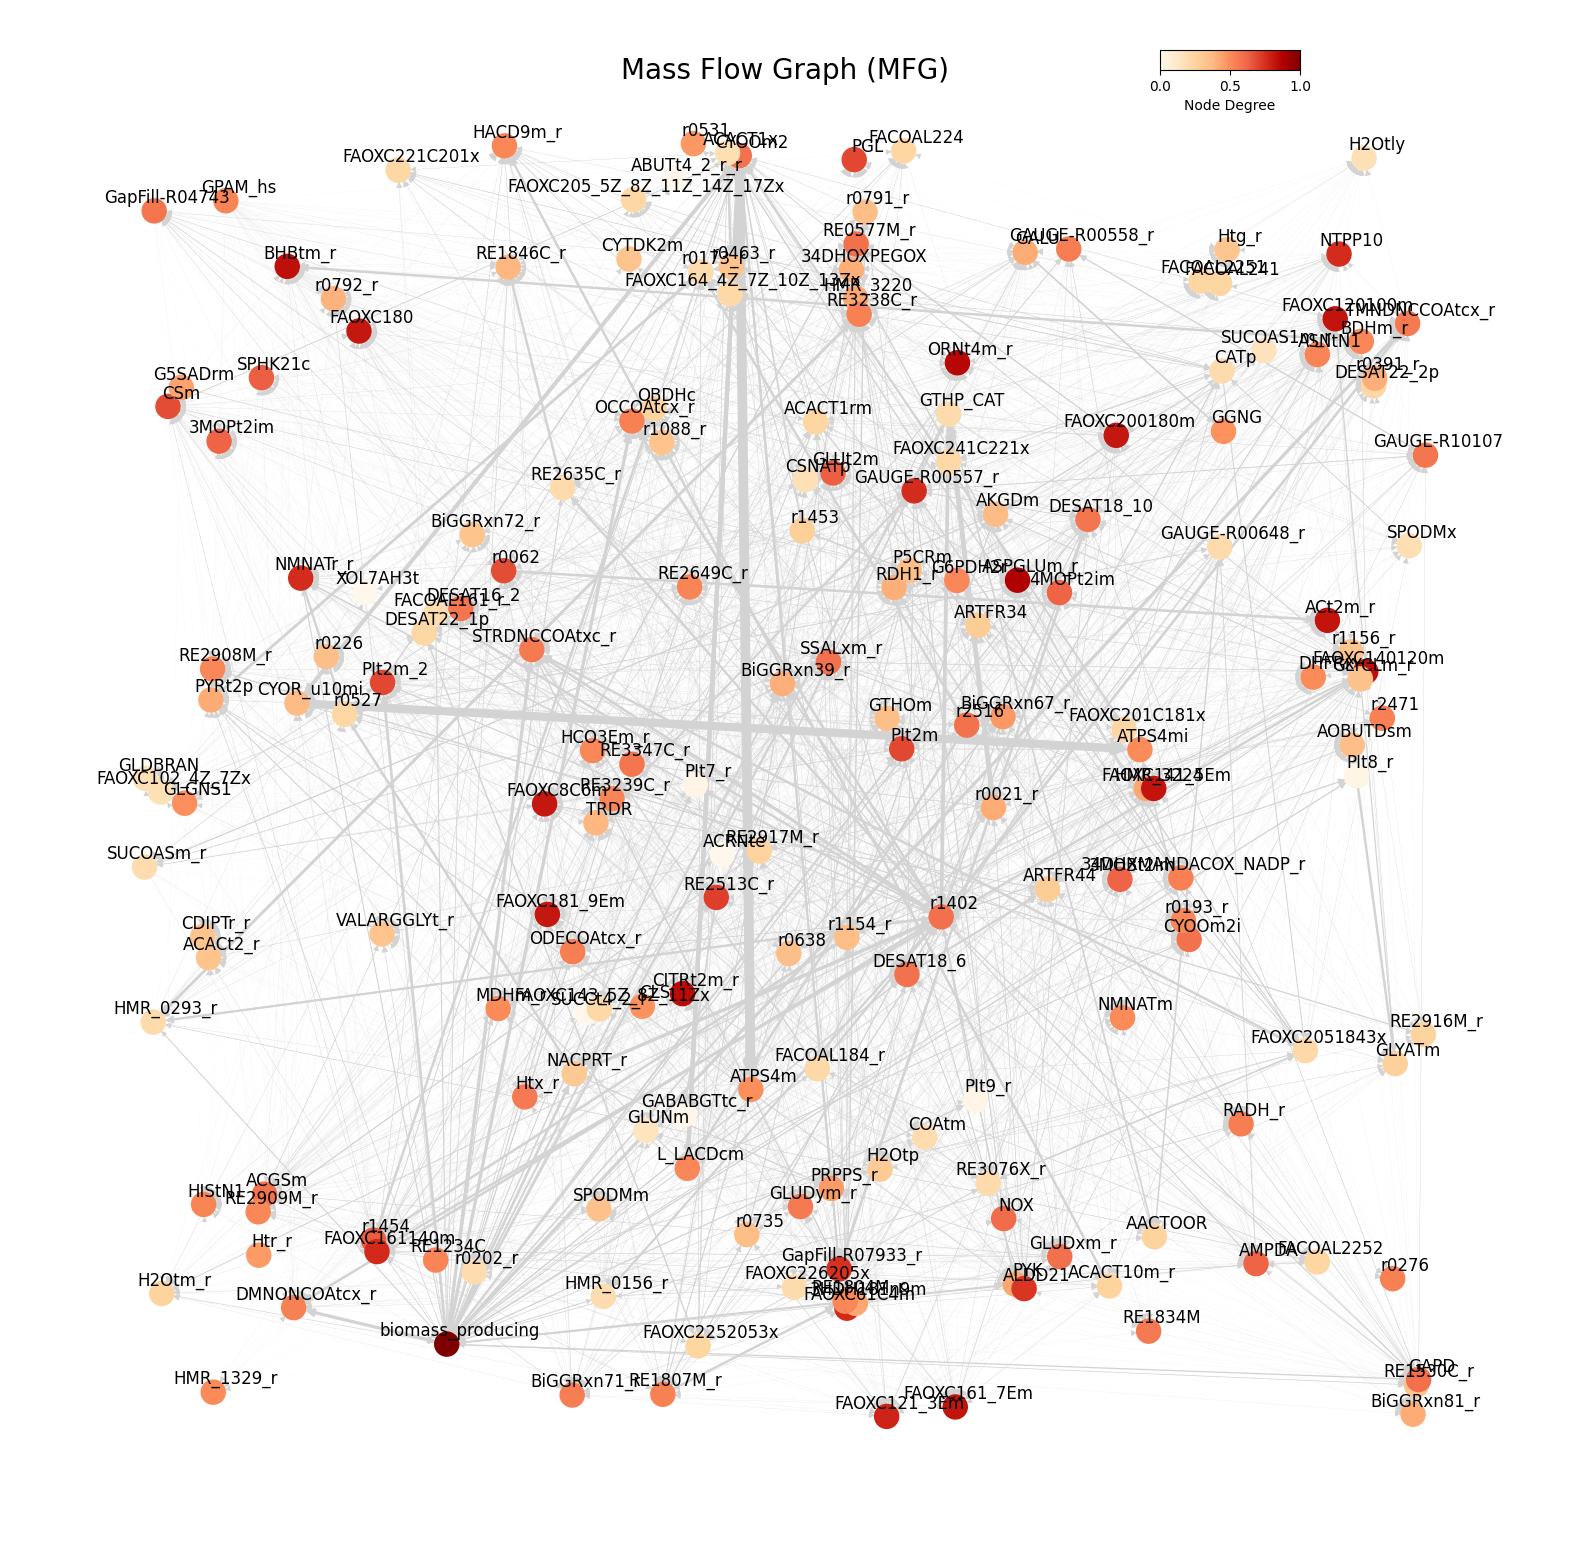

In [ ]:
# Convert D matrix into a graph
M_biomass = M_list[0]
M_biomass_producing = M_list[1]
G = nx.from_numpy_array(M_biomass_producing, create_using=nx.DiGraph)

# Create a subgraph containing only the nodes with a degree greater than min_degree
degrees = {node: val for (node, val) in G.degree()} # Calculate the degrees of each node
min_degree = 30 # Define the minimum degree for a node to be kept.
nodes_to_keep = [node for node, degree in degrees.items() if degree >= min_degree]
G_filtered = G.subgraph(nodes_to_keep)

# Normalize weights for the edges of the nodes
weights = [G_filtered[u][v]['weight'] for u,v in G_filtered.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (7 - 0.001) + 0.001 for w in weights]

# Create a dictionary mapping node indices to reaction names for labeling
reaction_names = np.concatenate(([reaction.id for reaction in model.reactions],
                         [reaction.id + '_r' for reaction in model.reactions]))
node_labels_filtered = {i: reaction_name for i, reaction_name in enumerate(reaction_names) if i in nodes_to_keep}

# Normalize the degrees for color mapping
degrees_filtered = [val for (node, val) in G_filtered.degree()]
normalized_degrees_filtered = [(d - min(degrees_filtered)) / (max(degrees_filtered) - min(degrees_filtered)) for d in degrees_filtered]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors_filtered = [cmap(deg) for deg in normalized_degrees_filtered]

# Plot the graph
fig, ax = plt.subplots(figsize=(20, 20))
pos_filtered = nx.random_layout(G_filtered)
nx.draw(G_filtered, pos_filtered, width=normalized_weights, node_color=node_colors_filtered, edge_color='lightgray', node_size=300, ax=ax)
plt.title('Mass Flow Graph (MFG)', fontsize=20, y=0.95)

# Labels
label_pos_filtered = {node: (x + 0.01, y + 0.01) for node, (x, y) in pos_filtered.items()}
nx.draw_networkx_labels(G_filtered, label_pos_filtered, labels=node_labels_filtered, font_size=12, ax=ax)

# Add a colorbar as the legend for node colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(normalized_degrees_filtered), vmax=max(normalized_degrees_filtered)))
sm.set_array([])
cbar_ax = fig.add_axes([0.7, 0.85, 0.07, 0.01])
cbar = plt.colorbar(sm, cax=cbar_ax, label='Node Degree', orientation='horizontal')


plt.savefig('mass_flow_graph.png')
plt.show()

### 3.6 Word Cloud Plot for Metabolites Frecuencies in Pagerank

In [57]:
#row_sums = PageRankRxns.sum(axis=1)
df = pd.DataFrame()
for i,n in enumerate(objectives):
    sorted_indices = np.argsort(PageRankRxns[:,i])
    rxns_list = []
    values_list = []
    for s in sorted_indices[::-1]:
        rxns_list.append(model.reactions[s].id)
        values_list.append(PageRankRxns[s,i])
    
    df[n] = pd.Series(rxns_list)
    df[f'values_{n}'] = pd.Series(values_list)

In [ ]:
mets_list = []
for rxn in df['biomass_producing'][df['values_biomass_producing'] > 4.04e-5]:
    r = model.reactions.get_by_id(rxn)
    mets = r.metabolites
    for met in mets:
        mets_list.append(met.id)

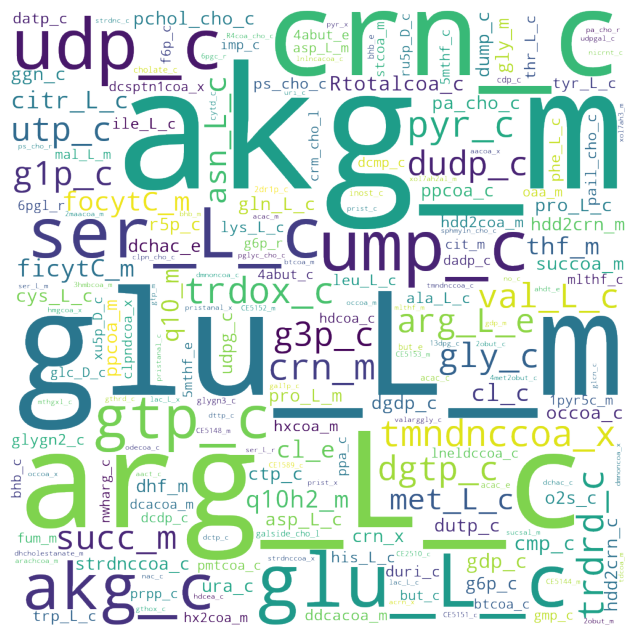

In [110]:
# Count the frequencies of each metabolite
mets_freq = Counter(mets_list)
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('h2o_')} #eliminate water
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('h2o2_')} #eliminate peroxide
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('co2_')} #eliminate carbon dioxide
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nh4_')} #eliminate amonium
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('h_')} #eliminate protons
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('atp_')} #eliminate atp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('adp_')} #eliminate adp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('amp_')} #eliminate amp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nad_')} #eliminate nad
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nadh_')} #eliminate nadh
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nadp_')} #eliminate nadp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nadph_')} #eliminate nadph
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('na1_')} #eliminate Sodium
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('coa_')} #eliminate CoA
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('accoa_')} #eliminate Acetyl-CoA
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('pi_')} #eliminate phosphate
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('ppi_')} #eliminate phosphate
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('fadh2_')} #eliminate FADH
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('fad_')} #eliminate FAD
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('o2_')} #eliminate Oxigen

# Create a circular mask
radius = 500  # you can change to the size you need
circle_img = np.zeros((2*radius, 2*radius), np.uint8)
rr, cc = draw.disk((radius, radius), radius)
circle_img[rr, cc] = 1

# Create the word cloud
wordcloud = WordCloud(width = 1000, height = 500, mask=circle_img, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate_from_frequencies(mets_freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig('wordcloud.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()

## 4. Identification of duplicates through Chemical Formulas <a id='formulas'></a>

In [114]:
# Chemical Formula
from cobra.io import read_sbml_model
model = read_sbml_model("iCHOv3_CHO_23052023.xml")

import pandas as pd
data = []

for m in model.metabolites:
    m.name = m.formula
for r in model.reactions:
    if r not in model.exchanges:
        print(r)
        reaction_id = r.id
        reaction_name = r.name
        reaction_formula = r.build_reaction_string(use_metabolite_names=True)
        data.append([reaction_id, reaction_name, reaction_formula])
df = pd.DataFrame(data, columns=['ID', 'Name', 'Reaction'])
df

No objective coefficients in model. Unclear what should be optimized


10FTHF5GLUtl: 10fthf5glu_c --> 10fthf5glu_l
10FTHF5GLUtm: 10fthf5glu_m --> 10fthf5glu_c
10FTHF6GLUtl: 10fthf6glu_c --> 10fthf6glu_l
10FTHF6GLUtm: 10fthf6glu_m --> 10fthf6glu_c
10FTHF7GLUtl: 10fthf7glu_c --> 10fthf7glu_l
10FTHF7GLUtm: 10fthf7glu_m --> 10fthf7glu_c
10FTHFtl: 10fthf_c <=> 10fthf_l
10FTHFtm: 10fthf_c <=> 10fthf_m
11DOCRTSLte: 11docrtsl_c + atp_c + h2o_c --> 11docrtsl_e + adp_c + h_c + pi_c
11DOCRTSLtm: 11docrtsl_c <=> 11docrtsl_m
11DOCRTSLtr: 11docrtsl_c <=> 11docrtsl_r
11DOCRTSTRNte: 11docrtstrn_c + atp_c + h2o_c --> 11docrtstrn_e + adp_c + h_c + pi_c
11DOCRTSTRNtm: 11docrtstrn_c <=> 11docrtstrn_m
11DOCRTSTRNtr: 11docrtstrn_c <=> 11docrtstrn_r
12DHCHOLabc: 12dhchol_c + atp_c + h2o_c --> 12dhchol_e + adp_c + h_c + pi_c
12DHCHOLt: 12dhchol_e + hco3_c <=> 12dhchol_c + hco3_e
12DHCHOLt2: 12dhchol_e + 2.0 na1_e --> 12dhchol_c + 2.0 na1_c
12HPETATP: 12HPET_c + atp_c + h2o_c --> 12HPET_e + adp_c + h_c + pi_c
12HPETUPKt: 12HPET_e --> 12HPET_c
13DAMPPOX: 13dampp_c + h2o_c + o2_c -

3HAD181n9m: CE5162_m + h2o_m <=> 3hoc181_9Zcoa_m
3HAD181n9p: CE5162_x + h2o_x <=> 3hoc181_9Zcoa_x
3HAD182n6Em: c183_2Z_9E_12Ecoa_m + h2o_m --> 3hoc182_9E_12Ecoa_m
3HAD182n6m: c183_2Z_9Z_12Zcoa_m + h2o_m <=> CE2421_m
3HAD182n6p: c183_2Z_9Z_12Zcoa_x + h2o_x <=> CE2421_x
3HAD183n3m: c184_2Z_9Z_12Z_15Zcoa_m + h2o_m <=> 3hoc183_9Z_12Z_15Zcoa_m
3HAD183n3p: c184_2Z_9Z_12Z_15Zcoa_x + h2o_x <=> 3hoc183_9Z_12Z_15Zcoa_x
3HAD183n6m: c184_2Z_6Z_9Z_12Zcoa_m + h2o_m <=> CE2438_m
3HAD183n6p: c184_2Z_6Z_9Z_12Zcoa_x + h2o_x <=> CE2438_x
3HAD184n3m: c185_2Z_6Z_9Z_12Z_15Zcoa_m + h2o_m <=> 3hoc184_6Z_9Z_12Z_15Zcoa_m
3HAD184n3p: c185_2Z_6Z_9Z_12Z_15Zcoa_x + h2o_x <=> 3hoc184_6Z_9Z_12Z_15Zcoa_x
3HAD200m: eicos2coa_m + h2o_m <=> CE2247_m
3HAD200p: eicos2coa_x + h2o_x <=> CE2247_x
3HAD203n6m: CE5114_m + h2o_m <=> 3hodlnlcgcoa_m
3HAD203n6p: CE5114_x + h2o_x <=> 3hodlnlcgcoa_x
3HAD204n3m: CE4812_m + h2o_m <=> CE4810_m
3HAD204n3p: CE4812_x + h2o_x <=> CE4810_x
3HAD204n6m: c205_2Z_5Z_8Z_11Z_14Zcoa_m + h2o_m <=> 3h

3HDHTMHDp: 3hotmthdcoa_x + nad_x --> 3ktmthdcoa_x + h_x + nadh_x
3HDHTMTDp: 3hotmtdcoa_x + nad_x --> 3ktmtdcoa_x + h_x + nadh_x
3HKYNAKGAT: akg_c + hLkynr_c --> 42A3HP24DB_c + glu_L_c
3HKYNAKGATm: akg_m + hLkynr_m --> 42A3HP24DB_m + glu_L_m
3HLYTCL: 34dhphe_c + h_c --> co2_c + dopa_c
3HPRODHx: 3hpro_LT_x --> 1p2cbxl_x + h2o_x + h_x
3HXKYNDCL: hLkynr_c + h_c --> 3hxkynam_c + co2_c
3HXKYNOXDA: 3hxkynam_c + o2_c --> 48dhoxquin_c + h2o2_c + nh4_c
3M4HDXPAC: 3mox4hpac_c + h2o_c + nad_c <=> 2.0 h_c + homoval_c + nadh_c
3MLDAt: 3mlda_c <=> 3mlda_e
3MOBt2im: 3mob_c + h_c <=> 3mob_m + h_m
3MOBte: 3mob_e <=> 3mob_c
3MOPt2im: 3mop_c + h_c <=> 3mop_m + h_m
3MOPte: 3mop_e <=> 3mop_c
3MOX4HOXMte: 3mox4hoxm_c <=> 3mox4hoxm_e
3MOX4HOXPGALDOX: 3m4hpga_c + h2o_c + nad_c --> 3mox4hoxm_c + 2.0 h_c + nadh_c
3MOX4HOXPGALDOX_NADP: 3m4hpga_c + h2o_c + nadp_c <=> 3mox4hoxm_c + 2.0 h_c + nadph_c
3MOXTYROX: 3moxtyr_c + h2o_c + o2_c --> 3mox4hpac_c + h2o2_c + nh4_c
3NTD7l: 3amp_l + h2o_l --> adn_l + pi_l
3OAR100:

ABO6g: fucgalacglcgal14acglcgalgluside_cho_g + udpacgal_g --> acgalfucgalacglcgal14acglcgalgluside_cho_g + h_g + udp_g
ABO7g: fucgalacgalfucgalacglcgal14acglcgalgluside_cho_g + udpacgal_g --> acgalfucgalacgalfucgalacglcgal14acglcgalgluside_cho_g + h_g + udp_g
ABO8g: fucgalacglcgal14acglcgalgluside_cho_g + udpgal_g --> galfucgalacglcgal14acglcgalgluside_cho_g + h_g + udp_g
ABO9g: fucfucgalacglcgalacglcgal14acglcgalgluside_cho_g + 2.0 udpgal_g --> galgalfucfucgalacglcgalacglcgal14acglcgalgluside_cho_g + 2.0 h_g + 2.0 udp_g
ABTArm: 4abut_m + akg_m <=> glu_L_m + sucsal_m
ABTD: abt_c + nad_c <=> h_c + nadh_c + xylu_L_c
ABTti: abt_c --> abt_e
ABUTD: 4abutn_c + h2o_c + nad_c --> 4abut_c + 2.0 h_c + nadh_c
ABUTDm: 4abutn_m + h2o_m + nad_m --> 4abut_m + 2.0 h_m + nadh_m
ABUTt2r: 4abut_e + h_e <=> 4abut_c + h_c
ABUTt2rL: 4abut_l + h_l <=> 4abut_c + h_c
ABUTt4_2_r: 4abut_e + 2.0 na1_e <=> 4abut_c + 2.0 na1_c
ACACT100m: 3odcoa_m + coa_m --> accoa_m + occoa_m
ACACT102n3m: 3oc101_7Zcoa_m + coa_m -->

ACITL: atp_c + cit_c + coa_c --> accoa_c + adp_c + oaa_c + pi_c
ACMAT1: acACP_c + h_c + malACP_c --> ACP_c + actACP_c + co2_c
ACMAT1m: acACP_m + h_m + malACP_m --> ACP_m + actACP_m + co2_m
ACN13ACNGALGBSIDEte: acn13acngalgbside_cho_c <=> acn13acngalgbside_cho_e
ACN13ACNGALGBSIDEtg: acn13acngalgbside_cho_c <=> acn13acngalgbside_cho_g
ACN23ACNGALGBSIDEte: acn23acngalgbside_cho_c <=> acn23acngalgbside_cho_e
ACN23ACNGALGBSIDEtg: acn23acngalgbside_cho_c <=> acn23acngalgbside_cho_g
ACNACNGAL14ACGLCGALGLUSIDEte: acnacngal14acglcgalgluside_cho_e <=> acnacngal14acglcgalgluside_cho_c
ACNACNGAL14ACGLCGALGLUSIDEtg: acnacngal14acglcgalgluside_cho_g <=> acnacngal14acglcgalgluside_cho_c
ACNACNGALGBSIDEte: acnacngalgbside_cho_c <=> acnacngalgbside_cho_e
ACNACNGALGBSIDEtg: acnacngalgbside_cho_c <=> acnacngalgbside_cho_g
ACNAM9PL: acmanap_c + h2o_c + pep_c --> acnamp_c + pi_c
ACNAM9PL2: h2o_c + man6p_c + pep_c --> kdnp_c + pi_c
ACNAMPH: acnamp_c + h2o_c --> acnam_c + pi_c
ACNAMlt: acnam_c + h_c <=> acna

ACOATE2031p: dlnlcgcoa_x + h2o_x --> coa_x + dlnlcg_x + h_x
ACOATE204p: arachdcoa_x + h2o_x --> arachd_x + coa_x + h_x
ACOATE223: docastricoa_c + h2o_c --> coa_c + docastri_c + h_c
ACOATE226: crvncoa_c + h2o_c --> coa_c + crvnc_c + h_c
ACOATE226m: crvncoa_m + h2o_m --> coa_m + crvnc_m + h_m
ACOATE241p: h2o_x + nrvnccoa_x --> coa_x + h_x + nrvnc_x
ACOATE80: h2o_c + occoa_c --> coa_c + h_c + octa_c
ACOATE80m: h2o_m + occoa_m --> coa_m + h_m + octa_m
ACOD: co2_m + itacon_m <=> acon_C_m + h_m
ACODA: acorn_c + h2o_c --> ac_c + orn_c
ACONT: cit_c <=> icit_c
ACONTa: cit_c <=> acon_C_c + h2o_c
ACONTam: cit_m <=> acon_C_m + h2o_m
ACONTb: icit_c <=> acon_C_c + h2o_c
ACONTbm: icit_m <=> acon_C_m + h2o_m
ACONTm: cit_m <=> icit_m
ACORNt: acorn_c <=> acorn_e
ACOX22x: dhcholoylcoa_x + fadh2_x + 0.5 o2_x --> fad_x + thcholoylcoa_x
ACOX2x: cholcoas_x + fadh2_x + o2_x --> cholcoads_x + fad_x + 2.0 h2o_x
ACP1_FMN: fmn_c + h2o_c --> pi_c + ribflv_c
ACRNte: acrn_c + na1_c <=> acrn_e + na1_e
ACRNtm: acrn_c 

ALASm: gly_m + h_m + succoa_m --> 5aop_m + co2_m + coa_m
ALATA_L: akg_c + ala_L_c <=> glu_L_c + pyr_c
ALATHRNaEx: ala_L_e + na1_e + thr_L_c --> ala_L_c + na1_c + thr_L_e
ALATRAH: alatrna_c + h2o_c --> ala_L_c + h_c + trnaala_c
ALATRAHm: alatrna_m + h2o_m --> ala_L_m + h_m + trnaala_m
ALATRS: ala_L_c + atp_c + trnaala_c --> alatrna_c + amp_c + ppi_c
ALATRSm: ala_L_m + atp_m + trnaala_m --> alatrna_m + amp_m + ppi_m
ALA_DTDe: ala_D_c --> ala_D_e
ALAt2r: ala_L_e + h_e <=> ala_L_c + h_c
ALAt2rL: ala_L_l + h_l <=> ala_L_c + h_c
ALAt4: ala_L_e + na1_e --> ala_L_c + na1_c
ALAtN1: ala_L_e + h_c + 2.0 na1_e <=> ala_L_c + h_e + 2.0 na1_c
ALAyLATthc: ala_L_e + arg_L_c + h_e --> ala_L_c + arg_L_e + h_c
ALCD1: meoh_c + nad_c <=> fald_c + h_c + nadh_c
ALCD21_D: 12ppd_R_c + nad_c --> h_c + lald_D_c + nadh_c
ALCD21_L: 12ppd_S_c + nad_c --> h_c + lald_L_c + nadh_c
ALCD22_D: lald_D_c + nad_c --> h_c + mthgxl_c + nadh_c
ALCD22_L: lald_L_c + nad_c --> h_c + mthgxl_c + nadh_c
ALCD2if: etoh_c + nad_c --> ac

ARTFR209: adrncoa_c + 0.375 coa_m + 2.0 fadh2_m + 2.0 h_m + 2.0 nadph_m --> 1.375 R2coa_cho_c + 2.0 fad_m + 2.0 nadp_m
ARTFR210: 0.125 coa_m + fadh2_m + h_m + lnlccoa_c + nadph_m --> 1.125 R2coa_cho_c + fad_m + nadp_m
ARTFR211: clpndcoa_c + 0.375 coa_m + 3.0 fadh2_m + 2.0 h_m + 2.0 nadph_m --> 1.375 R2coa_cho_c + 3.0 fad_m + 2.0 nadp_m
ARTFR212: 0.375 coa_m + dcsptn1coa_c + 3.0 fadh2_m + 2.0 h_m + 2.0 nadph_m --> 1.375 R2coa_cho_c + 3.0 fad_m + 2.0 nadp_m
ARTFR213: c226coa_c + 0.375 coa_m + 3.0 fadh2_m + 3.0 h_m + 3.0 nadph_m --> 1.375 R2coa_cho_c + 3.0 fad_m + 3.0 nadp_m
ARTFR31: 0.125 coa_m + stcoa_c --> 1.125 R3coa_cho_c
ARTFR32: 0.125 coa_m + fadh2_m + odecoa_c --> 1.125 R3coa_cho_c + fad_m
ARTFR33: 0.125 coa_m + fadh2_m + vacccoa_c --> 1.125 R3coa_cho_c + fad_m
ARTFR34: 0.125 coa_m + 2.0 fadh2_m + lneldccoa_c --> 1.125 R3coa_cho_c + 2.0 fad_m
ARTFR41: fadh2_m + hdcoa_c --> R4coa_cho_c + fad_m
ARTFR42: 0.125 coa_m + fadh2_m + odecoa_c --> 1.125 R4coa_cho_c + fad_m
ARTFR43: 0.125 co

B3GNT37g: gm2a_cho_g + udpgal_g --> gm1a_cho_g + h_g + udp_g
B3GNT38g: galside_cho_g + udpgal_g --> digalside_cho_g + h_g + udp_g
B3GNT39g: gluside_cho_g + udpgal_g --> galgluside_cho_g + h_g + udp_g
B3GNT51g: galgluside_cho_g + uacgam_g --> acglcgalgluside_cho_g + h_g + udp_g
BAAT1x: cholcoa_x + gly_x --> coa_x + gchola_x
BAAT2x: cholcoa_x + taur_x --> coa_x + tchola_x
BAAT3x: dgcholcoa_x + gly_x --> coa_x + dgchol_x
BAAT4x: dcholcoa_x + gly_x --> coa_x + dgchol_x
BAAT5x: dcholcoa_x + taur_x <=> coa_x + tdchola_x
BACCL: atp_c + btn_c + h_c --> btamp_c + ppi_c
BACCLm: atp_m + btn_m + h_m --> btamp_m + ppi_m
BALABETAtc: ala_B_e + cl_e + 2.0 na1_e --> ala_B_c + cl_c + 2.0 na1_c
BALAPAT1tc: ala_B_e + h_e --> ala_B_c + h_c
BALAVECSEC: 3.0 ala_B_c + atp_c + h2o_c --> adp_c + 3.0 ala_B_e + h_c + pi_c
BALAtmr: ala_B_c <=> ala_B_m
BAMPPALDOX: bamppald_c + h2o_c + nad_c --> ala_B_c + 2.0 h_c + nadh_c
BAMPPALDOXm: bamppald_m + h2o_m + nad_m --> ala_B_m + 2.0 h_m + nadh_m
BBHOX: 4tmeabutn_c + akg

C226CRNt: c226crn_c --> c226crn_m
C2M26DCOAHLm: c2m26dcoa_m + h2o_m <=> 3h26dm5coa_m
C2M26DCOAHLx: c2m26dcoa_x + h2o_x <=> 3h26dm5coa_x
C2tcx: acrn_x <=> acrn_c
C30CPT1: crn_c + ppcoa_c <=> coa_c + pcrn_c
C3STDH1Pr: 4mzym_int1_r + nadp_r <=> 4mzym_int2_r + co2_r + h_r + nadph_r
C3STDH1r: 4mzym_int1_r + nad_r --> 4mzym_int2_r + co2_r + h_r + nadh_r
C3STKR2r: h_r + nadph_r + zym_int2_r --> nadp_r + zymst_r
C40CPT1: btcoa_c + crn_c <=> c4crn_c + coa_c
C4CRNCPT2: c4crn_m + coa_m --> btcoa_m + crn_m
C4CRNe: c4crn_c --> c4crn_e
C4DCCACT: c4dc_x <=> c4dc_c
C4DCe: c4dc_c --> c4dc_e
C4OHc: 3hbcoa_R_c + crn_c <=> 3bcrn_c + coa_c
C4STMO1r: 44mzym_r + 3.0 h_r + 3.0 nadph_r + 3.0 o2_r --> 4mzym_int1_r + 4.0 h2o_r + 3.0 nadp_r
C4STMO2Pr: 4mzym_int2_r + nadp_r + o2_r --> co2_r + h_r + nadph_r + zym_int2_r
C4STMO2r: 4mzym_int2_r + nad_r + o2_r --> co2_r + h_r + nadh_r + zym_int2_r
C4tcx: c4crn_x <=> c4crn_c
C4tmc: c4crn_c --> c4crn_m
C4x: btcoa_x + crn_x <=> c4crn_x + coa_x
C50CPT1: crn_c + ivcoa_c <=

CITt4_3: cit_e + 3.0 na1_e <=> cit_c + 3.0 na1_c
CITt4_4: cit_e + 4.0 na1_e <=> cit_c + 4.0 na1_c
CITtam: cit_c + mal_L_m <=> cit_m + mal_L_c
CITtbm: cit_c + pep_m <=> cit_m + pep_c
CK: atp_m + creat_m <=> adp_m + h_m + pcreat_m
CKc: atp_c + creat_c <=> adp_c + h_c + pcreat_c
CLCFTRte: cl_c <=> cl_e
CLFORtex: cl_e + 2.0 for_c --> cl_c + 2.0 for_e
CLFORtex2: 2.0 cl_e + for_c --> 2.0 cl_c + for_e
CLHCO3tex2: 2.0 cl_e + hco3_c --> 2.0 cl_c + hco3_e
CLHCOtex: cl_e + 2.0 hco3_c --> cl_c + 2.0 hco3_e
CLI2tex: cl_e + 2.0 i_c --> cl_c + 2.0 i_e
CLOHtex2: 2.0 cl_e + oh1_c --> 2.0 cl_c + oh1_e
CLOXAtex2: 2.0 cl_e + oxa_c --> 2.0 cl_c + oxa_e
CLPNDCOAtbc: atp_c + clpndcoa_c + h2o_c --> adp_c + clpndcoa_x + h_c + pi_c
CLPNDCOAtx: clpndcoa_c <=> clpndcoa_x
CLPNDCPT1: clpndcoa_c + crn_c <=> clpndcrn_c + coa_c
CLPNDCPT2: clpndcrn_m + coa_m --> clpndcoa_m + crn_m
CLPNDCRNt: clpndcrn_c --> clpndcrn_m
CLPNDt: clpnd_e <=> clpnd_c
CLPNH: clpn_cho_c + h2o_c --> h_c + pa_cho_c + pglyc_cho_c
CLS: cdpdag_cho_

CYTDtn: cytd_c <=> cytd_n
CYTK1: atp_c + cmp_c <=> adp_c + cdp_c
CYTK10: cmp_c + dgtp_c <=> cdp_c + dgdp_c
CYTK10n: cmp_n + dgtp_n <=> cdp_n + dgdp_n
CYTK11: dcmp_c + dgtp_c <=> dcdp_c + dgdp_c
CYTK11n: dcmp_n + dgtp_n <=> dcdp_n + dgdp_n
CYTK12: dcmp_c + dctp_c <=> 2.0 dcdp_c
CYTK12n: dcmp_n + dctp_n <=> 2.0 dcdp_n
CYTK13: datp_c + dcmp_c <=> dadp_c + dcdp_c
CYTK13n: datp_n + dcmp_n <=> dadp_n + dcdp_n
CYTK14: dcmp_c + utp_c <=> dcdp_c + udp_c
CYTK14n: dcmp_n + utp_n <=> dcdp_n + udp_n
CYTK1m: atp_m + cmp_m <=> adp_m + cdp_m
CYTK1n: atp_n + cmp_n <=> adp_n + cdp_n
CYTK2: atp_c + dcmp_c <=> adp_c + dcdp_c
CYTK2m: atp_m + dcmp_m <=> adp_m + dcdp_m
CYTK2n: atp_n + dcmp_n <=> adp_n + dcdp_n
CYTK3: cmp_c + gtp_c <=> cdp_c + gdp_c
CYTK3n: cmp_n + gtp_n <=> cdp_n + gdp_n
CYTK4: dcmp_c + gtp_c <=> dcdp_c + gdp_c
CYTK4n: dcmp_n + gtp_n <=> dcdp_n + gdp_n
CYTK5: ctp_c + dcmp_c <=> cdp_c + dcdp_c
CYTK5n: ctp_n + dcmp_n <=> cdp_n + dcdp_n
CYTK6: cmp_c + ctp_c <=> 2.0 cdp_c
CYTK6n: cmp_n + ctp_n <

DESAT18_9: h_c + lnlccoa_c + nadh_c + o2_c --> 2.0 h2o_c + lnlncgcoa_c + nad_c
DESAT20_1: dlnlcgcoa_c + h_c + nadh_c + o2_c --> arachdcoa_c + 2.0 h2o_c + nad_c
DESAT20_2: eicostetcoa_c + h_c + nadh_c + o2_c --> 2.0 h2o_c + nad_c + tmndnccoa_c
DESAT20_4: dlnlcgcoa_r + 2.0 focytb5_r + 2.0 h_r + o2_r --> arachdcoa_r + 2.0 ficytb5_r + 2.0 h2o_r
DESAT20_5: eicostetcoa_r + 2.0 focytb5_r + 2.0 h_r + o2_r --> 2.0 ficytb5_r + 2.0 h2o_r + tmndnccoa_r
DESAT22_1p: adrncoa_x + h_x + nadh_x + o2_x --> dcsptn1coa_x + 2.0 h2o_x + nad_x
DESAT22_2p: clpndcoa_x + h_x + nadh_x + o2_x --> c226coa_x + 2.0 h2o_x + nad_x
DESAT24_1: h_c + nadh_c + o2_c + tetpent3coa_c --> 2.0 h2o_c + nad_c + tethex3coa_c
DESAT24_51: 2.0 focytb5_r + 2.0 h_r + o2_r + tettet6coa_r --> 2.0 ficytb5_r + 2.0 h2o_r + tetpent6coa_r
DESAT24_6: 2.0 focytb5_r + 2.0 h_r + o2_r + tetpent3coa_r --> 2.0 ficytb5_r + 2.0 h2o_r + tethex3coa_r
DGAT: Rtotal3coa_c + dag_cho_c --> coa_c + tag_cho_c
DGCHOLt2e: dgchol_e + lpdmd_e <=> dgchol_c + lpdmd_

DNDPt7m: dadp_m + datp_c --> dadp_c + datp_m
DNDPt8m: dadp_c + dudp_m <=> dadp_m + dudp_c
DNDPt9m: dadp_c + dtdp_m <=> dadp_m + dtdp_c
DNMPPA: dhpmp_c + h2o_c <=> HC01361_c + pi_c
DNPH1: dgmp_c + h2o_c --> dr5p_c + gua_c
DNPH2: damp_c + h2o_c --> ade_c + dr5p_c
DNPH3: dcmp_c + h2o_c --> csn_c + dr5p_c
DNPH4: dtmp_c + h2o_c --> dr5p_c + thym_c
DNTP: apppa_c + h2o_c --> adp_c + amp_c + 2.0 h_c
DOCASTRICOAtr: docastricoa_r <=> docastricoa_c
DOCO13ACtr: doco13ac_e <=> doco13ac_c
DOCO13ECOAtxc: atp_c + doco13ecoa_c + h2o_c --> adp_c + doco13ecoa_x + h_c + pi_c
DOCO13EFATP: atp_c + coa_c + doco13ac_e --> amp_c + doco13ecoa_c + ppi_c
DOCOHEXETHc: h2o_e + pe226_hs_e --> docohxethe + pa_cho_e
DOCOSACT: atp_c + coa_c + docosac_c --> amp_c + docoscoa_c + ppi_c
DOCOSACTDe: docosac_e <=> docosac_c
DOCOSCOAtxc: atp_c + docoscoa_c + h2o_c --> adp_c + docoscoa_x + h_c + pi_c
DOCOSECOAtr: CE5155_c <=> CE5155_r
DOCTETETH: h2o_e + pe224_hs_e --> doctetethe + pa_cho_e
DOGULND1: 23doguln_c + h2o_c --> co2_

ESTRIOLtr: estriol_r <=> estriol_c
ESTRONEGLCt: atp_c + estroneglc_c + h2o_c --> adp_c + estroneglc_e + h_c + pi_c
ESTRONEGLCtr: estroneglc_c <=> estroneglc_r
ESTRONESt: estrones_e + hco3_c <=> estrones_c + hco3_e
ESTRONESt2: estrones_e + 2.0 na1_e --> estrones_c + 2.0 na1_c
ESTRONEtr: estrone_r <=> estrone_c
ESTROSABCCte: atp_c + estrones_c + h2o_c --> adp_c + estrones_e + h_c + pi_c
ESTRSABCtc: atp_c + estrones_e + h2o_c --> adp_c + estrones_c + h_c + pi_c
ESTSULT: estrone_c + paps_c --> estrones_c + h_c + pap_c
ETF: etfox_m + fadh2_m --> etfrd_m + fad_m
ETFQO: etfrd_m + q10_m --> etfox_m + q10h2_m
ETHAK: atp_c + etha_c --> adp_c + ethamp_c + h_c
ETHP: ethamp_c + h2o_c --> etha_c + pi_c
ETOHMO: etoh_c + h_c + nadph_c + o2_c --> acald_c + 2.0 h2o_c + nadp_c
ETOHt: etoh_e <=> etoh_c
ETOHtx: etoh_c <=> etoh_x
F1Atg: f1a_g <=> f1a_l
F1PGT: fuc1p_L_c + gtp_c + h_c <=> gdpfuc_c + ppi_c
F6T2g: gdpfuc_g + nm4masn_g --> fnm4masn_g + gdp_g + h_g
F6T3g: gdpfuc_g + nm2masn_g --> fnm2masn_g + gdp

FAEL204: arachdcoa_c + 3.0 h_c + malcoa_c + 2.0 nadph_c --> adrncoa_c + co2_c + coa_c + h2o_c + 2.0 nadp_c
FAEL205: 3.0 h_c + malcoa_c + 2.0 nadph_c + tmndnccoa_c --> clpndcoa_c + co2_c + coa_c + h2o_c + 2.0 nadp_c
FAH1: ddca_c + h_c + nadph_c + o2_c --> h2o_c + nadp_c + whddca_c
FAH2: h_c + nadph_c + o2_c + ttdca_c --> h2o_c + nadp_c + whttdca_c
FAH3: h_c + hdca_c + nadph_c + o2_c --> h2o_c + nadp_c + whhdca_c
FALDH: fald_c + gthrd_c + nad_c <=> Sfglutth_c + h_c + nadh_c
FALDtly: fald_l <=> fald_c
FALDtm: fald_m <=> fald_c
FAOXC10080m: coa_m + dcacoa_m + fad_m + h2o_m + nad_m --> accoa_m + fadh2_m + h_m + nadh_m + occoa_m
FAOXC10080x: coa_x + dcacoa_x + h2o_x + nad_x + o2_x --> accoa_x + h2o2_x + h_x + nadh_x + occoa_x
FAOXC101C102m: dece4coa_m + fad_m --> dec24dicoa_m + fadh2_m
FAOXC101C102x: dece4coa_x + o2_x --> dec24dicoa_x + h2o2_x
FAOXC101C8m: coa_m + dc2coa_m + h2o_m + nad_m --> accoa_m + h_m + nadh_m + occoa_m
FAOXC101C8x: coa_x + dc2coa_x + h2o_x + nad_x --> accoa_x + h_x + n

FAOXC16080m: 4.0 coa_m + 4.0 fad_m + 4.0 h2o_m + 4.0 nad_m + pmtcoa_m --> 4.0 accoa_m + 4.0 fadh2_m + 4.0 h_m + 4.0 nadh_m + occoa_m
FAOXC16080x: 4.0 coa_x + 4.0 h2o_x + 4.0 nad_x + 4.0 o2_x + pmtcoa_x --> 4.0 accoa_x + 4.0 h2o2_x + 4.0 h_x + 4.0 nadh_x + occoa_x
FAOXC1611402m: coa_m + h2o_m + hdcoa_m + nad_m --> accoa_m + h_m + nadh_m + tdcoa_m
FAOXC161140m: coa_m + h2o_m + hdd2coa_m + nad_m --> accoa_m + h_m + nadh_m + tdcoa_m
FAOXC161802m: 4.0 coa_m + 3.0 fad_m + 4.0 h2o_m + hdd2coa_m + 4.0 nad_m --> 4.0 accoa_m + 3.0 fadh2_m + 4.0 h_m + 4.0 nadh_m + occoa_m
FAOXC16180m: 4.0 coa_m + 3.0 fad_m + 4.0 h2o_m + hdcoa_m + 4.0 nad_m --> 4.0 accoa_m + 3.0 fadh2_m + 4.0 h_m + 4.0 nadh_m + occoa_m
FAOXC161C141m: coa_m + fad_m + h2o_m + hdcoa_m + nad_m --> accoa_m + fadh2_m + h_m + nadh_m + tetd7ecoa_m
FAOXC161C141x: M01191_x + coa_x + h2o_x + nad_x + o2_x --> M01141_x + accoa_x + h2o2_x + h_x + nadh_x
FAOXC161C161OHm: fad_m + h2o_m + hdcoa_m --> 3hdeccoa_m + fadh2_m
FAOXC161_7Em: c161_7Ecoa_m

FAOXC185_3Z_6Z_9Z_12Z_15Zm: c185_3Z_6Z_9Z_12Z_15Zcoa_m + coa_m + h2o_m + nad_m --> accoa_m + c164_4Z_7Z_10Z_13Zcoa_m + h_m + nadh_m
FAOXC185_3Z_6Z_9Z_12Z_15Zx: c185_3Z_6Z_9Z_12Z_15Zcoa_x + coa_x + h2o_x + nad_x --> accoa_x + c164_4Z_7Z_10Z_13Zcoa_x + h_x + nadh_x
FAOXC185m: 3octpencoa_m --> 2octpencoa_m
FAOXC18C18OHm: fad_m + h2o_m + stcoa_m --> 3hodcoa_m + fadh2_m
FAOXC200180m: arachcoa_m + coa_m + fad_m + h2o_m + nad_m --> accoa_m + fadh2_m + h_m + nadh_m + stcoa_m
FAOXC200180x: arachcoa_x + coa_x + h2o_x + nad_x + o2_x --> accoa_x + h2o2_x + h_x + nadh_x + stcoa_x
FAOXC201181x: c201coa_x + coa_x + h2o_x + nad_x + o2_x --> accoa_x + h2o2_x + h_x + nadh_x + odecoa_x
FAOXC201C181x: coa_x + ei11ecoa_x + h2o_x + nad_x + o2_x --> accoa_x + h2o2_x + h_x + nadh_x + ocde9ecoa_x
FAOXC2031836m: coa_m + dlnlcgcoa_m + fad_m + h2o_m + nad_m --> accoa_m + fadh2_m + h_m + lnlncgcoa_m + nadh_m
FAOXC204: arachdcoa_m + 9.0 coa_m + 5.0 fad_m + 9.0 h2o_m + 9.0 nad_m --> 10.0 accoa_m + 5.0 fadh2_m + 9.0 

FAOXC9070m: c90coa_m + coa_m + fad_m + h2o_m + nad_m --> accoa_m + c70coa_m + fadh2_m + h_m + nadh_m
FAOXC9C7m: coa_m + fad_m + h2o_m + nad_m + noncoa_m --> accoa_m + fadh2_m + h_m + hepcoa_m + nadh_m
FAOXCPRIST1x: coa_x + h2o_x + nad_x + o2_x + pristcoa_x --> c13_trimethylcoa_x + h2o2_x + h_x + nadh_x + ppcoa_x
FAOXCPRIST2x: c13_trimethylcoa_x + coa_x + h2o_x + nad_x + o2_x --> accoa_x + c11_trimethylcoa_x + h2o2_x + h_x + nadh_x
FAOXCPRIST3x: c11_trimethylcoa_x + coa_x + h2o_x + nad_x + o2_x --> dmnoncoa_x + h2o2_x + h_x + nadh_x + ppcoa_x
FAOXMC10OHMC10r: dca_r + h_r + nadph_r + o2_r --> h2o_r + nadp_r + omhdecacid_r
FAOXOHC16C16DCc: h2o_c + 2.0 nad_c + whhdca_c --> 2.0 h_c + hexdiac_c + 2.0 nadh_c
FAOXOHC22C22DCc: h2o_c + 2.0 nad_c + omhdocosac_c --> docosdiac_c + 2.0 h_c + 2.0 nadh_c
FAOXOHMC10DC10c: h2o_c + 2.0 nad_c + omhdecacid_c --> 3.0 h_c + 2.0 nadh_c + sebacid_c
FAOXTC101TC102m: fad_m + tdec4ecoa_m --> ctdecdcoa_m + fadh2_m
FAOXTC102C101m: ctdecdcoa_m + h_m + nadph_m --> de

FUCASE2e: h2o_e + ksi_e --> fuc_L_e + ksi_deg1_e
FUCASE2ly: h2o_l + ksi_l --> fuc_L_l + ksi_deg1_l
FUCASEe: h2o_e + s2l2fn2m2masn_e --> fuc_L_e + s2l2n2m2masn_e
FUCASEly: h2o_l + s2l2fn2m2masn_l --> fuc_L_l + s2l2n2m2masn_l
FUCFUC12GAL14ACGLCGALGLUSIDEte: fucfuc12gal14acglcgalgluside_cho_e <=> fucfuc12gal14acglcgalgluside_cho_c
FUCFUC12GAL14ACGLCGALGLUSIDEtg: fucfuc12gal14acglcgalgluside_cho_g <=> fucfuc12gal14acglcgalgluside_cho_c
FUCFUC132GALACGLCGAL14ACGLCGALGLUSIDEte: fucfuc132galacglcgal14acglcgalgluside_cho_e <=> fucfuc132galacglcgal14acglcgalgluside_cho_c
FUCFUC132GALACGLCGAL14ACGLCGALGLUSIDEtg: fucfuc132galacglcgal14acglcgalgluside_cho_g <=> fucfuc132galacglcgal14acglcgalgluside_cho_c
FUCFUCFUCGALACGLC13GALACGLCGAL14ACGLCGALGLUSIDEte: fucfucfucgalacglc13galacglcgal14acglcgalgluside_cho_e <=> fucfucfucgalacglc13galacglcgal14acglcgalgluside_cho_c
FUCFUCFUCGALACGLC13GALACGLCGAL14ACGLCGALGLUSIDEtg: fucfucfucgalacglc13galacglcgal14acglcgalgluside_cho_g <=> fucfucfucgalacglc13galacgl

G14Tg_new5: l4fn4m2masn_g + 2.0 udpgal_g --> h_g + l6fn4m2masn_g + udp_g
G16MT: gdpmann_c + m1mpdol_c --> gdp_c + h_c + m2mpdol_c
G1M6MASNB1terg: g1m6masnB1_r --> g1m6masnB1_g
G1M7MASNBterg: g1m7masnB_r --> g1m7masnB_g
G1M7MASNCterg: g1m7masnC_r --> g1m7masnC_g
G1M8MASNterg: g1m8masn_r --> g1m8masn_g
G1PTT: dttp_c + g1p_c + h_c --> dtdpglu_c + ppi_c
G2M8MASNterg: g2m8masn_r --> g2m8masn_g
G3M8MASNterg: g3m8masn_r --> g3m8masn_g
G3PD1: glyc3p_c + nad_c <=> dhap_c + h_c + nadh_c
G3PD1ir: dhap_c + h_c + nadh_c <=> glyc3p_c + nad_c
G3PD2m: fad_m + glyc3p_c --> dhap_c + fadh2_m
G5SADr: glu5sa_c <=> 1pyr5c_c + h2o_c + h_c
G5SADrm: glu5sa_m --> 1pyr5c_m + h2o_m + h_m
G5SDym: glu5p_m + h_m + nadph_m --> glu5sa_m + nadp_m + pi_m
G6PDA: gam6p_c + h2o_c --> f6p_c + nh4_c
G6PDH1rer: g6p_r + nad_r <=> 6pgl_r + h_r + nadh_r
G6PDH2r: 3.0 g6p_c + 3.0 nadp_c --> 3.0 6pgl_c + 3.0 h_c + 3.0 nadph_c
G6PDH2rer: g6p_r + nadp_r <=> 6pgl_r + h_r + nadph_r
G6PPer: g6p_r + h2o_r --> glc_D_r + pi_r
G6Pt6er: g6p_

GCCbim: alpro_m + thf_m --> dhlpro_m + mlthf_m + nh4_m
GCCcm: dhlpro_m + nad_m <=> h_m + lpro_m + nadh_m
GCDCA3Sabc: atp_c + gcdca3s_c + h2o_c --> adp_c + gcdca3s_e + h_c + pi_c
GCDCA3St: gcdca3s_e + hco3_c <=> gcdca3s_c + hco3_e
GCDCASULT: dgchol_c + paps_c --> gcdca3s_c + h_c + pap_c
GCHOLAt: gchola_e + hco3_c <=> gchola_c + hco3_e
GCHOLAt2: gchola_e + 2.0 na1_e --> gchola_c + 2.0 na1_c
GCHOLAt2e: gchola_e + lpdmd_e <=> gchola_c + lpdmd_c
GCHOLAt3: atp_c + gchola_c + h2o_c --> adp_c + gchola_e + h_c + pi_c
GCHOLAte: gchola_e <=> gchola_c
GCHOLAtx: gchola_x <=> gchola_c
GCNTg: galacglcgal14acglcgalgluside_cho_g + uacgam_g --> acglcgalacglcgal14acglcgalgluside_cho_g + h_g + udp_g
GD1B2te: gd1b2_cho_c <=> gd1b2_cho_e
GD1B2tg: gd1b2_cho_c <=> gd1b2_cho_g
GD1Cte: gd1c_cho_c <=> gd1c_cho_e
GD1Ctg: gd1c_cho_c <=> gd1c_cho_g
GDCA3Sabc: atp_c + gdca3s_c + h2o_c --> adp_c + gdca3s_e + h_c + pi_c
GDCA3St: gdca3s_e + hco3_c <=> gdca3s_c + hco3_e
GDCASULT: M01989_c + paps_c --> gdca3s_c + h_c + p

GLUDxm: glu_L_m + h2o_m + nad_m <=> akg_m + h_m + nadh_m + nh4_m
GLUDym: glu_L_m + h2o_m + nadp_m <=> akg_m + h_m + nadph_m + nh4_m
GLUGLUt: gluglu_e + h_e <=> gluglu_c + h_c
GLUILELYSt: gluilelys_e + h_e <=> gluilelys_c + h_c
GLULEUt: gluleu_e + h_e <=> gluleu_c + h_c
GLUMETHISt: glumethis_e + h_e <=> glumethis_c + h_c
GLUMETt: glumet_e + h_e <=> glumet_c + h_c
GLUN: gln_L_c + h2o_c --> glu_L_c + nh4_c
GLUNm: gln_L_m + h2o_m --> glu_L_m + nh4_m
GLUPROASCT1: glu_L_e + na1_e + pro_L_c --> glu_L_c + na1_c + pro_L_e
GLUPRT: gln_L_c + h2o_c + prpp_c --> glu_L_c + ppi_c + pram_c
GLUTAROAT3t: akg_e + glutar_c <=> akg_c + glutar_e
GLUTCOAACBP: glutcoa_m <=> glutcoa_c
GLUTCOADHm: fad_m + glutcoa_m + h_m --> b2coa_m + co2_m + fadh2_m
GLUTCOAm: glutcoa_m + h2o_m --> 2hog_m + coa_m + h_m
GLUTHRLYSt: gluthrlys_e + h_e <=> gluthrlys_c + h_c
GLUTHRt: gluthr_e + h_e <=> gluthr_c + h_c
GLUTRAH: glutrna_c + h2o_c --> glu_L_c + h_c + trnaglu_c
GLUTRAHm: glutrna_m + h2o_m --> glu_L_m + h_m + trnaglu_m
GL

GUR1PP: glcur1p_c + h2o_c --> glcur_c + pi_c
GXYLTr: gser_r + udpxyl_r --> udp_r + xgser_r
GapFill-R00737: tyr_L_c <=> T4hcinnm_c + nh4_c
GapFill-R01100: h2o_c + lcts_c <=> gal_c + glc_D_c
GapFill-R01153: amet_c + ptrc_c <=> ahcys_c + nmptrc_c
GapFill-R01206: chtn_c + h2o_c <=> acgam_c
GapFill-R01463: chsterol_c + h_c + nadph_c + o2_c <=> h2o_c + nadp_c + xol7a_c
GapFill-R01557: malt_c <=> tre_c
GapFill-R01738: glcn_c + nad_c <=> 5dglcn_c + h_c + nadh_c
GapFill-R01895: nad_c + rbt_c <=> h_c + nadh_c + rbl_D_c
GapFill-R01920: ametam_c + ptrc_c <=> 5mta_c + spmd_c
GapFill-R02056: amet_c + pe_cho_c <=> C01241_c + ahcys_c
GapFill-R02106: h2o_c + o2_c + urate_c <=> C11821_c + h2o2_c
GapFill-R02925: fad_c + sbt_D_c <=> fadh2_c + srb_L_c
GapFill-R03089: estradiol_c + h_c + nadph_c + o2_c <=> estriol_c + h2o_c + nadp_c
GapFill-R03166: hmbil_c <=> h2o_c + uppg1_c
GapFill-R03354: gluside_cho_c + udpgal_c <=> lside_c + udp_c
GapFill-R03488: cmpacna_g + lside_g <=> cmp_g + gm3_cho_g
GapFill-R03511

HEXCCOAtr: hexccoa_r <=> hexccoa_c
HEXCCOAtx: hexccoa_c <=> hexccoa_x
HEXCCPT1: crn_c + hexccoa_c <=> coa_c + hexccrn_c
HEXCCPT2: coa_m + hexccrn_m --> crn_m + hexccoa_m
HEXCCRNt: hexccrn_c --> hexccrn_m
HEXCOAACBP: hxcoa_m --> hxcoa_c
HEXCt: hexc_e <=> hexc_c
HEXDCRNe: 3hexdcrn_c --> 3hexdcrn_e
HEXDECEETH: h2o_e + pe161_hs_e --> hexdeceethe + pa_cho_e
HEXDICOAACBP: hexdicoa_r <=> hexdicoa_c
HEXDICOAACBPx: hexdicoa_r --> hexdicoa_x
HEXDTRm: h2o_m + hexdtrcoa_m --> coa_m + h_m + hexdtr_m
HEXDTRtm: h_c + hexdtr_m --> h_m + hexdtr_c
HEXGLYc: gly_c + hxcoa_c --> coa_c + h_c + hexgly_c
HEXTT: hexdp_c + ipdp_c <=> hepdp_c + ppi_c
HGDm: 2hog_m + fad_m --> akg_m + fadh2_m
HGNTOR: hgentis_c + o2_c --> 4mlacac_c + h_c
HGTHFS: 6.0 atp_c + 6.0 glu_L_c + 6.0 h2o_c + thf_c --> 6.0 adp_c + 6.0 h_c + hgthf_c + 6.0 pi_c
HIBDm: 3hmp_m + nad_m <=> 2mop_m + h_m + nadh_m
HISARGCYSt: h_e + hisargcys_e <=> h_c + hisargcys_c
HISARGSERt: h_e + hisargser_e <=> h_c + hisargser_c
HISASPt: h_e + hisasp_e <=> h_c +

HMR_0279: M02613_c + atp_c + coa_c <=> M02612_c + amp_c + ppi_c
HMR_0280: M02612_c + h2o_c --> M02613_c + coa_c + h_c
HMR_0281: M02613_c + atp_c + h2o_c --> M02613_e + adp_c + h_c + pi_c
HMR_0287: arach_c + atp_c + h2o_c --> adp_c + arach_e + h_c + pi_c
HMR_0288: M00017_e --> M00017_c
HMR_0289: M00017_c + atp_c + coa_c <=> M00018_c + amp_c + ppi_c
HMR_0290: M00018_c + h2o_c --> M00017_c + coa_c + h_c
HMR_0291: M00017_c + atp_c + h2o_c --> M00017_e + adp_c + h_c + pi_c
HMR_0292: CE2510_e --> CE2510_c
HMR_0293: CE2510_c + atp_c + coa_c <=> CE5151_c + amp_c + ppi_c
HMR_0296: M01235_e --> M01235_c
HMR_0297: M01235_c + atp_c + coa_c <=> M01236_c + amp_c + ppi_c
HMR_0298: M01236_c + h2o_c --> M01235_c + coa_c + h_c
HMR_0299: M01235_c + atp_c + h2o_c --> M01235_e + adp_c + h_c + pi_c
HMR_0300: M01207_e --> M01207_c
HMR_0301: M01207_c + atp_c + coa_c <=> M00123_c + amp_c + ppi_c
HMR_0302: M00123_c + h2o_c --> M01207_c + coa_c + h_c
HMR_0303: M01207_c + atp_c + h2o_c --> M01207_e + adp_c + h_c 

HMR_0541: dcsptn1coa_c + glyc3p_c --> M00451_c + coa_c
HMR_0542: CE4843_c + glyc3p_c --> M00440_c + coa_c
HMR_0543: M00023_c + glyc3p_c --> M00445_c + coa_c
HMR_0544: CE4847_c + glyc3p_c --> M00437_c + coa_c + 6.0 h_c
HMR_0579: HC02089_m + glyc3p_m --> HC02091_m + coa_m
HMR_0580: HC02089_m + HC02091_m --> HC02093_m + coa_m
HMR_0581: HC02093_m + ctp_m + h_m --> HC02094_m + ppi_m
HMR_0582: cdpdag_cho_m + glyc3p_m --> cmp_m + h_m + pgp_cho_m
HMR_0586: cdpdag_cho_m + pglyc_cho_m --> clpn_cho_m + cmp_m + h_m
HMR_0588: HC02043_c + mag_cho_c + pi_c --> coa_c + pa_cho_c
HMR_0589: HC02038_c + HC02044_c --> HC02050_c + coa_c
HMR_0590: HC02039_c + HC02045_c --> HC02051_c + coa_c
HMR_0591: HC02040_c + HC02046_c --> HC02052_c + coa_c
HMR_0592: HC02041_c + HC02047_c --> HC02053_c + coa_c
HMR_0593: HC02042_c + HC02048_c --> HC02054_c + coa_c
HMR_0594: HC02082_c + HC02084_c --> HC02086_c + coa_c
HMR_0597: HC02050_c + h2o_c --> HC02056_c + pi_c
HMR_0598: HC02051_c + h2o_c --> HC02057_c + pi_c
HMR_0599:

HMR_0877: acngal14acglcgalgluside_cho_c + cmpacna_c --> acnacngal14acglcgalgluside_cho_c + cmp_c + h_c
HMR_0878: acngal14acglcgalgluside_cho_c + gdpfuc_c --> fucacngal14acglcgalgluside_cho_c + gdp_c + h_c
HMR_0880: M02592_c + gdpfuc_c --> M03094_c + gdp_c
HMR_0881: M02196_c + udpgal_c --> M03094_c + udp_c
HMR_0882: M02196_c + gdpfuc_c --> M02162_c + gdp_c
HMR_0883: M02683_c + gdpfuc_c --> M02196_c + gdp_c
HMR_0884: M02196_c + udpacgal_c --> M03093_c + udp_c
HMR_0886: galacgalfuc12gal14acglcgalgluside_cho_c + gdpfuc_c --> fucgalacgalfuc12gal14acglcgalgluside_cho_c + gdp_c
HMR_0887: fucgalacgalfuc12gal14acglcgalgluside_cho_c + udpacgal_c --> acgalfucgalacgalfuc12gal14acglcgalgluside_cho_c + h_c + udp_c
HMR_0888: M02683_c + gdpfuc_c --> M02163_c + gdp_c
HMR_0889: M02683_c + uacgam_c --> acglcgal14acglcgalgluside_cho_c + h_c + udp_c
HMR_0890: acglcgal14acglcgalgluside_cho_c + udpgal_c --> galacglcgal14acglcgalgluside_cho_c + h_c + udp_c
HMR_0891: galacglcgal14acglcgalgluside_cho_c + uacgam

HMR_1391: dlnlcg_r + 2.0 o2_r --> CE6232_r
HMR_1392: CE6232_c + 2.0 h_c <=> CE6234_c + h2o_r
HMR_1393: CE6232_r + 2.0 h_r <=> CE6234_r + h2o_r
HMR_1465: HC01118_c + ppi_c <=> 2.0 frdp_c
HMR_1467: HC01118_c + h_c + nadph_c --> nadp_c + ppi_c + sql_c
HMR_1470: h_c + nadph_c + o2_c + sql_c --> Ssq23epx_c + h2o_c + nadp_c
HMR_1473: Ssq23epx_c --> lanost_c
HMR_1477: h_c + lanost_c + nadph_c + o2_c --> M00939_c + h2o_c + nadp_c
HMR_1478: M00939_c + h_c + nadph_c + o2_c --> M00937_c + 2.0 h2o_c + nadp_c
HMR_1479: M00937_c + nadph_c + o2_c --> 44mctr_c + for_c + h2o_c + nadp_c
HMR_1484: 44mctr_c + h_c + nadph_c --> 44mzym_c + nadp_c
HMR_1490: 44mzym_c + h_c + nadph_c + o2_c --> M00961_c + h2o_c + nadp_c
HMR_1493: M00961_c + h_c + nadph_c + o2_c --> M00957_c + 2.0 h2o_c + nadp_c
HMR_1494: M00957_c + h_c + nadph_c + o2_c --> 4mzym_int1_c + h2o_c + nadp_c
HMR_1495: 4mzym_int1_c + nadp_c --> 4mzym_int2_c + co2_c + h_c + nadph_c
HMR_1496: 4mzym_int1_c + nad_c --> 4mzym_int2_c + co2_c + h_c + nadh_c

HMR_1988: 17ahprgstrn_c + h_c + nadph_c + o2_c --> 11docrtsl_c + h2o_c + nadp_c
HMR_1989: 17ahprgstrn_c + h_c + nadph_c + o2_c --> M00603_c + h2o_c + nadp_c
HMR_1990: crtsl_c + h2o_c + nadp_c --> M00603_c + h_c + nadph_c + o2_c
HMR_1991: M00603_c + h2o_c + nadp_c --> M00285_c + h_c + nadph_c + o2_c
HMR_1992: M00285_c + h_c + nadph_c + o2_c --> crtstrn_c + h2o_c + nadp_c
HMR_1993: h_c + nadph_c + o2_c + prgstrn_c --> M00285_c + h2o_c + nadp_c
HMR_1996: crtsl_c + nadp_c --> cortsn_c + h_c + nadph_c
HMR_2002: C03681_c + nadp_c <=> h_c + nadph_c + prgstrn_c
HMR_2003: M00759_c + nadp_c <=> C03681_c + h_c + nadph_c
HMR_2007: h_c + nadph_c + o2_c + prgstrn_c --> 11docrtstrn_c + h2o_c + nadp_c
HMR_2010: crtstrn_m + h_m + nadph_m + o2_m --> M00429_m + h2o_m + nadp_m
HMR_2011: M00429_m + h_m + nadph_m + o2_m --> aldstrn_m + 2.0 h2o_m + nadp_m
HMR_2014: andrstndn_c + h_c + nadph_c <=> andrstandn_c + nadp_c
HMR_2016: andrstandn_c + h_c + nadh_c --> andrstrn_c + nad_c
HMR_2018: andrstandn_c + h_c +

HMR_2472: h_c + lnlncacoa_c + nadph_c + o2_c --> 2.0 h2o_c + nadp_c + strdnccoa_c
HMR_2484: eicostetcoa_c + h_c + nadph_c + o2_c --> 2.0 h2o_c + nadp_c + tmndnccoa_c
HMR_2530: h_c + lnlncacoa_c + malcoa_c --> M00869_c + co2_c + coa_c
HMR_2533: M00869_c + h_c + nadph_c --> M00086_c + nadp_c
HMR_2535: M00086_c --> M03005_c + h2o_c
HMR_2537: M03005_c + h_c + nadph_c --> M00012_c + nadp_c
HMR_2540: M00012_c + h_c + malcoa_c --> M00862_c + co2_c + coa_c
HMR_2541: M00862_c + h_c + nadph_c --> M00712_c + nadp_c
HMR_2542: M00712_c --> M03006_c + h2o_c
HMR_2543: M03006_c + h_c + nadph_c --> M00343_c + nadp_c
HMR_2561: CE7081_c + o2_c --> CE7109_c + h2o_c
HMR_2578: CE7081_x + o2_x --> CE7109_x + h2o_x
HMR_2581: h_c + nadph_c + 2.0 o2_c + tmndnc_c --> CE7088_c + h2o_c + nadp_c
HMR_2582: h_n + nadph_n + 2.0 o2_n + tmndnc_n --> CE7088_n + h2o_n + nadp_n
HMR_2585: h_c + nadph_c + o2_c + tmndnc_c --> CE7090_c + h2o_c + nadp_c
HMR_2602: M01729_c + coa_c <=> crn_c + ddcacoa_c
HMR_2603: M01729_m + crn_c

HMR_2843: M01776_r + crn_c <=> M01776_c + crn_r
HMR_2844: M00018_r + crn_r <=> M01776_r + coa_r
HMR_2845: M00122_c + crn_r <=> M00122_r + crn_c
HMR_2846: M00123_r + crn_r <=> M00122_r + coa_r
HMR_2847: M00100_c + crn_r <=> M00100_r + crn_c
HMR_2848: M00101_r + crn_r <=> M00100_r + coa_r
HMR_2849: M02051_r + crn_c <=> M02051_c + crn_r
HMR_2850: M02051_r + coa_r <=> M02052_r + crn_r
HMR_2851: M01724_r + crn_c <=> M01724_c + crn_r
HMR_2852: M01724_r + coa_r <=> crn_r + docoscoa_r
HMR_2853: M01727_r + crn_c <=> M01727_c + crn_r
HMR_2854: CE5155_r + crn_r <=> M01727_r + coa_r
HMR_2855: M01726_r + crn_c <=> M01726_c + crn_r
HMR_2856: M00006_r + crn_r <=> M01726_r + coa_r
HMR_2857: M02637_r + crn_c <=> M02637_c + crn_r
HMR_2859: M02637_r + coa_r <=> crn_r + lnlncacoa_r
HMR_2861: crn_r + strdnccrn_c <=> crn_c + strdnccrn_r
HMR_2862: crn_r + strdnccoa_r <=> coa_r + strdnccrn_r
HMR_2863: crn_r + eicostetcrn_c <=> crn_c + eicostetcrn_r
HMR_2864: crn_r + eicostetcoa_r <=> coa_r + eicostetcrn_r
HMR

HMR_3112: CE2243_m + h2o_m --> CE2247_m
HMR_3113: CE2247_m + nad_m --> CE2251_m + h_m + nadh_m
HMR_3114: CE2251_m + coa_m --> accoa_m + stcoa_m
HMR_3115: fad_m + stcoa_m --> fadh2_m + od2coa_m
HMR_3116: h2o_m + od2coa_m --> CE2248_m
HMR_3117: CE2248_m + nad_m --> 3ohodcoa_m + h_m + nadh_m
HMR_3118: 3ohodcoa_m + coa_m --> accoa_m + pmtcoa_m
HMR_3121: fad_m + pmtcoa_m --> fadh2_m + hdd2coa_m
HMR_3128: fad_m + tdcoa_m --> HC01412_m + fadh2_m
HMR_3135: ddcacoa_m + fad_m --> dd2coa_m + fadh2_m
HMR_3142: dcacoa_m + fad_m --> dc2coa_m + fadh2_m
HMR_3149: fad_m + occoa_m --> HC01415_m + fadh2_m
HMR_3156: fad_m + hxcoa_m --> fadh2_m + hx2coa_m
HMR_3170: M02052_m + fad_m --> M00044_m + fadh2_m
HMR_3171: M00044_m + h2o_m --> M00778_m
HMR_3172: M00778_m + nad_m --> M00873_m + h_m + nadh_m
HMR_3173: M00873_m + coa_m --> M02612_m + accoa_m
HMR_3174: M02612_m + fad_m --> M00054_m + fadh2_m
HMR_3175: M00054_m + h2o_m --> M00790_m
HMR_3176: M00790_m + nad_m --> M00887_m + h_m + nadh_m
HMR_3177: M00887_

HMR_3446: CE4795_m + h_m + nadph_m --> CE5116_m + nadp_m
HMR_3447: CE5116_m --> CE5114_m
HMR_3448: dlnlcgcoa_m + fad_m --> CE5114_m + fadh2_m
HMR_3449: CE5114_m + h2o_m --> CE4791_m
HMR_3450: CE4791_m + nad_m --> CE4793_m + h_m + nadh_m
HMR_3451: CE4793_m + coa_m --> accoa_m + lnlncgcoa_m
HMR_3452: fad_m + lnlncgcoa_m --> CE2437_m + fadh2_m
HMR_3453: CE2437_m + h2o_m --> CE2438_m
HMR_3454: CE2438_m + nad_m <=> CE2439_m + h_m + nadh_m
HMR_3455: CE2440_m + accoa_m <=> CE2439_m + coa_m
HMR_3456: CE2440_m + o2_m --> CE2441_m + h2o2_m
HMR_3457: CE2441_m + h_m + nadph_m <=> CE2442_m + nadp_m
HMR_3475: accoa_x + h2o_x --> ac_x + coa_x + h_x
HMR_3491: CE5126_x <=> pristcoa_x
HMR_3505: C07297_x + coa_x --> ppcoa_x + tmtrdcoa_x
HMR_3522: dmnoncoa_m + fad_m --> CE4806_m + fadh2_m + 2.0 h_m
HMR_3538: M01498_l + h2o_l --> chsterol_l + ddca_l + h_l
HMR_3539: M01510_l + h2o_l --> M03051_l + chsterol_l + h_l
HMR_3540: M01501_l + h2o_l --> chsterol_l + h_l + ttdca_l
HMR_3541: M01487_l + h2o_l --> chste

HMR_3718: M01496_r + h2o_r --> chsterol_r + h_r + hexc_r
HMR_3719: M01497_r + h2o_r --> M03153_r + chsterol_r + h_r
HMR_3721: M01473_r + h2o_r --> chsterol_r + h_r + strdnc_r
HMR_3722: M01480_r + h2o_r --> chsterol_r + eicostet_r + h_r
HMR_3723: h2o_r + xolest205_hs_r --> chsterol_r + h_r + tmndnc_r
HMR_3724: M01475_r + h2o_r --> chsterol_r + clpnd_r + h_r
HMR_3725: M01482_r + h2o_r --> chsterol_r + h_r + tetpent3_r
HMR_3726: M01471_r + h2o_r --> chsterol_r + h_r + tethex3_r
HMR_3727: h2o_r + xolest226_hs_r --> chsterol_r + crvnc_r + h_r
HMR_3728: M01455_r + h2o_r --> M00010_r + chsterol_r + h_r
HMR_3729: M01460_r + h2o_r --> M00341_r + chsterol_r + h_r
HMR_3730: M01452_r + h2o_r --> M00260_r + chsterol_r + h_r
HMR_3731: M01459_r + h2o_r --> M00315_r + chsterol_r + h_r
HMR_3734: M01490_r + h2o_r --> chsterol_r + dlnlcg_r + h_r
HMR_3736: M01476_r + h2o_r --> adrn_r + chsterol_r + h_r
HMR_3737: M01483_r + h2o_r --> chsterol_r + h_r + tettet6_r
HMR_3738: M01472_r + h2o_r --> chsterol_r + 

HMR_6472: CE5719_m + atp_m + coa_m + h2o_m + h_m + nad_m + o2_m --> CE5721_m + amp_m + h2o2_m + nadh_m + oh1_m + ppcoa_m + ppi_m
HMR_6473: CE5721_m + atp_m + coa_m + h2o_m + h_m + nad_m + o2_m --> CE5723_m + accoa_m + amp_m + h2o2_m + nadh_m + oh1_m + ppi_m
HMR_6484: CE5855_m + atp_m + coa_m + h2o_m + h_m + nad_m + o2_m --> CE5856_m + accoa_m + amp_m + h2o2_m + nadh_m + oh1_m + ppi_m
HMR_6486: CE5856_m + atp_m + coa_m + h2o_m + h_m + nad_m + o2_m --> CE5844_m + amp_m + h2o2_m + nadh_m + oh1_m + ppcoa_m + ppi_m
HMR_6515: mercppyr_c + so3_c --> pyr_c + tsul_c
HMR_6545: h2o_c + pail35p_cho_c --> pail3p_cho_c + pi_c
HMR_6558: h2o_c + pail345p_cho_c --> pail35p_cho_c + pi_c
HMR_6564: h2o_c + mi1345p_c --> mi145p_c + pi_c
HMR_6566: atp_c + mi134p_c --> adp_c + h_c + mi1345p_c
HMR_6568: atp_c + mi1346p_c --> adp_c + h_c + mi13456p_c
HMR_6573: atp_c + mi145p_c --> adp_c + h_c + mi1456p_c
HMR_6574: atp_c + mi1456p_c --> adp_c + h_c + mi13456p_c
HMR_6578: atp_g <=> atp_c
HMR_6583: h2o_c + pail5p

HMR_7092: M00227_c + gthrd_c --> M00565_c + M02144_c
HMR_7093: M00565_c + gthrd_c --> M00566_c + M02144_c
HMR_7096: M00228_c + h_c + nadph_c + o2_c --> M01444_c + h2o_c + nadp_c
HMR_7097: M01444_c + gthrd_c --> M02144_c + M02854_c
HMR_7099: M00242_c + nadph_c + o2_c --> M00636_c + M02143_c + h2o_c + nadp_c
HMR_7100: M00636_c + gthrd_c --> M02143_c + M02861_c + 2.0 h_c
HMR_7131: 4.0 h_c + 3.0 nadph_c + selni_c <=> 3.0 h2o_c + 3.0 nadp_c + seln_c
HMR_7137: h2o_c + selmeth_c <=> 2obut_c + M02469_c + nh4_c
HMR_7141: M02895_c + h2o_c --> M02469_c + nh4_c + pyr_c
HMR_7145: gtp_c + h2o_c --> M01618_c + ppi_c
HMR_7146: M01618_c + 2.0 paps_c --> M02488_c + 2.0 pap_c
HMR_7147: M02488_c + atp_c + h_c --> M01281_c + ppi_c
HMR_7160: 0.3 datp_c + 0.2 dctp_c + 0.2 dgtp_c + 0.3 dttp_c --> dna_c + ppi_c
HMR_7161: 0.18 atp_c + 0.3 ctp_c + 0.34 gtp_c + 0.18 utp_c --> M02847_c + ppi_c
HMR_7162: 0.18 adp_c + 0.3 cdp_c + 0.34 gdp_c + 0.18 udp_c --> M02847_c + pi_c
HMR_7163: dna_c + h2o_c --> 0.3 damp_c + 0.

HMR_9547: M02427_c + uacgam_c <=> M02428_c + ump_c
HMR_9548: M02002_c + h2o_c <=> M02003_c + acgam_c
HMR_9549: M02700_c + ahcys_c + h_c <=> M02699_c + amet_c
HMR_9550: 2.0 M00188_c + 2.0 amet_c + nadph_c <=> 2.0 M00189_c + 2.0 ahcys_c + h_c + nadp_c
HMR_9551: M01838_c + h2o_c --> M02472_c + for_c + h_c
HMR_9552: M01710_c + h2o_c --> M02493_c + pi_c
HMR_9554: M00683_c + 2.0 h2o_c --> 2.0 HC02065_c + M00774_c
HMR_9561: M02837_e + h2o_e --> hdca_e + retinol_e
HMR_9575: M01114_c + selhcys_c --> M02979_c + selmeth_c
HMR_9577: M00196_c + atp_c --> M02742_c + adp_c
HMR_9578: M02742_c + h2o_c --> M00196_c + pi_c
HMR_9579: M02801_c + atp_c --> M02656_c + adp_c
HMR_9580: 4.0 M02382_e + ca2_c --> 4.0 M02382_c + ca2_e
HMR_9581: M02035_c <=> M02035_e
HMR_9582: M02035_e + h_e --> M02035_c + h_c
HMR_9583: M02467_c <=> M02467_e
HMR_9584: M02467_e + h_e --> M02467_c + h_c
HMR_9585: M02821_e + h_c --> M02821_c + h_e
HMR_9588: M01571_e + akg_c --> M01571_c + akg_e
HMR_9590: 2.0 h_e + so4_e --> 2.0 h_c + 

IDOAASE4ly: cs_b_deg3_l + h2o_l --> cs_a_deg3_l + idour_l
IDOURte: idour_e <=> idour_c
IDOURtly: h_c + idour_c <=> h_l + idour_l
IDPtn: idp_c <=> idp_n
ILEARGILEt: h_e + ileargile_e <=> h_c + ileargile_c
ILEASNHISt: h_e + ileasnhis_e <=> h_c + ileasnhis_c
ILEASPt: h_e + ileasp_e <=> h_c + ileasp_c
ILEATB0tc: cl_e + ile_L_e + 2.0 na1_e --> cl_c + ile_L_c + 2.0 na1_c
ILEB0AT3tc: cl_e + ile_L_e + na1_e --> cl_c + ile_L_c + na1_c
ILEGLNGLUt: h_e + ileglnglu_e <=> h_c + ileglnglu_c
ILEGLYARGt: h_e + ileglyarg_e <=> h_c + ileglyarg_c
ILELAT1tc: ile_L_e + leu_L_c <=> ile_L_c + leu_L_e
ILEOX: h2o_c + ile_L_c + o2_c --> 3mop_c + h2o2_c + nh4_c
ILEPHELAT2tc: ile_L_e + phe_L_c <=> ile_L_c + phe_L_e
ILEPROLYSt: h_e + ileprolys_e <=> h_c + ileprolys_c
ILESERARGt: h_e + ileserarg_e <=> h_c + ileserarg_c
ILETA: akg_c + ile_L_c <=> 3mop_c + glu_L_c
ILETAm: akg_m + ile_L_m <=> 3mop_m + glu_L_m
ILETRAH: h2o_c + iletrna_c --> h_c + ile_L_c + trnaile_c
ILETRAHm: h2o_m + iletrna_m --> h_m + ile_L_m + trnai

LCAT56e: chsterol_e + pe_cho_e --> pe161_hs_e + xolest2_cho_e
LCAT57e: chsterol_e + pchol_cho_e --> pcholdoc_hs_e + xolest2_cho_e
LCAT5e: chsterol_e + pchol_cho_e --> pcholeic_hs_e + xolest2_cho_e
LCAT6e: chsterol_e + pchol_cho_e --> pcholet_hs_e + xolest2_cho_e
LCAT7e: chsterol_e + pchol_cho_e --> pcholhep_hs_e + xolest2_cho_e
LCAT8e: chsterol_e + pchol_cho_e --> pchollinl_hs_e + xolest2_cho_e
LCAT9e: chsterol_e + pe_cho_e --> pelinl_hs_e + xolest2_cho_e
LCTStg: lcts_g --> lcts_e
LCTStl: lcts_c --> lcts_l
LCYSTAT: Lcyst_c + akg_c <=> 3spyr_c + glu_L_c
LCYSTATm: Lcyst_m + akg_m <=> 3spyr_m + glu_L_m
LCYSTCBOXL: Lcyst_c + h_c --> co2_c + taur_c
LDH_D: lac_D_c + nad_c <=> h_c + nadh_c + pyr_c
LDH_L: lac_L_c + nad_c <=> h_c + nadh_c + pyr_c
LDH_Lm: lac_L_m + nad_m <=> h_m + nadh_m + pyr_m
LEUALAARGt: h_e + leualaarg_e <=> h_c + leualaarg_c
LEUASNASPt: h_e + leuasnasp_e <=> h_c + leuasnasp_c
LEUASPLYSt: h_e + leuasplys_e <=> h_c + leuasplys_c
LEUATB0tc: cl_e + leu_L_e + 2.0 na1_e --> cl_c 

M13N14N3T1g: l3n3m2masn_g + uacgam_g --> h_g + nl3n3m2masn_g + udp_g
M13N14N3T2g: l3fn3m2masn_g + uacgam_g --> h_g + nl3fn3m2masn_g + udp_g
M13N14N3T3g: l4n4m2masn_g + uacgam_g --> h_g + nbl4n4m2masn_g + udp_g
M13N14N3T4g: l4fn4m2masn_g + uacgam_g --> h_g + nbl4fn4m2masn_g + udp_g
M13N2Tg: m4masn_g + uacgam_g --> h_g + nm4masn_g + udp_g
M13N4T1g: fn2m2masn_g + uacgam_g --> fn3m2masn_g + h_g + udp_g
M13N4T2g: n3rm2masn_g + uacgam_g --> h_g + n4m2masn_g + udp_g
M13N4T3g: fn3rm2masn_g + uacgam_g --> fn4m2masn_g + h_g + udp_g
M13N4Tg: n2m2masn_g + uacgam_g --> h_g + n3m2masn_g + udp_g
M14NTg: n2m2masn_g + uacgam_g --> h_g + n2m2nmasn_g + udp_g
M1613N1614N3T1g: l4n4m2masn_g + 2.0 uacgam_g --> 2.0 h_g + n2bdl4n4m2masn_g + 2.0 udp_g
M1613N1614N3T2g: l4fn4m2masn_g + 2.0 uacgam_g --> 2.0 h_g + n2bdl4fn4m2masn_g + 2.0 udp_g
M1613N3xN3T1g: l4n4m2masn_g + 3.0 uacgam_g --> 3.0 h_g + n3l4n4m2masn_g + 3.0 udp_g
M1613N3xN3T2g: l4fn4m2masn_g + 3.0 uacgam_g --> 3.0 h_g + n3l4fn4m2masn_g + 3.0 udp_g
M16N

MI1PS: g6p_c --> mi1p_D_c
MI1P_Dtn: mi1p_D_c <=> mi1p_D_n
MI3456PK: atp_c + mi3456p_c --> adp_c + h_c + mi13456p_c
MI34PP: h2o_c + mi34p_c --> mi3p_D_c + pi_c
MI3PP: h2o_c + mi3p_D_c --> inost_c + pi_c
MI3PS: g6p_c --> mi3p_D_c
MI4PK: atp_c + mi4p_D_c --> adp_c + h_c + mi34p_c
MI4PP: h2o_c + mi4p_D_c --> inost_c + pi_c
MICITDr: 2mcacn_c + h2o_c <=> micit_c
MINOHPKn: atp_n + minohp_n --> adp_n + ppmi12346p_n
MINOHPtn: minohp_c <=> minohp_n
MLCLAT: Rtotalcoa_c + mlclpn_cho_c --> clpn_cho_c + coa_c
MLTG1: h2o_c + malttr_c --> glc_D_c + malt_c
MLTG1e: h2o_e + malttr_e --> glc_D_e + malt_e
MLTG1ly: h2o_l + malttr_l --> glc_D_l + malt_l
MLTHFte: h_e + mlthf_e --> h_c + mlthf_c
MLTHFte1: atp_c + h2o_c + mlthf_c --> adp_c + h_c + mlthf_e + pi_c
MLTHFte2: mlthf_e + oh1_c <=> mlthf_c + oh1_e
MLTHFte3: mlthf_e --> mlthf_c
MM5ag: h2o_g + m5masnC_g --> m4masn_g + man_g
MM5bg: h2o_g + m5masnB1_g --> m4masn_g + man_g
MM5cg: h2o_g + m5masnB2_g --> m4masn_g + man_g
MM6B1ag: h2o_g + m6masnB1_g --> m5mas

NAt3_1: h_e + na1_c <=> h_c + na1_e
NAt3_1g: h_g + na1_c <=> h_c + na1_g
NAt5: na1_c + nh4_e <=> na1_e + nh4_c
NAtm: na1_c <=> na1_m
NAtx: na1_c <=> na1_x
NBAHH_ir: carn_c + h2o_c --> ala_B_c + his_L_c
NCAMDe: ncam_c <=> ncam_e
NCCt: cl_e + na1_e --> cl_c + na1_c
NCKt: ca2_e + k_e + 4.0 na1_c <=> ca2_c + k_c + 4.0 na1_e
NCNt: ca2_e + 4.0 na1_c + nh4_e <=> ca2_c + 4.0 na1_e + nh4_c
NDP10: h2o_c + idp_c --> h_c + imp_c + pi_c
NDP10ex: h2o_e + idp_e --> h_e + imp_e + pi_e
NDP3: gdp_c + h2o_c --> gmp_c + h_c + pi_c
NDP3ex: gdp_e + h2o_e --> gmp_e + h_e + pi_e
NDP3g: gdp_g + h2o_g --> gmp_g + h_g + pi_g
NDP6: dcdp_c + h2o_c --> dcmp_c + h_c + pi_c
NDP7: h2o_c + udp_c --> h_c + pi_c + ump_c
NDP7er: h2o_r + udp_r --> h_r + pi_r + ump_r
NDP7ex: h2o_e + udp_e --> h_e + pi_e + ump_e
NDP7g: h2o_g + udp_g --> h_g + pi_g + ump_g
NDP8: dudp_c + h2o_c --> dump_c + h_c + pi_c
NDP8ex: h2o_e + utp_e --> h_e + pi_e + udp_e
NDPK1: atp_c + gdp_c <=> adp_c + gtp_c
NDPK10: atp_c + didp_c <=> adp_c + ditp_c
N

OIVD1m: 4mop_m + coa_m + nad_m --> co2_m + ivcoa_m + nadh_m
OIVD2m: 3mob_m + coa_m + nad_m --> co2_m + ibcoa_m + nadh_m
OIVD3m: 3mop_m + coa_m + nad_m --> 2mbcoa_m + co2_m + nadh_m
OLEETH: h2o_e + peole_hs_e --> olethe + pa_cho_e
OLEICFATPtc: atp_c + coa_c + ocdcea_e --> amp_c + odecoa_c + ppi_c
OMEPRAZOLEte: omeprazole_e <=> omeprazole_c
OMHDEACIDTD: omhdecacid_r <=> omhdecacid_c
OMPDC: h_c + orot5p_c --> co2_c + ump_c
ONPTHLte: onpthl_e <=> onpthl_c
OPAHir: 5oxpro_c + atp_c + 2.0 h2o_c --> adp_c + glu_L_c + h_c + pi_c
ORETNF: o2_c + retn_c --> h2o_c + oretn_c
ORETNF2: 13_cis_retn_c + o2_c --> 13_cis_oretn_c + h2o_c
ORETNtn: oretn_c <=> oretn_n
ORETNtn2: 13_cis_oretn_c <=> 13_cis_oretn_n
ORNALArBATtc: ala_L_c + orn_e --> ala_L_e + orn_c
ORNDC: h_c + orn_c --> co2_c + ptrc_c
ORNLEUrBATtc: leu_L_c + orn_e --> leu_L_e + orn_c
ORNTArm: akg_m + orn_m <=> glu5sa_m + glu_L_m
ORNt3m: h_c + orn_m <=> h_m + orn_c
ORNt4m: citr_L_c + h_c + orn_m <=> citr_L_m + h_m + orn_c
ORNtiDF: orn_e <=> orn_c

PCHOLN15_HSPLA2: h2o_c + pchol_cho_c --> Rtotal2_c + h_c + pcholn15_hs_c
PCHOLN1836_HSABCt: atp_c + h2o_c + pcholn1836_hs_c --> adp_c + h_c + pcholn1836_hs_e + pi_c
PCHOLN1836_HSPLA2: h2o_c + pchol_cho_c --> Rtotal2_c + h_c + pcholn1836_hs_c
PCHOLN183_HSABCt: atp_c + h2o_c + pcholn183_hs_c --> adp_c + h_c + pcholn183_hs_e + pi_c
PCHOLN183_HSPLA2: h2o_c + pchol_cho_c --> Rtotal2_c + h_c + pcholn183_hs_c
PCHOLN19_HSABCt: atp_c + h2o_c + pcholn19_hs_c --> adp_c + h_c + pcholn19_hs_e + pi_c
PCHOLN19_HSPLA2: h2o_c + pchol_cho_c --> Rtotal2_c + h_c + pcholn19_hs_c
PCHOLN201_HSABCt: atp_c + h2o_c + pcholn201_hs_c --> adp_c + h_c + pcholn201_hs_e + pi_c
PCHOLN201_HSPLA2: h2o_c + pchol_cho_c --> Rtotal2_c + h_c + pcholn201_hs_c
PCHOLN203_HSABCt: atp_c + h2o_c + pcholn203_hs_c --> adp_c + h_c + pcholn203_hs_e + pi_c
PCHOLN203_HSPLA2: h2o_c + pchol_cho_c --> Rtotal2_c + h_c + pcholn203_hs_c
PCHOLN204_HSABCt: atp_c + h2o_c + pcholn204_hs_c --> adp_c + h_c + pcholn204_hs_e + pi_c
PCHOLN204_HSPLA2: 

PHACCOAGLNAC: gln_L_c + phaccoa_c --> coa_c + pheacgln_c
PHACCOAGLYACm: gly_m + phaccoa_m <=> coa_m + h_m + pheacgly_m
PHCDm: 1p3h5c_m + 2.0 h2o_m + nad_m --> e4hglu_m + h_m + nadh_m
PHCHGSm: 1p3h5c_m + h2o_m + h_m <=> 4hglusa_m
PHEACGLNt: pheacgln_c <=> pheacgln_e
PHEACGLYte: pheacgly_c --> pheacgly_e
PHEACGLYtm: pheacgly_m <=> pheacgly_c
PHEASNMETt: h_e + pheasnmet_e <=> h_c + pheasnmet_c
PHEASPt: h_e + pheasp_e <=> h_c + pheasp_c
PHEATB0tc: cl_e + 2.0 na1_e + phe_L_e --> cl_c + 2.0 na1_c + phe_L_c
PHEB0AT3tc: cl_e + na1_e + phe_L_e --> cl_c + na1_c + phe_L_c
PHEGLNPHEt: h_e + pheglnphe_e <=> h_c + pheglnphe_c
PHELEUASPt: h_e + pheleuasp_e <=> h_c + pheleuasp_c
PHELEUHISt: h_e + pheleuhis_e <=> h_c + pheleuhis_c
PHELEUr: h2o_c + pheleu_c <=> leu_L_c + phe_L_c
PHELEUt: h_e + pheleu_e <=> h_c + pheleu_c
PHELYSALAt: h_e + phelysala_e <=> h_c + phelysala_c
PHELYSPROt: h_e + phelyspro_e <=> h_c + phelyspro_c
PHEMEABCte: atp_c + h2o_c + pheme_c --> adp_c + h_c + pheme_e + pi_c
PHEMEe: phem

PPCOAOm: fad_m + ppcoa_m --> fadh2_m + prpncoa_m
PPD2CSPp: 6a2ohxnt_x --> 1pipdn2c_x + h2o_x
PPDOx: h_c + lald_D_c + nadh_c --> 12ppd_R_c + nad_c
PPDOy: h_c + lald_D_c + nadph_c --> 12ppd_R_c + nadp_c
PPIOGLYc: gly_m + ppcoa_m <=> coa_m + h_m + ppiogly_m
PPItm: ppi_c <=> ppi_m
PPItr: ppi_c <=> ppi_r
PPItx: ppi_c <=> ppi_x
PPM: r1p_c <=> r5p_c
PPMI12346Ptn: ppmi12346p_c <=> ppmi12346p_n
PPMI1346Ptn: ppmi1346p_c <=> ppmi1346p_n
PPNCL3: 4ppan_c + atp_c + cys_L_c --> 4ppcys_c + amp_c + h_c + ppi_c
PPOR: o2_c + phpyr_c --> 2hyoxplac_c + co2_c
PPP9ABCte: atp_c + h2o_c + ppp9_c --> adp_c + h_c + pi_c + ppp9_e
PPPG9tm: pppg9_c <=> pppg9_m
PPPGOm: 3.0 o2_m + 2.0 pppg9_m --> 6.0 h2o_m + 2.0 ppp9_m
PPPItn: pppi_c <=> pppi_n
PPPPH: gbdp_c + h_c + pi_c <=> gdptp_c + h2o_c
PRAGSr: atp_c + gly_c + pram_c --> adp_c + gar_c + h_c + pi_c
PRAIS: atp_c + fpram_c --> adp_c + air_c + 2.0 h_c + pi_c
PRASCS: 5aizc_c + asp_L_c + atp_c <=> 25aics_c + adp_c + h_c + pi_c
PRDX: h2o2_c + meoh_c --> fald_c + 2.0 h2o

PUNP4: dgsn_c + pi_c <=> 2dr1p_c + gua_c
PUNP5: ins_c + pi_c <=> hxan_c + r1p_c
PUNP6: din_c + pi_c <=> 2dr1p_c + hxan_c
PUNP7: pi_c + xtsn_c <=> r1p_c + xan_c
PVD3: 7dhchsterol_c <=> pd3_c
PYAM5POr: h2o_c + o2_c + pyam5p_c <=> h2o2_c + nh4_c + pydx5p_c
PYAM5Ptm: pyam5p_c <=> pyam5p_m
PYDAMK: atp_c + pydam_c --> adp_c + h_c + pyam5p_c
PYDAMtr: pydam_e <=> pydam_c
PYDX5Ptm: pydx5p_c <=> pydx5p_m
PYDXDH: h2o_c + o2_c + pydx_c --> 4pyrdx_c + h2o2_c
PYDXK: atp_c + pydx_c --> adp_c + h_c + pydx5p_c
PYDXNK: atp_c + pydxn_c --> adp_c + h_c + pdx5p_c
PYDXNtr: pydxn_e <=> pydxn_c
PYDXPP: h2o_c + pydx5p_c --> pi_c + pydx_c
PYDXtr: pydx_e <=> pydx_c
PYK: adp_c + h_c + pep_c --> atp_c + pyr_c
PYLALDOX: h2o_c + nad_c + pylald_c --> 2.0 h_c + nadh_c + peracd_c
PYLALDOXm: h2o_m + nad_m + pylald_m --> 2.0 h_m + nadh_m + peracd_m
PYNP2r: pi_c + uri_c <=> r1p_c + ura_c
PYRSMCT1: na1_e + pyr_e <=> na1_c + pyr_c
PYRt2m: h_c + pyr_c <=> h_m + pyr_m
PYRt2p: h_c + pyr_c <=> h_x + pyr_x
PYRt2r: h_e + pyr_e <=

RE0928R: CE2884_r + udpglcur_r --> CE2888_r + h_r + udp_r
RE0935C: M02447_c + h2o_c --> M02449_c + fru_c
RE0935E: M02447_e + h2o_e --> M02449_e + glc_D_e
RE0936C: CE2915_c + h2o_c <=> CE4722_c + ile_L_c
RE0936E: CE2915_e + h2o_e <=> CE4722_e + ile_L_e
RE0937C: CE2916_c + h2o_c <=> CE4723_c + ile_L_c
RE0937E: CE2916_e + h2o_e <=> CE4723_e + ile_L_e
RE0938C: CE2917_c + h2o_c <=> CE4724_c + phe_L_c
RE0938E: CE2917_e + h2o_e <=> CE4724_e + phe_L_e
RE0944C: M02446_c + h2o_c --> M02447_c + fru_c
RE0944E: M02446_e + h2o_e --> M02447_e + glc_D_e
RE0958C: CE2839_c + h2o_c <=> CE2838_c + fru_c
RE0958E: CE2839_e + h2o_e <=> CE2838_e + glc_D_e
RE1050C: 2.0 CE1950_c + 3.0 h2o2_c --> 2.0 cynt_c + 2.0 h2o_c + 6.0 h_c + 2.0 so3_c
RE1050E: 2.0 CE1950_e + 3.0 h2o2_e --> 2.0 cynt_e + 2.0 h2o_e + 6.0 h_e + 2.0 so3_e
RE1050L: 2.0 CE1950_l + 3.0 h2o2_l --> 2.0 cynt_l + 2.0 h2o_l + 6.0 h_l + 2.0 so3_l
RE1050N: 2.0 CE1950_n + 3.0 h2o2_n --> 2.0 cynt_n + 2.0 h2o_n + 6.0 h_n + 2.0 so3_n
RE1062C: C01836_c + h2o_

RE1811R: CE1272_r + h_r + nadph_r + o2_r --> CE1279_r + h2o_r + nadp_r
RE1812C: CE1272_c + h_c + nadph_c + o2_c --> CE1278_c + h2o_c + nadp_c
RE1812R: CE1272_r + h_r + nadph_r + o2_r --> CE1278_r + h2o_r + nadp_r
RE1815C: CE5252_c + gthrd_c <=> CE5242_c
RE1815M: CE5252_m + gthrd_m <=> CE5242_m
RE1815R: CE5252_r + gthrd_r <=> CE5242_r
RE1815X: CE5252_x + gthrd_x <=> CE5242_x
RE1816C: CE5249_c + gthrd_c <=> CE5243_c
RE1816M: CE5249_m + gthrd_m <=> CE5243_m
RE1816R: CE5249_r + gthrd_r <=> CE5243_r
RE1816X: CE5249_x + gthrd_x <=> CE5243_x
RE1817C: CE5251_c + gthrd_c <=> CE5244_c
RE1817M: CE5251_m + gthrd_m <=> CE5244_m
RE1817R: CE5251_r + gthrd_r <=> CE5244_r
RE1817X: CE5251_x + gthrd_x <=> CE5244_x
RE1818C: CE4990_c + gthrd_c <=> CE5531_c
RE1818M: CE4990_m + gthrd_m <=> CE5531_m
RE1818R: CE4990_r + gthrd_r <=> CE5531_r
RE1818X: CE4990_x + gthrd_x <=> CE5531_x
RE1819C: CE5531_c + h_c + nadph_c <=> CE4993_c + nadp_c
RE1819M: CE5531_m + h_m + nadph_m <=> CE4993_m + nadp_m
RE1819X: CE5531_x +

RE2251C: retinol_c <=> CE5014_c + h2o_c
RE2252C: CE5653_c + h_c + nadph_c <=> CE3136_c + nadp_c
RE2269C: CE5786_c + 2.0 h2o_c <=> CE5788_c + leu_L_c + phe_L_c
RE2269E: CE5786_e + 2.0 h2o_e <=> CE5788_e + leu_L_e + phe_L_e
RE2270C: CE5786_c + h2o_c <=> CE5789_c + leu_L_c
RE2270E: CE5786_e + h2o_e <=> CE5789_e + leu_L_e
RE2272C: CE5794_c + h2o_c <=> CE5795_c + CE5796_c
RE2272L: CE5794_l + h2o_l <=> CE5795_l + CE5796_l
RE2273C: CE5797_c + h2o_c <=> CE5798_c + leu_L_c
RE2273E: CE5797_e + h2o_e <=> CE5798_e + leu_L_e
RE2292C: CE5456_c + nad_c <=> 4mop_c + h_c + nadh_c
RE2296C: CE5276_c + gthrd_c <=> CE5025_c
RE2296X: CE5276_x + gthrd_x <=> CE5025_x
RE2304E: CE5786_e + 2.0 h2o_e <=> CE5787_e + CE5791_e + leu_L_e
RE2306C: C03958_c + h2o_c <=> 5oxpro_c + CE5820_c
RE2306E: C03958_e + h2o_e <=> 5oxpro_e + CE5820_e
RE2318C: CE5250_c + gthrd_c <=> CE5241_c
RE2318M: CE5250_m + gthrd_m <=> CE5241_m
RE2318R: CE5250_r + gthrd_r <=> CE5241_r
RE2318X: CE5250_x + gthrd_x <=> CE5241_x
RE2319C: CE5252_c + 

RE2782C: atp_c + sbt_D_c --> CE3075_c + adp_c + h_c
RE2813C: alltn_c + h2o_c <=> alltt_c + h_c
RE2814M: nad_m + xol27oh_m <=> h_m + nadh_m + xol7aone_m
RE2814R: nad_r + xol27oh_r <=> h_r + nadh_r + xol7aone_r
RE2848C: 3.0 crvnc_c + 5.0 h_c + 5.0 o2s_c <=> 3.0 CE6423_c + 4.0 h2o_c
RE2849C: 3.0 crvnc_c + 5.0 h_c + 5.0 o2s_c <=> 3.0 CE6426_c + 4.0 h2o_c
RE2850C: 3.0 crvnc_c + 5.0 h_c + 5.0 o2s_c <=> 3.0 CE6429_c + 4.0 h2o_c
RE2851C: 3.0 crvnc_c + 5.0 h_c + 5.0 o2s_c <=> 3.0 CE6435_c + 4.0 h2o_c
RE2853C: 3.0 crvnc_c + 5.0 h_c + 5.0 o2s_c <=> 3.0 CE6438_c + 4.0 h2o_c
RE2854C: 3.0 crvnc_c + 5.0 h_c + 5.0 o2s_c <=> 3.0 CE6420_c + 4.0 h2o_c
RE2856C: 5.0 crvnc_c + 7.0 o2_c --> 4.0 CE6423_c + CE6444_c + 2.0 h2o_c
RE2857C: 5.0 crvnc_c + 7.0 o2_c --> 4.0 CE6423_c + CE6445_c + 2.0 h2o_c
RE2858C: 5.0 crvnc_c + 7.0 o2_c --> 4.0 CE6429_c + CE6447_c + 2.0 h2o_c
RE2859C: 5.0 crvnc_c + 7.0 o2_c --> 4.0 CE6426_c + CE6446_c + 2.0 h2o_c
RE2861C: 5.0 crvnc_c + 7.0 o2_c --> 4.0 CE6435_c + CE6449_c + 2.0 h2o_c

RE3074X: atp_x + coa_x + prist_x <=> CE5125_x + amp_x + ppi_x
RE3075C: CE2414_c + atp_c + coa_c <=> CE5122_c + amp_c + ppi_c
RE3075X: CE2414_x + atp_x + coa_x <=> CE5122_x + amp_x + ppi_x
RE3076X: h2o_x + nad_x + pristanal_x <=> 2.0 h_x + nadh_x + prist_x
RE3079C: CE2416_c + atp_c + coa_c <=> CE5126_c + amp_c + ppi_c
RE3079X: atp_x + coa_x + prist_x <=> CE5126_x + amp_x + ppi_x
RE3081X: CE2038_x + h2o_x <=> CE5934_x
RE3082X: CE5934_x + nad_x <=> C07297_x + h_x + nadh_x
RE3083X: CE5935_x <=> CE5936_x
RE3084X: o2_x + tmtrdcoa_x --> CE5938_x + h2o2_x
RE3086X: CE5125_x + o2_x --> CE2038_x + h2o2_x
RE3087X: CE5938_x + h2o_x <=> CE5940_x
RE3088X: CE5940_x + nad_x <=> CE5939_x + h_x + nadh_x
RE3089X: CE5935_x + o2_x --> CE5941_x + h2o2_x
RE3090X: CE5942_x + coa_x <=> CE4805_x + ppcoa_x
RE3092X: CE5941_x + h2o_x <=> CE5943_x
RE3093X: CE5943_x + nad_x <=> CE5942_x + h_x + nadh_x
RE3095C: dopa_c + h2o2_c <=> CE5276_c + 2.0 h2o_c
RE3095L: dopa_l + h2o2_l <=> CE5276_l + 2.0 h2o_l
RE3095X: dopa_x +

RE3233G: C06199_g + o2_g --> CE6316_g + h2o_g
RE3233L: C06199_l + o2_l --> CE6316_l + h2o_l
RE3234C: CE5156_c + h_c + nadph_c <=> CE5157_c + nadp_c
RE3234R: CE5156_r + h_r + nadph_r <=> CE5157_r + nadp_r
RE3235C: CE5157_c <=> CE5158_c + h2o_c
RE3235R: CE5157_r <=> CE5158_r + h2o_r
RE3236C: CE5158_c + h_c + nadph_c <=> nadp_c + nrvnccoa_c
RE3236R: CE5158_r + h_r + nadph_r <=> nadp_r + nrvnccoa_r
RE3237C: h2o_c + nrvnccoa_c --> coa_c + h_c + nrvnc_c
RE3238C: CE5151_c + h2o_c <=> CE2510_c + coa_c + h_c
RE3239C: CE5155_c + h2o_c <=> coa_c + doco13ac_c + h_c
RE3241C: h_c + hdcoa_c + malcoa_c --> CE5160_c + co2_c + coa_c
RE3241R: h_r + hdcoa_r + malcoa_r --> CE5160_r + co2_r + coa_r
RE3242C: CE5160_c + h_c + nadph_c <=> CE5161_c + nadp_c
RE3242R: CE5160_r + h_r + nadph_r <=> CE5161_r + nadp_r
RE3243C: CE5161_c <=> CE5162_c + h2o_c
RE3243R: CE5161_r <=> CE5162_r + h2o_r
RE3244C: CE5162_c + h_c + nadph_c <=> nadp_c + odecoa_c
RE3244R: CE5162_r + h_r + nadph_r <=> nadp_r + odecoa_r
RE3245C: h2o

RE3434R: CE4988_r + h_r + nadph_r + o2_r --> CE4989_r + h2o_r + nadp_r
RE3435C: CE5945_c + h_c + nadph_c + o2_c --> CE5946_c + h2o_c + nadp_c
RE3435R: CE5945_r + h_r + nadph_r + o2_r --> CE5946_r + h2o_r + nadp_r
RE3436C: CE4989_c + h_c + nadph_c + o2_c --> CE5945_c + h2o_c + nadp_c
RE3436R: CE4989_r + h_r + nadph_r + o2_r --> CE5945_r + h2o_r + nadp_r
RE3437C: CE5946_c <=> CE5947_c + h2o_c + h_c
RE3440C: CE7074_c + h_c + 2.0 nadph_c + 2.0 o2_c --> CE7072_c + 3.0 h2o_c + 2.0 nadp_c
RE3440R: CE7074_r + h_r + 2.0 nadph_r + 2.0 o2_r --> CE7072_r + 3.0 h2o_r + 2.0 nadp_r
RE3443M: CE5966_m + coa_m <=> CE5967_m + accoa_m
RE3443X: CE5966_x + coa_x <=> CE5967_x + accoa_x
RE3444C: CE5967_c + h2o_c <=> CE5968_c + coa_c + h_c
RE3444M: CE5967_m + h2o_m <=> CE5968_m + coa_m + h_m
RE3444X: CE5967_x + h2o_x <=> CE5968_x + coa_x + h_x
RE3445M: CE5969_m + o2_m --> CE5970_m + h2o2_m
RE3445X: CE5969_x + o2_x --> CE5970_x + h2o2_x
RE3446C: CE4987_c + atp_c + coa_c <=> CE5969_c + amp_c + ppi_c
RE3446M: CE4

RE3624M: CE4794_m + o2_m --> C05279_m + h2o2_m
RE3624X: CE4794_x + o2_x --> C05279_x + h2o2_x
RE3626M: dece4coa_m + o2_m --> dec24dicoa_m + h2o2_m
RE3627C: dec24dicoa_c + h_c + nadph_c <=> dece3coa_c + nadp_c
RE3628M: dc2coa_m <=> dece3coa_m
RE3629C: CE2089_c + accoa_c <=> CE2088_c + coa_c + h_c
RE3631C: gthrd_c + urcan_c <=> CE7220_c
RE3633C: CE2089_c + h2o_c <=> CE7218_c + nh4_c
RE3636C: CE7047_c + h2o_c <=> CE7101_c + h_c
RETABCtc: atp_c + h2o_c + retinal_e --> adp_c + h_c + pi_c + retinal_c
RETFA: Rtotal2coa_c + retinol_c --> coa_c + retfa_c
RETFAt: retfa_c --> retfa_e
RETFAt1: 9_cis_retfa_c --> 9_cis_retfa_e
RETFAt2: 11_cis_retfa_c --> 11_cis_retfa_e
RETH: h2o_c + retfa_c --> Rtotal2_c + h_c + retinol_c
RETH1: 9_cis_retfa_c + h2o_c --> Rtotal2_c + h_c + retinol_9_cis_c
RETH1e: 9_cis_retfa_e + h2o_e --> Rtotal2_e + h_e + retinol_9_cis_e
RETH2: 11_cis_retfa_c + h2o_c --> Rtotal2_c + h_c + retinol_cis_11_c
RETH2e: 11_cis_retfa_e + h2o_e --> Rtotal2_e + h_e + retinol_cis_11_e
RETHe: h

S2TASE3ly: cs_b_deg2_l + h2o_l --> cs_b_deg3_l + h_l + so4_l
S2TASE4ly: cs_d_deg2_l + h2o_l --> cs_d_deg3_l + h_l + so4_l
S2TASE5ly: cs_d_deg6_l + h2o_l --> cs_c_deg5_l + h_l + so4_l
S3T1g: hs_pre13_g + paps_g --> h_g + hs_pre14_g + pap_g
S3T2g: hs_pre14_g + paps_g --> h_g + hs_pre15_g + pap_g
S3T3g: hs_pre15_g + paps_g --> h_g + hspg_g + pap_g
S3TASE1ly: h2o_l + hs_deg10_l <=> h_l + hs_deg11_l + so4_l
S3TASE2ly: h2o_l + hs_deg17_l <=> h_l + hs_deg18_l + so4_l
S3TASE3ly: h2o_l + hs_deg23_l <=> h_l + hs_deg24_l + so4_l
S4T1g: cs_pre_g + 2.0 paps_g --> cs_a_b_e_pre1_g + 2.0 h_g + 2.0 pap_g
S4T2g: cs_a_b_pre3_g + paps_g --> cspg_a_g + h_g + pap_g
S4T3g: cs_e_pre4_g + paps_g --> cs_e_pre5a_g + h_g + pap_g
S4T4g: cs_c_d_e_pre1_g + 2.0 paps_g --> cs_e_pre2_g + 2.0 h_g + 2.0 pap_g
S4T5g: cs_e_pre5b_g + paps_g --> cspg_e_g + h_g + pap_g
S4T6g: cs_b_pre4_g + paps_g --> cs_b_pre5_g + h_g + pap_g
S4TASE1ly: cs_a_l + h2o_l <=> cs_a_deg1_l + h_l + so4_l
S4TASE2ly: cs_a_deg3_l + h2o_l <=> cs_a_deg4_

SGPL12r: h2o_r + sphs1p_r --> ethamp_r + h_r + hdca_r
SIAACTE: aanam_c + h2o_c --> ac_c + acnam_c + 2.0 h_c
SIAASE: 2.0 h2o_c + s2l2n2m2mn_c --> 2.0 acnam_c + l2n2m2mn_c
SIAASE2ly: h2o_l + ksi_deg3_l --> acnam_l + ksi_deg4_l
SIAASE3ly: h2o_l + ksii_core2_l --> acnam_l + ksii_core2_deg1_l
SIAASE4ly: h2o_l + ksii_core4_l --> acnam_l + ksii_core4_deg1_l
SIAASEly: 2.0 h2o_l + s2l2n2m2mn_l --> 2.0 acnam_l + l2n2m2mn_l
SIAOACET: accoa_c + acnam_c + h_c --> aanam_c + coa_c
SIAT4Bg: cmpacna_g + galgbside_cho_g --> acngalgbside_cho_g + cmp_g + h_g
SIAT9g: cmpacna_g + galgluside_cho_g --> cmp_g + gm3_cho_g + h_g
SLCBK1: atp_c + sphgn_c --> adp_c + h_c + sph1p_c
SLDt: sl_L_c --> sl_L_e
SLDtm: sl_L_c <=> sl_L_m
SLDx: nad_c + sl_L_c <=> 3spyr_c + h_c + nadh_c
SLDxm: nad_m + sl_L_m <=> 3spyr_m + h_m + nadh_m
SMOX: h2o_c + o2_c + sprm_c --> bamppald_c + h2o2_c + spmd_c
SMPD3g: h2o_g + sphmyln_cho_g --> cholp_g + crm_cho_g + h_g
SMPD3l: h2o_l + sphmyln_cho_l --> cholp_l + crm_cho_l + h_l
SMPD4: h2o_c 

ST8SIA51g: cmpacna_g + gd3_cho_g --> cmp_g + gt3_cho_g + h_g
ST8SIA52g: cmpacna_g + gt1b_cho_g --> cmp_g + gq1b_cho_g + h_g
ST8SIA53g: cmpacna_g + gd1a_cho_g --> cmp_g + gt1a_cho_g + h_g
ST8SIA54g: cmpacna_g + gm1b_cho_g --> cmp_g + gd1c_cho_g + h_g
ST8SIA55g: cmpacna_g + gq1c_cho_g --> cmp_g + gp1calpha_cho_g + h_g
ST8SIA56g: acngal14acglcgalgluside_cho_g + cmpacna_g --> acnacngal14acglcgalgluside_cho_g + cmp_g + h_g
STCOATxc: atp_c + h2o_c + stcoa_c --> adp_c + h_c + pi_c + stcoa_x
STCOAtx: stcoa_c <=> stcoa_x
STCRNte: na1_c + stcrn_c --> na1_e + stcrn_e
STEETH: h2o_e + peste_hs_e --> pa_cho_e + steeth_e
STRDNCCOAtxc: atp_c + h2o_c + strdnccoa_c <=> adp_c + h_c + pi_c + strdnccoa_x
STRDNCCPT1: crn_c + strdnccoa_c <=> coa_c + strdnccrn_c
STRDNCCPT2: coa_m + strdnccrn_m --> crn_m + strdnccoa_m
STRDNCCRNt: strdnccrn_c --> strdnccrn_m
STRDNCt: strdnc_e <=> strdnc_c
STS1: dheas_c + h2o_c --> dhea_c + h_c + so4_c
STS1r: dheas_r + h2o_r --> dhea_r + h_r + so4_r
STS2: estrones_c + h2o_c --> 

TAURtcx: na1_c + taur_c <=> na1_x + taur_x
TAURtcx2: cl_c + 2.0 na1_c + taur_c <=> cl_x + 2.0 na1_x + taur_x
TAXOLte: taxol_e <=> taxol_c
TCA3Sabc: atp_c + h2o_c + tca3s_c --> adp_c + h_c + pi_c + tca3s_e
TCA3St: hco3_c + tca3s_e <=> hco3_e + tca3s_c
TCASULT: paps_c + tchola_c --> h_c + pap_c + tca3s_c
TCDCA3Sabc: atp_c + h2o_c + tcdca3s_c --> adp_c + h_c + pi_c + tcdca3s_e
TCDCA3St: hco3_c + tcdca3s_e <=> hco3_e + tcdca3s_c
TCDCA6AH: nadph_c + o2_c + tdchola_c --> h2o_c + nadp_c + thyochol_c
TCDCASULT: paps_c + tdchola_c --> h_c + pap_c + tcdca3s_c
TCHOLABCtc: atp_c + h2o_c + tchola_e --> adp_c + h_c + pi_c + tchola_c
TCHOLAt: hco3_c + tchola_e <=> hco3_e + tchola_c
TCHOLAt2: 2.0 na1_e + tchola_e --> 2.0 na1_c + tchola_c
TCHOLAt3: atp_c + h2o_c + tchola_c --> adp_c + h_c + pi_c + tchola_e
TCHOLAte: tchola_e <=> tchola_c
TCHOLAtx: tchola_x <=> tchola_c
TCYNTt: tcynt_c --> tcynt_e
TCYNTtm: tcynt_m --> tcynt_c
TDCA3Sabc: atp_c + h2o_c + tdca3s_c --> adp_c + h_c + pi_c + tdca3s_e
TDCA3St:

TRPARGALAt: h_e + trpargala_e <=> h_c + trpargala_c
TRPASPASPt: h_e + trpaspasp_e <=> h_c + trpaspasp_c
TRPATB0tc: cl_e + 2.0 na1_e + trp_L_e --> cl_c + 2.0 na1_c + trp_L_c
TRPB0AT3tc: cl_e + na1_e + trp_L_e --> cl_c + na1_c + trp_L_c
TRPGLNGLNt: h_e + trpglngln_e <=> h_c + trpglngln_c
TRPGLUGLYt: h_e + trpglugly_e <=> h_c + trpglugly_c
TRPGLULEUt: h_e + trpgluleu_e <=> h_c + trpgluleu_c
TRPGLUPROt: h_e + trpglupro_e <=> h_c + trpglupro_c
TRPGLUTYRt: h_e + trpglutyr_e <=> h_c + trpglutyr_c
TRPGLYASPt: h_e + trpglyasp_e <=> h_c + trpglyasp_c
TRPGLYLEUt: h_e + trpglyleu_e <=> h_c + trpglyleu_c
TRPGLYPHEt: h_e + trpglyphe_e <=> h_c + trpglyphe_c
TRPGLYVALt: h_e + trpglyval_e <=> h_c + trpglyval_c
TRPHISMETt: h_e + trphismet_e <=> h_c + trphismet_c
TRPHYDRO2: o2_c + thbpt_c + trp_L_c --> 5htrp_c + thbpt4acam_c
TRPILELYSt: h_e + trpilelys_e <=> h_c + trpilelys_c
TRPILETRPt: h_e + trpiletrp_e <=> h_c + trpiletrp_c
TRPLEUVALt: h_e + trpleuval_e <=> h_c + trpleuval_c
TRPLYSt: h_e + trplys_e <=

UMPK2: ctp_c + ump_c <=> cdp_c + udp_c
UMPK2n: ctp_n + ump_n <=> cdp_n + udp_n
UMPK3: ump_c + utp_c <=> 2.0 udp_c
UMPK3n: ump_n + utp_n <=> 2.0 udp_n
UMPK4: gtp_c + ump_c <=> gdp_c + udp_c
UMPK4n: gtp_n + ump_n <=> gdp_n + udp_n
UMPK5: datp_c + ump_c <=> dadp_c + udp_c
UMPK5n: datp_n + ump_n <=> dadp_n + udp_n
UMPK6: dctp_c + ump_c <=> dcdp_c + udp_c
UMPK6n: dctp_n + ump_n <=> dcdp_n + udp_n
UMPK7: dgtp_c + ump_c <=> dgdp_c + udp_c
UMPK7n: dgtp_n + ump_n <=> dgdp_n + udp_n
UMPKm: atp_m + ump_m <=> adp_m + udp_m
UMPKn: atp_n + ump_n <=> adp_n + udp_n
UMPtn: ump_c <=> ump_n
UMPtr: ump_c <=> ump_r
UNK2: 2kmb_c + gln_L_c + 2.0 h_c --> glu_L_c + met_L_c
UNK3: 2kmb_c + glu_L_c --> akg_c + met_L_c
UPDGOFUCBGTr: fser_r + udpg_r --> gfser_r + h_r + udp_r
UPP3S: hmbil_c --> h2o_c + uppg3_c
UPPDC1: 4.0 h_c + uppg3_c --> 4.0 co2_c + cpppg3_c
UPPDC2: 4.0 h_e + uppg1_e --> 4.0 co2_e + cpppg1_e
UPPN: cala_c + h2o_c + 2.0 h_c --> ala_B_c + co2_c + nh4_c
URAOX: h2o_x + o2_x + urate_x --> C11821_x + h2o

gthox_export: gthox_c <=> gthox_e
peplys_synthesis: lys_L_n --> peplys_n
q10h2tc: q10h2_m <=> q10h2_c
q10tm: q10_c <=> q10_m
r0001: ametam_c --> 5mta_c + HC02119_c
r0002: crn_c <=> crn_r
r0009: h2o_x + ppi_x --> h_x + 2.0 pi_x
r0010: 2.0 h2o2_c --> 2.0 h2o_c + o2_c
r0013: HC00822_l + h2o_l --> 2.0 acgam_l
r0016: 4.0 fe2_e + 4.0 h_e + o2_e --> 4.0 fe3_e + 2.0 h2o_e
r0021: 2.0 gthrd_c + nad_c <=> gthox_c + h_c + nadh_c
r0022: 2.0 gthrd_m + nad_m <=> gthox_m + h_m + nadh_m
r0023: 2.0 HC00617_c + nadh_c --> 2.0 HC00619_c + h_c + nad_c
r0027: 2.0 cys_L_c + nadp_c <=> Lcystin_c + h_c + nadph_c
r0028: adp_c + h2o_c --> amp_c + h_c + pi_c
r0033: atp_m + dpcoa_m --> adp_m + coa_m + h_m
r0034: 2.0 atp_m + co2_m + h2o_m + nh4_m --> 2.0 adp_m + cbp_m + 3.0 h_m + pi_m
r0047: amp_m + h2o_m --> adn_m + pi_m
r0051: amp_e + ppi_e <=> ade_e + prpp_e
r0060: ser_L_c --> nh4_c + pyr_c
r0062: accoa_m + h2o_m --> ac_m + coa_m + h_m
r0068: HC01672_c + coa_c --> accoa_c + amp_c + h_c
r0074: glu5sa_m + h2o_m + 

r0531: cytd_c + dutp_c <=> cmp_c + dudp_c + h_c
r0537: ethamp_c + hxdcal_c --> sph1p_c
r0541: glutcoa_m + h_m + q10_m <=> b2coa_m + co2_m + q10h2_m
r0546: h2o_m + nad_m + pacald_m <=> 2.0 h_m + nadh_m + pac_m
r0548: h2o_m + nadp_m + pacald_m <=> 2.0 h_m + nadph_m + pac_m
r0553: betald_c + h2o_c + nadp_c <=> glyb_c + 2.0 h_c + nadph_c
r0555: HC00682_m + coa_m --> accoa_m + dhlam_m
r0556: dhlam_m + succoa_m <=> HC00695_m + coa_m
r0557: HC01712_m + coa_m --> dhlam_m + glutcoa_m
r0558: HC01522_c + h2o_c + nad_c <=> HC00460_c + 2.0 h_c + nadh_c
r0559: HC01522_c + h2o_c + o2_c --> HC00460_c + h2o2_c + h_c
r0560: ibcoa_m + q10_m --> 2mp2coa_m + q10h2_m
r0568: glucys_c --> 5oxpro_c + cys_L_c
r0570: 2dr1p_c <=> 2dr5p_c
r0571: h2o_m + mmcoa_S_m --> HC00900_m + coa_m + h_m
r0573: atp_r + cholate_r + coa_r --> amp_r + cholcoa_r + ppi_r
r0575: HC01118_r + h_r + nadph_r <=> nadp_r + ppi_r + sql_r
r0578: atp_c + ptth_c --> adp_c + h_c + pan4p_c
r0579: atp_m + ptth_m --> adp_m + h_m + pan4p_m
r0580: H

r0813: atp_r + bildglcur_r + h2o_r --> adp_r + bildglcur_e + h_r + pi_r
r0817: citr_L_c <=> citr_L_e
r0818: dump_m --> dump_c
r0819: akg_c + succ_m <=> akg_m + succ_c
r0821: fum_c + succ_m <=> fum_m + succ_c
r0822: fum_c + mal_L_m <=> fum_m + mal_L_c
r0826: inost_c --> inost_r
r0829: so4_m + succ_c <=> so4_c + succ_m
r0830: so3_m + succ_c <=> so3_c + succ_m
r0834: HC00319_c + pi_m <=> HC00319_m + pi_c
r0835: HC00319_c + so4_m <=> HC00319_m + so4_c
r0836: HC00319_c + so3_m <=> HC00319_m + so3_c
r0838: nh4_c <=> nh4_m
r0839: orot_e <=> orot_c
r0840: r5p_c <=> r5p_r
r0841: ru5p_D_c <=> ru5p_D_r
r0842: udpg_c <=> udpg_r
r0845: uacgam_c + ump_r --> uacgam_r + ump_c
r0853: atp_c + pi_m --> atp_m + pi_c
r0860: adp_c + atp_x <=> adp_x + atp_c
r0870: fad_e <=> fad_c
r0871: pydx5p_e <=> pydx5p_c
r0879: akg_e + na1_e --> akg_c + na1_c
r0881: ac_e + na1_e --> ac_c + na1_c
r0885: gthrd_c + pi_m <=> gthrd_m + pi_c
r0892: utp_c <=> utp_e
r0899: ala_B_c <=> ala_B_e
r0907: ptrc_m <=> ptrc_c
r0908: acga

r1113: 23.0 ala_L_c + 17.0 arg_L_c + 5.0 asn_L_c + 16.0 asp_L_c + 1068.0 atp_c + 19.0 gln_L_c + 30.0 glu_L_c + 11.0 gly_c + 1068.0 h2o_c + 6.0 his_L_c + 41.0 leu_L_c + 22.0 lys_L_c + 4.0 met_L_c + 8.0 phe_L_c + 10.0 pro_L_c + 16.0 ser_L_c + 12.0 thr_L_c + 5.0 trp_L_c + 7.0 tyr_L_c + 15.0 val_L_c --> HC00004_c + 801.0 adp_c + 267.0 amp_c + 801.0 pi_c + 267.0 ppi_c
r1116: atp_c <=> atp_e
r1117: dtmp_c <=> dtmp_m
r1129: HC00004_c --> HC00004_r
r1135: 4mzym_int2_r + 3.0 h_r + nadp_r <=> HC02110_r + nadph_r
r1143: asp_L_e + na1_e --> asp_L_c + na1_c
r1144: glu_L_e + na1_e --> glu_L_c + na1_c
r1147: akg_c + icit_m <=> akg_m + icit_c
r1148: akg_c + icit_x <=> akg_x + icit_c
r1150: pi_l --> pi_c
r1154: 2obut_m + coa_m + nad_m <=> co2_m + nadh_m + ppcoa_m
r1155: 2obut_c + h_c --> 2obut_m + h_m
r1156: dutp_c + uri_c <=> dudp_c + h_c + ump_c
r1159: cdpchol_c <=> cdpchol_r
r1162: atp_c + h2o_c + so4_c --> adp_c + h_c + pi_c + so4_e
r1163: gchola_e + na1_e --> gchola_c + na1_c
r1164: chsterol_r + p

r1518: atp_c + h2o_c + lnlc_c --> adp_c + h_c + lnlc_e + pi_c
r1519: atp_c + elaid_c + h2o_c --> adp_c + elaid_e + h_c + pi_c
r1520: atp_c + h2o_c + lnlncg_c --> adp_c + h_c + lnlncg_e + pi_c
r1521: atp_c + h2o_c + lnlnca_c --> adp_c + h_c + lnlnca_e + pi_c
r1522: atp_c + h2o_c + lgnc_c --> adp_c + h_c + lgnc_e + pi_c
r1523: atp_c + h2o_c + hdcea_c --> adp_c + h_c + hdcea_e + pi_c
r1525: atp_c + dlnlcg_c + h2o_c --> adp_c + dlnlcg_e + h_c + pi_c
r1526: HC02154_c + atp_c + h2o_c --> HC02154_e + adp_c + 2.0 h_c + pi_c
r1527: atp_c + dca_c + h2o_c --> adp_c + dca_e + h_c + pi_c
r1528: atp_c + ddca_c + h2o_c --> adp_c + ddca_e + h_c + pi_c
r1529: atp_c + h2o_c + ttdca_c --> adp_c + h_c + pi_c + ttdca_e
r1530: atp_c + gthrd_c + h2o_c --> adp_c + gthrd_e + h_c + pi_c
r1531: HC02199_c + atp_c + h2o_c --> HC02199_e + adp_c + 2.0 h_c + pi_c
r1532: HC02200_c + atp_c + h2o_c --> HC02200_e + adp_c + 2.0 h_c + pi_c
r1533: HC02201_c + atp_c + h2o_c --> HC02201_e + adp_c + 2.0 h_c + pi_c
r1536: atp_c

r1706: gln_L_e + na1_e + trp_L_c --> gln_L_c + na1_c + trp_L_e
r1707: gln_L_e + na1_e + phe_L_c --> gln_L_c + na1_c + phe_L_e
r1708: gln_L_e + na1_e + tyr_L_c --> gln_L_c + na1_c + tyr_L_e
r1710: gln_L_e + leu_L_c + na1_e --> gln_L_c + leu_L_e + na1_c
r1711: gln_L_e + na1_e + pro_L_c --> gln_L_c + na1_c + pro_L_e
r1713: gln_L_e + na1_e + val_L_c --> gln_L_c + na1_c + val_L_e
r1715: gln_L_e + hom_L_c + na1_e --> gln_L_c + hom_L_e + na1_c
r1716: gln_L_e + ile_L_c + na1_e --> gln_L_c + ile_L_e + na1_c
r1717: gly_c + na1_e + ser_L_e --> gly_e + na1_c + ser_L_c
r1720: met_L_c + na1_e + ser_L_e --> met_L_e + na1_c + ser_L_c
r1721: na1_e + ser_L_e + trp_L_c --> na1_c + ser_L_c + trp_L_e
r1722: na1_e + phe_L_c + ser_L_e --> na1_c + phe_L_e + ser_L_c
r1723: na1_e + ser_L_e + tyr_L_c --> na1_c + ser_L_c + tyr_L_e
r1725: leu_L_c + na1_e + ser_L_e --> leu_L_e + na1_c + ser_L_c
r1726: na1_e + pro_L_c + ser_L_e --> na1_c + pro_L_e + ser_L_c
r1728: na1_e + ser_L_e + val_L_c --> na1_c + ser_L_c + val_

r1859: na1_e + tyr_L_c + val_L_e --> na1_c + tyr_L_e + val_L_c
r1860: cys_L_c + na1_e + val_L_e --> cys_L_e + na1_c + val_L_c
r1861: leu_L_c + na1_e + val_L_e --> leu_L_e + na1_c + val_L_c
r1862: na1_e + pro_L_c + val_L_e --> na1_c + pro_L_e + val_L_c
r1863: asn_L_c + na1_e + val_L_e --> asn_L_e + na1_c + val_L_c
r1864: na1_e + thr_L_c + val_L_e --> na1_c + thr_L_e + val_L_c
r1865: hom_L_c + na1_e + val_L_e --> hom_L_e + na1_c + val_L_c
r1866: ile_L_c + na1_e + val_L_e --> ile_L_e + na1_c + val_L_c
r1867: gly_c + na1_e + thr_L_e --> gly_e + na1_c + thr_L_c
r1871: met_L_c + na1_e + thr_L_e --> met_L_e + na1_c + thr_L_c
r1872: na1_e + thr_L_e + trp_L_c --> na1_c + thr_L_c + trp_L_e
r1873: na1_e + phe_L_c + thr_L_e --> na1_c + phe_L_e + thr_L_c
r1874: na1_e + thr_L_e + tyr_L_c --> na1_c + thr_L_c + tyr_L_e
r1876: leu_L_c + na1_e + thr_L_e --> leu_L_e + na1_c + thr_L_c
r1877: na1_e + pro_L_c + thr_L_e --> na1_c + pro_L_e + thr_L_c
r1879: na1_e + thr_L_e + val_L_c --> na1_c + thr_L_c + val_

r1998: lys_L_e + phe_L_c --> lys_L_c + phe_L_e
r1999: lys_L_e + tyr_L_c --> lys_L_c + tyr_L_e
r2000: cys_L_c + lys_L_e --> cys_L_e + lys_L_c
r2001: leu_L_c + lys_L_e --> leu_L_e + lys_L_c
r2002: lys_L_e + pro_L_c --> lys_L_c + pro_L_e
r2003: asn_L_c + lys_L_e --> asn_L_e + lys_L_c
r2004: lys_L_e + val_L_c --> lys_L_c + val_L_e
r2005: lys_L_e + thr_L_c --> lys_L_c + thr_L_e
r2006: hom_L_c + lys_L_e --> hom_L_e + lys_L_c
r2007: ile_L_c + lys_L_e --> ile_L_e + lys_L_c
r2008: arg_L_e + gly_c --> arg_L_c + gly_e
r2009: ala_L_c + arg_L_e --> ala_L_e + arg_L_c
r2010: arg_L_e + gln_L_c --> arg_L_c + gln_L_e
r2011: arg_L_e + ser_L_c --> arg_L_c + ser_L_e
r2012: arg_L_e + met_L_c --> arg_L_c + met_L_e
r2013: arg_L_e + trp_L_c --> arg_L_c + trp_L_e
r2014: arg_L_e + phe_L_c --> arg_L_c + phe_L_e
r2015: arg_L_e + tyr_L_c --> arg_L_c + tyr_L_e
r2016: arg_L_e + cys_L_c --> arg_L_c + cys_L_e
r2017: arg_L_e + leu_L_c --> arg_L_c + leu_L_e
r2018: arg_L_e + pro_L_c --> arg_L_c + pro_L_e
r2019: arg_L_e + 

r2178: HC02195_e + HC02199_c + hco3_c <=> HC02195_c + HC02199_e + hco3_e
r2179: HC02195_e + HC02200_c + hco3_c <=> HC02195_c + HC02200_e + hco3_e
r2180: HC02195_e + HC02201_c + hco3_c <=> HC02195_c + HC02201_e + hco3_e
r2181: HC02196_e + HC02199_c + hco3_c <=> HC02196_c + HC02199_e + hco3_e
r2182: HC02196_e + HC02200_c + hco3_c <=> HC02196_c + HC02200_e + hco3_e
r2183: HC02196_e + HC02201_c + hco3_c <=> HC02196_c + HC02201_e + hco3_e
r2184: HC02197_e + HC02199_c + hco3_c <=> HC02197_c + HC02199_e + hco3_e
r2185: HC02197_e + HC02200_c + hco3_c <=> HC02197_c + HC02200_e + hco3_e
r2186: HC02197_e + HC02201_c + hco3_c <=> HC02197_c + HC02201_e + hco3_e
r2187: HC02198_e + HC02199_c + hco3_c <=> HC02198_c + HC02199_e + hco3_e
r2188: HC02198_e + HC02200_c + hco3_c <=> HC02198_c + HC02200_e + hco3_e
r2189: HC02198_e + HC02201_c + hco3_c <=> HC02198_c + HC02201_e + hco3_e
r2190: HC02199_c + HC02220_e + hco3_c <=> HC02199_e + HC02220_c + hco3_e
r2191: HC02200_c + HC02220_e + hco3_c <=> HC02200_e

r2293: HC02199_c + hco3_c + prostgf2_e <=> HC02199_e + hco3_e + prostgf2_c
r2294: HC02200_c + hco3_c + prostgf2_e <=> HC02200_e + hco3_e + prostgf2_c
r2295: HC02201_c + hco3_c + prostgf2_e <=> HC02201_e + hco3_e + prostgf2_c
r2296: HC02199_c + HC02216_e + hco3_c <=> HC02199_e + HC02216_c + hco3_e
r2297: HC02200_c + HC02216_e + hco3_c <=> HC02200_e + HC02216_c + hco3_e
r2298: HC02201_c + HC02216_e + hco3_c <=> HC02201_e + HC02216_c + hco3_e
r2299: HC02199_c + HC02217_e + hco3_c <=> HC02199_e + HC02217_c + hco3_e
r2300: HC02200_c + HC02217_e + hco3_c <=> HC02200_e + HC02217_c + hco3_e
r2301: HC02201_c + HC02217_e + hco3_c <=> HC02201_e + HC02217_c + hco3_e
r2302: HC02199_c + hco3_c + prostgh2_e <=> HC02199_e + hco3_e + prostgh2_c
r2303: HC02200_c + hco3_c + prostgh2_e <=> HC02200_e + hco3_e + prostgh2_c
r2304: HC02201_c + hco3_c + prostgh2_e <=> HC02201_e + hco3_e + prostgh2_c
r2305: HC02199_c + hco3_c + prostgi2_e <=> HC02199_e + hco3_e + prostgi2_c
r2306: HC02200_c + hco3_c + prostgi2_

r2509: crn_r + ocdcea_c <=> crn_c + ocdcea_r
r2510: crn_r + strdnc_c <=> crn_c + strdnc_r
r2511: crn_r + lnlc_c <=> crn_c + lnlc_r
r2512: crn_c + lnlncg_r --> crn_r + lnlncg_c
r2513: crn_c + lnlnca_r --> crn_r + lnlnca_c
r2514: crn_r + hdcea_c <=> crn_c + hdcea_r
r2515: crn_c + dlnlcg_r --> crn_r + dlnlcg_c
r2516: h_x + lac_L_x <=> h_c + lac_L_c
r2517: atp_c + h2o_c + thcholstoic_c --> adp_c + h_c + pi_c + thcholstoic_x
r2518: atp_c + dhcholestanate_c + h2o_c --> adp_c + dhcholestanate_x + h_c + pi_c
r2519: udpglcur_c <=> udpglcur_r
r2520: akg_m + gthrd_c <=> akg_c + gthrd_m
r2521: pi_r + ppi_c <=> pi_c + ppi_r
r2525: gln_L_e <=> gln_L_c
r2526: ser_L_e <=> ser_L_c
r2532: asn_L_e <=> asn_L_c
r2534: thr_L_e <=> thr_L_c
r2535: hom_L_e <=> hom_L_c
r2537: lnlncgcoa_c <=> lnlncgcoa_r
r2538: dlnlcgcoa_c <=> dlnlcgcoa_r
r2539: L2aadp6sa_c + L2aadp_m <=> L2aadp6sa_m + L2aadp_c
DM_11dhtxb2_c: 11dhtxb2_c --> 
DM_1a25dhvitd3_n: 1a25dhvitd3_n --> 
DM_56iqcrbxlt_c: 56iqcrbxlt_c --> 
DM_f5hoxkyn_c: f

ID                                               Name  \
0         10FTHF5GLUtl             5-glutamyl-10FTHF transport, lysosomal   
1         10FTHF5GLUtm         5-glutamyl-10FTHF transport, mitochondrial   
2         10FTHF6GLUtl             6-glutamyl-10FTHF transport, lysosomal   
3         10FTHF6GLUtm         6-glutamyl-10FTHF transport, mitochondrial   
4         10FTHF7GLUtl             7-glutamyl-10FTHF transport, lysosomal   
...                ...                                                ...   
10685     DM_slnfser_g  Demand for n-acetylneuraminate, galactosyl, n-...   
10686  DM_xylnact__D_c            Demand for D-Xylonolactone from cytosol   
10687      SK_23camp_l                              2',3'-Cyclic AMP Sink   
10688    SK_3hpro_LT_x                     Trans 3 hydroxy L proline Sink   
10689      SK_C07535_c                                    Benzpyrene Sink   

                            Reaction  
0      C40H45N11O19 --> C40H45N11O19  
1      C40H45N11O19 --> C40H45N11O19  
2      C45H51N12O22 --> C45H51N12O22  
3      C45H51N12O22 --> C45H51N12O22  
4      C50H57N13O25 --> C50H57N13O25  
...                              ...  
10685              C31H51N2O23X -->   
10686                    C5H8O5 -->   
10687               C10H11N5O6P <=>   
10688                   C5H9NO3 <=>   
10689                    C20H12 <=>   

[10690 rows x 3 columns]

In [115]:
for m in model.metabolites:
    m.name = m.formula
for r in model.reactions:
    if r not in model.exchanges:
        reaction_id = r.id
        reaction_name = r.name
        reaction_formula = r.build_reaction_string(use_metabolite_names=True)
        data.append([reaction_id, reaction_name, reaction_formula])
df = pd.DataFrame(data, columns=['ID', 'Name', 'Reaction'])
df

ID                                               Name  \
0         10FTHF5GLUtl             5-glutamyl-10FTHF transport, lysosomal   
1         10FTHF5GLUtm         5-glutamyl-10FTHF transport, mitochondrial   
2         10FTHF6GLUtl             6-glutamyl-10FTHF transport, lysosomal   
3         10FTHF6GLUtm         6-glutamyl-10FTHF transport, mitochondrial   
4         10FTHF7GLUtl             7-glutamyl-10FTHF transport, lysosomal   
...                ...                                                ...   
21375     DM_slnfser_g  Demand for n-acetylneuraminate, galactosyl, n-...   
21376  DM_xylnact__D_c            Demand for D-Xylonolactone from cytosol   
21377      SK_23camp_l                              2',3'-Cyclic AMP Sink   
21378    SK_3hpro_LT_x                     Trans 3 hydroxy L proline Sink   
21379      SK_C07535_c                                    Benzpyrene Sink   

                            Reaction  
0      C40H45N11O19 --> C40H45N11O19  
1      C40H45N11O19 --> C40H45N11O19  
2      C45H51N12O22 --> C45H51N12O22  
3      C45H51N12O22 --> C45H51N12O22  
4      C50H57N13O25 --> C50H57N13O25  
...                              ...  
21375              C31H51N2O23X -->   
21376                    C5H8O5 -->   
21377               C10H11N5O6P <=>   
21378                   C5H9NO3 <=>   
21379                    C20H12 <=>   

[21380 rows x 3 columns]

In [116]:
subset_duplicates = df[df.duplicated(subset='Reaction', keep=False)].reset_index(drop=True)
subset_duplicates = subset_duplicates.sort_values(by=['Reaction'])
subset_duplicates.to_excel('Test.xlsx')

for index, n in enumerate(subset_duplicates['Reaction']):
    next_value = subset_duplicates['Reaction'][index + 1]
    if n == next_value:
        print(subset_duplicates['Name'][index])

        

aromatase
3-hydroxyacyl-CoA dehydrogenase (n-C17:0)
3-hydroxyacyl-CoA dehydrogenase (n-C18:0)
Isocitrate dehydrogenase (NADP+)
Thiamine diphosphate transport in via anion antiport, mitochondria
Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5


KeyError: 21380

### Duplicates identified

In [117]:
print(model.metabolites.get_by_id('uppg1_c').name, model.metabolites.get_by_id('HC01609_c').name)
for r in model.metabolites.get_by_id('uppg1_c').reactions:
    print(r)
print('------')
for r in model.metabolites.get_by_id('HC01609_c').reactions:
    print(r)
# Based on reations HMR_4772 and GapFill-R04972, HC01609_c and uppg1_c  are the same 

C40H36N4O16 C40H36N4O16
GapFill-R04972: uppg1_c <=> 4.0 co2_c + cpppg1_c
GapFill-R03166: hmbil_c <=> h2o_c + uppg1_c
------
HMR_4772: HC01609_c + 4.0 h_c --> 4.0 co2_c + cpppg1_c


In [118]:
print(model.metabolites.get_by_id('HC02187_c').name, model.metabolites.get_by_id('triodthy_c').name)
for r in model.metabolites.get_by_id('HC02187_c').reactions:
    print(r)
print('------')
for r in model.metabolites.get_by_id('triodthy_c').reactions:
    print(r)
# Based on reations HMR_6834 and HMR_6826, triodthy_c and HC02187_c  are the same 

C15H12I3NO4 C15H12I3NO4
HMR_6834: CE2866_c + i_c + nadp_c <=> HC02187_c + nadph_c
r2352: HC02187_e <=> HC02187_c
r2196: HC02187_e + gthrd_c + hco3_c <=> HC02187_c + gthrd_e + hco3_e
HMR_6838: HC02187_c + paps_c --> h_c + pap_c + triodthysuf_c
HMR_6839: h2o_c + triodthysuf_c --> HC02187_c + h_c + so4_c
r2212: HC02187_e + HC02199_c + hco3_c <=> HC02187_c + HC02199_e + hco3_e
r2213: HC02187_e + HC02200_c + hco3_c <=> HC02187_c + HC02200_e + hco3_e
r2214: HC02187_e + HC02201_c + hco3_c <=> HC02187_c + HC02201_e + hco3_e
------
r2195: gthrd_c + hco3_c + triodthy_e <=> gthrd_e + hco3_e + triodthy_c
TIDSSULF: h2o_c + triodthysuf_c --> h_c + so4_c + triodthy_c
IDHPOXOX3: 35diotyr_c + 3ityr_L_c + h2o2_c --> 2amac_c + 2.0 h2o_c + triodthy_c
TRIODTHYt: hco3_c + triodthy_e <=> hco3_e + triodthy_c
TRIODTHYt2: triodthy_e <=> triodthy_c
HMR_6826: CE2866_c + i_c + nadp_c <=> nadph_c + triodthy_c
HMR_6854: i_c + nadp_c + triodthy_c <=> nadph_c + thyox_L_c
HMR_6840: CE2872_c + i_c + nadp_c <=> nadph_c +